In [2]:
import numpy as np

at = 3.18
ag = 2.46
lambda_M = 0.0836
lambda_X = 0.0556
d_cs = 1.82 # angstrom 
d_moc = 2.06 # angstrom https://en.wikipedia.org/wiki/Tungsten_carbide
r_0 = -d_cs / np.log(0.2)
r_0m = -d_moc / np.log(0.2)
d = 3.37 # angstrom
dm = d + 3.13 / 2. # angstrom

a1 = at * np.array([1., 0.], dtype=float)
a2 = at * np.array([-0.5, np.sqrt(3.) * 0.5], dtype=float)
delta = np.zeros((9, 2), dtype=float)
delta[0, :] = a1
delta[1, :] = a1 + a2
delta[2, :] = a2
delta[3, :] = -(2. * a1 + a2) / 3.
delta[4, :] =  (a1 + 2. * a2) / 3.
delta[5, :] = (a1 - a2) / 3.
delta[6, :] = -2. * (a1 + 2. * a2) / 3.
delta[7, :] =  2. * (2. * a1 + a2) / 3.
delta[8, :] = 2. * (a2 - a1) / 3. 

epsilon = np.zeros(11)
t = np.zeros((6, 11, 11))

epsilon[0]   = epsilon[1 ] =    1.0688
epsilon[2]   =                 -0.7755
epsilon[3]   = epsilon[4 ] =   -1.2902
epsilon[5]   =                 -0.1380
epsilon[6]   = epsilon[7 ] =    0.0874
epsilon[8]   =                 -2.8949
epsilon[9]   = epsilon[10] =   -1.9065
t[0, 0 , 0 ] =                 -0.2069
t[0, 1 , 1 ] =                  0.0323
t[0, 2 , 2 ] =                 -0.1739
t[0, 3 , 3 ] =                  0.8651
t[0, 4 , 4 ] =                 -0.1872
t[0, 5 , 5 ] =                 -0.2979
t[0, 6 , 6 ] =                  0.2747
t[0, 7 , 7 ] =                 -0.5581
t[0, 8 , 8 ] =                 -0.1916
t[0, 9 , 9 ] =                  0.9122
t[0, 10, 10] =                  0.0059
t[0, 2 , 4 ] =                 -0.0679
t[0, 5 , 7 ] =                  0.4096
t[0, 8 , 10] =                  0.0075
t[0, 0 , 1 ] =                 -0.2562
t[0, 2 , 3 ] =                 -0.0995
t[0, 3 , 4 ] =                 -0.0705
t[0, 5 , 6 ] =                 -0.1145
t[0, 6 , 7 ] =                 -0.2487
t[0, 8 , 9 ] =                  0.1063
t[0, 9 , 10] =                 -0.0385
t[4, 3 , 0 ] =                 -0.7883
t[4, 2 , 1 ] =                 -1.3790
t[4, 4 , 1 ] =                  2.1584
t[4, 8 , 5 ] =                 -0.8836
t[4, 10, 5 ] =                 -0.9402
t[4, 9 , 6 ] =                  1.4114
t[4, 8 , 7 ] =                 -0.9535
t[4, 10, 7 ] =                  0.6517
t[5, 8 , 5 ] =                 -0.0686
t[5, 10, 5 ] =                 -0.1498
t[5, 8 , 7 ] =                 -0.2205
t[5, 10, 7 ] =                 -0.2451

for (a, b) in [(0, 1), (3, 4), (6, 7), (9, 10)]:
    t[1, a, a] = 0.25 * t[0, a, a] + 0.75 * t[0, b, b]
    t[1, b, b] = 0.75 * t[0, a, a] + 0.25 * t[0, b, b]
    t[1, a, b] =  np.sqrt(3.0) * 0.25 * (t[0, a, a] - t[0, b, b]) - t[0, a, b]
    t[2, a, b] = -np.sqrt(3.0) * 0.25 * (t[0, a, a] - t[0, b, b]) - t[0, a, b]
    
for (a, b, c) in [(3, 4, 2), (6, 7, 5), (9, 10, 8)]:
    t[1, c, c] = t[0, c, c]
    t[1, c, b] =  np.sqrt(3.0) * 0.5 * t[0, c, a] - 0.5 * t[0, c, b]
    t[2, c, b] = -np.sqrt(3.0) * 0.5 * t[0, c, a] - 0.5 * t[0, c, b]
    t[1, c, a] =  0.5 * t[0, c, a] + np.sqrt(3.0) * 0.5 * t[0, c, b]
    t[2, c, a] =  0.5 * t[0, c, a] - np.sqrt(3.0) * 0.5 * t[0, c, b]
    
for (a, b, ap, bp, cp) in [(0, 1, 3, 4, 2), (6, 7, 9, 10, 8)]:
    t[3, ap, a] = 0.25 * t[4, ap, a] + 0.75 * t[4, bp, b]
    t[3, bp, b] = 0.75 * t[4, ap, a] + 0.25 * t[4, bp, b]
    t[3, bp, a] = t[3, ap, b] \
                = -np.sqrt(3.0) * 0.25 * (t[4, ap, a] -t[4, bp, b])
    t[3, cp, a] = -np.sqrt(3.0) * 0.5 * t[4, cp, b]
    t[3, cp, b] = -0.5 * t[4, cp, b]

t[3, 8, 5] = t[4, 8, 5]
t[3, 9, 5] = -np.sqrt(3.0) * 0.5 * t[4, 10, 5]
t[3, 10, 5] = -0.5 * t[4, 10, 5]

screenTM = 1.

In [183]:
import numpy as np

at = 3.18
ag = 2.46
lambda_M = 0.2874
lambda_X = 0.0556
d_cs = 1.82 # angstrom 
d_moc = 2.2 # angstrom https://en.wikipedia.org/wiki/Tungsten_carbide
r_0 = -d_cs / np.log(0.2)
r_0m = -d_moc / np.log(0.2)
d = 3.41 # angstrom
dm = d + 3.14 / 2. # angstrom

a1 = at * np.array([1., 0.], dtype=float)
a2 = at * np.array([-0.5, np.sqrt(3.) * 0.5], dtype=float)
delta = np.zeros((9, 2), dtype=float)
delta[0, :] = a1
delta[1, :] = a1 + a2
delta[2, :] = a2
delta[3, :] = -(2. * a1 + a2) / 3.
delta[4, :] =  (a1 + 2. * a2) / 3.
delta[5, :] = (a1 - a2) / 3.
delta[6, :] = -2. * (a1 + 2. * a2) / 3.
delta[7, :] =  2. * (2. * a1 + a2) / 3.
delta[8, :] = 2. * (a2 - a1) / 3. 

epsilon = np.zeros(11)
t = np.zeros((6, 11, 11))

epsilon[0]   = epsilon[1 ] =    1.3754
epsilon[2]   =                 -1.1278
epsilon[3]   = epsilon[4 ] =   -1.5534
epsilon[5]   =                 -0.0393
epsilon[6]   = epsilon[7 ] =    0.1984
epsilon[8]   =                 -3.3706
epsilon[9]   = epsilon[10] =   -2.3461
t[0, 0 , 0 ] =                 -0.2011
t[0, 1 , 1 ] =                  0.0263
t[0, 2 , 2 ] =                 -0.1749
t[0, 3 , 3 ] =                  0.8726
t[0, 4 , 4 ] =                 -0.2187
t[0, 5 , 5 ] =                 -0.3716
t[0, 6 , 6 ] =                  0.3537
t[0, 7 , 7 ] =                 -0.6892
t[0, 8 , 8 ] =                 -0.2112
t[0, 9 , 9 ] =                  0.9673
t[0, 10, 10] =                  0.0143
t[0, 2 , 4 ] =                 -0.0818
t[0, 5 , 7 ] =                  0.4896
t[0, 8 , 10] =                 -0.0315
t[0, 0 , 1 ] =                 -0.3106
t[0, 2 , 3 ] =                 -0.1105
t[0, 3 , 4 ] =                 -0.0989
t[0, 5 , 6 ] =                 -0.1467
t[0, 6 , 7 ] =                 -0.3030
t[0, 8 , 9 ] =                  0.1645
t[0, 9 , 10] =                 -0.1018
t[4, 3 , 0 ] =                 -0.8855
t[4, 2 , 1 ] =                 -1.4376
t[4, 4 , 1 ] =                  2.3121
t[4, 8 , 5 ] =                 -1.0130
t[4, 10, 5 ] =                 -0.9878
t[4, 9 , 6 ] =                  1.5629
t[4, 8 , 7 ] =                 -0.9491
t[4, 10, 7 ] =                  0.6718
t[5, 8 , 5 ] =                 -0.0659
t[5, 10, 5 ] =                 -0.1533
t[5, 8 , 7 ] =                 -0.2618
t[5, 10, 7 ] =                 -0.2736

for (a, b) in [(0, 1), (3, 4), (6, 7), (9, 10)]:
    t[1, a, a] = 0.25 * t[0, a, a] + 0.75 * t[0, b, b]
    t[1, b, b] = 0.75 * t[0, a, a] + 0.25 * t[0, b, b]
    t[1, a, b] =  np.sqrt(3.0) * 0.25 * (t[0, a, a] - t[0, b, b]) - t[0, a, b]
    t[2, a, b] = -np.sqrt(3.0) * 0.25 * (t[0, a, a] - t[0, b, b]) - t[0, a, b]
    
for (a, b, c) in [(3, 4, 2), (6, 7, 5), (9, 10, 8)]:
    t[1, c, c] = t[0, c, c]
    t[1, c, b] =  np.sqrt(3.0) * 0.5 * t[0, c, a] - 0.5 * t[0, c, b]
    t[2, c, b] = -np.sqrt(3.0) * 0.5 * t[0, c, a] - 0.5 * t[0, c, b]
    t[1, c, a] =  0.5 * t[0, c, a] + np.sqrt(3.0) * 0.5 * t[0, c, b]
    t[2, c, a] =  0.5 * t[0, c, a] - np.sqrt(3.0) * 0.5 * t[0, c, b]
    
for (a, b, ap, bp, cp) in [(0, 1, 3, 4, 2), (6, 7, 9, 10, 8)]:
    t[3, ap, a] = 0.25 * t[4, ap, a] + 0.75 * t[4, bp, b]
    t[3, bp, b] = 0.75 * t[4, ap, a] + 0.25 * t[4, bp, b]
    t[3, bp, a] = t[3, ap, b] \
                = -np.sqrt(3.0) * 0.25 * (t[4, ap, a] -t[4, bp, b])
    t[3, cp, a] = -np.sqrt(3.0) * 0.5 * t[4, cp, b]
    t[3, cp, b] = -0.5 * t[4, cp, b]

t[3, 8, 5] = t[4, 8, 5]
t[3, 9, 5] = -np.sqrt(3.0) * 0.5 * t[4, 10, 5]
t[3, 10, 5] = -0.5 * t[4, 10, 5]

screenTM = 1.

In [37]:
import numpy as np

at = 3.32
ag = 2.46
lambda_M = 0.0836
lambda_X = 0.2470
d_cs = 1.94 # angstrom 
d_moc = 2.06 # angstrom https://en.wikipedia.org/wiki/Tungsten_carbide
r_0 = -d_cs / np.log(0.2)
r_0m = -d_moc / np.log(0.2)
d = 3.41 # angstrom
dm = d + 3.34 / 2. # angstrom

a1 = at * np.array([1., 0.], dtype=float)
a2 = at * np.array([-0.5, np.sqrt(3.) * 0.5], dtype=float)
delta = np.zeros((9, 2), dtype=float)
delta[0, :] = a1
delta[1, :] = a1 + a2
delta[2, :] = a2
delta[3, :] = -(2. * a1 + a2) / 3.
delta[4, :] =  (a1 + 2. * a2) / 3.
delta[5, :] = (a1 - a2) / 3.
delta[6, :] = -2. * (a1 + 2. * a2) / 3.
delta[7, :] =  2. * (2. * a1 + a2) / 3.
delta[8, :] = 2. * (a2 - a1) / 3. 

epsilon = np.zeros(11)
t = np.zeros((6, 11, 11))

epsilon[0]   = epsilon[1 ] =    0.7819
epsilon[2]   =                 -0.6567
epsilon[3]   = epsilon[4 ] =   -1.1726
epsilon[5]   =                 -0.2297
epsilon[6]   = epsilon[7 ] =    0.0149
epsilon[8]   =                 -2.9015
epsilon[9]   = epsilon[10] =   -1.7806
t[0, 0 , 0 ] =                 -0.1460
t[0, 1 , 1 ] =                  0.0177
t[0, 2 , 2 ] =                 -0.2112
t[0, 3 , 3 ] =                  0.9638
t[0, 4 , 4 ] =                 -0.1724
t[0, 5 , 5 ] =                 -0.2636
t[0, 6 , 6 ] =                  0.2505
t[0, 7 , 7 ] =                 -0.4734
t[0, 8 , 8 ] =                 -0.2166
t[0, 9 , 9 ] =                  0.9911
t[0, 10, 10] =                 -0.0036
t[0, 2 , 4 ] =                 -0.0735
t[0, 5 , 7 ] =                  0.3520
t[0, 8 , 10] =                  0.0047
t[0, 0 , 1 ] =                 -0.1912
t[0, 2 , 3 ] =                 -0.0755
t[0, 3 , 4 ] =                 -0.0680
t[0, 5 , 6 ] =                 -0.0960
t[0, 6 , 7 ] =                 -0.2012
t[0, 8 , 9 ] =                  0.1216
t[0, 9 , 10] =                 -0.0394
t[4, 3 , 0 ] =                 -0.6946
t[4, 2 , 1 ] =                 -1.3258
t[4, 4 , 1 ] =                  1.9415
t[4, 8 , 5 ] =                 -0.7720
t[4, 10, 5 ] =                 -0.8738
t[4, 9 , 6 ] =                  1.2677
t[4, 8 , 7 ] =                 -0.8578
t[4, 10, 7 ] =                  0.5545
t[5, 8 , 5 ] =                 -0.0691
t[5, 10, 5 ] =                 -0.1553
t[5, 8 , 7 ] =                 -0.2227
t[5, 10, 7 ] =                 -0.2154

for (a, b) in [(0, 1), (3, 4), (6, 7), (9, 10)]:
    t[1, a, a] = 0.25 * t[0, a, a] + 0.75 * t[0, b, b]
    t[1, b, b] = 0.75 * t[0, a, a] + 0.25 * t[0, b, b]
    t[1, a, b] =  np.sqrt(3.0) * 0.25 * (t[0, a, a] - t[0, b, b]) - t[0, a, b]
    t[2, a, b] = -np.sqrt(3.0) * 0.25 * (t[0, a, a] - t[0, b, b]) - t[0, a, b]
    
for (a, b, c) in [(3, 4, 2), (6, 7, 5), (9, 10, 8)]:
    t[1, c, c] = t[0, c, c]
    t[1, c, b] =  np.sqrt(3.0) * 0.5 * t[0, c, a] - 0.5 * t[0, c, b]
    t[2, c, b] = -np.sqrt(3.0) * 0.5 * t[0, c, a] - 0.5 * t[0, c, b]
    t[1, c, a] =  0.5 * t[0, c, a] + np.sqrt(3.0) * 0.5 * t[0, c, b]
    t[2, c, a] =  0.5 * t[0, c, a] - np.sqrt(3.0) * 0.5 * t[0, c, b]
    
for (a, b, ap, bp, cp) in [(0, 1, 3, 4, 2), (6, 7, 9, 10, 8)]:
    t[3, ap, a] = 0.25 * t[4, ap, a] + 0.75 * t[4, bp, b]
    t[3, bp, b] = 0.75 * t[4, ap, a] + 0.25 * t[4, bp, b]
    t[3, bp, a] = t[3, ap, b] \
                = -np.sqrt(3.0) * 0.25 * (t[4, ap, a] -t[4, bp, b])
    t[3, cp, a] = -np.sqrt(3.0) * 0.5 * t[4, cp, b]
    t[3, cp, b] = -0.5 * t[4, cp, b]

t[3, 8, 5] = t[4, 8, 5]
t[3, 9, 5] = -np.sqrt(3.0) * 0.5 * t[4, 10, 5]
t[3, 10, 5] = -0.5 * t[4, 10, 5]

screenTM = 1.

In [41]:
import numpy as np

at = 3.32
ag = 2.46
lambda_M = 0.2874
lambda_X = 0.2470
d_cs = 1.94 # angstrom 
d_moc = 2.2 # angstrom https://en.wikipedia.org/wiki/Tungsten_carbide
r_0 = -d_cs / np.log(0.2)
r_0m = -d_moc / np.log(0.2)
d = 3.42 # angstrom
dm = d + 3.35 / 2. # angstrom

a1 = at * np.array([1., 0.], dtype=float)
a2 = at * np.array([-0.5, np.sqrt(3.) * 0.5], dtype=float)
delta = np.zeros((9, 2), dtype=float)
delta[0, :] = a1
delta[1, :] = a1 + a2
delta[2, :] = a2
delta[3, :] = -(2. * a1 + a2) / 3.
delta[4, :] =  (a1 + 2. * a2) / 3.
delta[5, :] = (a1 - a2) / 3.
delta[6, :] = -2. * (a1 + 2. * a2) / 3.
delta[7, :] =  2. * (2. * a1 + a2) / 3.
delta[8, :] = 2. * (a2 - a1) / 3. 

epsilon = np.zeros(11)
t = np.zeros((6, 11, 11))

epsilon[0]   = epsilon[1 ] =    1.0349
epsilon[2]   =                 -0.9573
epsilon[3]   = epsilon[4 ] =   -1.3937
epsilon[5]   =                 -0.1667
epsilon[6]   = epsilon[7 ] =    0.0984
epsilon[8]   =                 -3.3642
epsilon[9]   = epsilon[10] =   -2.1820
t[0, 0 , 0 ] =                 -0.1395
t[0, 1 , 1 ] =                  0.0129
t[0, 2 , 2 ] =                 -0.2171
t[0, 3 , 3 ] =                  0.9763
t[0, 4 , 4 ] =                 -0.1985
t[0, 5 , 5 ] =                 -0.3330
t[0, 6 , 6 ] =                  0.3190
t[0, 7 , 7 ] =                 -0.5837
t[0, 8 , 8 ] =                 -0.2399
t[0, 9 , 9 ] =                  1.0470
t[0, 10, 10] =                  0.0029
t[0, 2 , 4 ] =                 -0.0912
t[0, 5 , 7 ] =                  0.4233
t[0, 8 , 10] =                 -0.0377
t[0, 0 , 1 ] =                 -0.2321
t[0, 2 , 3 ] =                 -0.0797
t[0, 3 , 4 ] =                 -0.0920
t[0, 5 , 6 ] =                 -0.1250
t[0, 6 , 7 ] =                 -0.2456
t[0, 8 , 9 ] =                  0.1857
t[0, 9 , 10] =                 -0.1027
t[4, 3 , 0 ] =                 -0.7744
t[4, 2 , 1 ] =                 -1.4014
t[4, 4 , 1 ] =                  2.0858
t[4, 8 , 5 ] =                 -0.8998
t[4, 10, 5 ] =                 -0.9044
t[4, 9 , 6 ] =                  1.4030
t[4, 8 , 7 ] =                 -0.8548
t[4, 10, 7 ] =                  0.5711
t[5, 8 , 5 ] =                 -0.0676
t[5, 10, 5 ] =                 -0.1608
t[5, 8 , 7 ] =                 -0.2618
t[5, 10, 7 ] =                 -0.2424

for (a, b) in [(0, 1), (3, 4), (6, 7), (9, 10)]:
    t[1, a, a] = 0.25 * t[0, a, a] + 0.75 * t[0, b, b]
    t[1, b, b] = 0.75 * t[0, a, a] + 0.25 * t[0, b, b]
    t[1, a, b] =  np.sqrt(3.0) * 0.25 * (t[0, a, a] - t[0, b, b]) - t[0, a, b]
    t[2, a, b] = -np.sqrt(3.0) * 0.25 * (t[0, a, a] - t[0, b, b]) - t[0, a, b]
    
for (a, b, c) in [(3, 4, 2), (6, 7, 5), (9, 10, 8)]:
    t[1, c, c] = t[0, c, c]
    t[1, c, b] =  np.sqrt(3.0) * 0.5 * t[0, c, a] - 0.5 * t[0, c, b]
    t[2, c, b] = -np.sqrt(3.0) * 0.5 * t[0, c, a] - 0.5 * t[0, c, b]
    t[1, c, a] =  0.5 * t[0, c, a] + np.sqrt(3.0) * 0.5 * t[0, c, b]
    t[2, c, a] =  0.5 * t[0, c, a] - np.sqrt(3.0) * 0.5 * t[0, c, b]
    
for (a, b, ap, bp, cp) in [(0, 1, 3, 4, 2), (6, 7, 9, 10, 8)]:
    t[3, ap, a] = 0.25 * t[4, ap, a] + 0.75 * t[4, bp, b]
    t[3, bp, b] = 0.75 * t[4, ap, a] + 0.25 * t[4, bp, b]
    t[3, bp, a] = t[3, ap, b] \
                = -np.sqrt(3.0) * 0.25 * (t[4, ap, a] -t[4, bp, b])
    t[3, cp, a] = -np.sqrt(3.0) * 0.5 * t[4, cp, b]
    t[3, cp, b] = -0.5 * t[4, cp, b]

t[3, 8, 5] = t[4, 8, 5]
t[3, 9, 5] = -np.sqrt(3.0) * 0.5 * t[4, 10, 5]
t[3, 10, 5] = -0.5 * t[4, 10, 5]

screenTM = 1.

In [111]:
from numpy import linalg as LA
from matplotlib.lines import Line2D 
import matplotlib.patches as mpatches
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from sympy import *
from shapely.geometry import Point, Polygon, LineString
import copy
import os
import cxx.SlatorKoster as ske    
from scipy import interpolate
import plotly as py
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
from scipy.constants import hbar
from inspect import currentframe, getframeinfo

def debug_print(*arg):
    frameinfo = currentframe()
    print(frameinfo.f_back.f_lineno, ":", *arg)

def genH(k):
    H = np.zeros((11, 11), dtype=complex)
    for i in range(11):
        H[i, i] = epsilon[i] + \
                  2. * t[0, i, i] * np.cos(np.dot(k, delta[0])) + \
                  2. * t[1, i, i] * (np.cos(np.dot(k, delta[1])) + np.cos(np.dot(k, delta[2])))
    
    for (i, j) in [(2, 4), (5, 7), (8, 10)]:
        H[j, i] = np.conj(
                  2. * t[0, i, j] * np.cos(np.dot(k, delta[0])) + \
                  t[1, i, j] * (np.exp(-1.j * np.dot(k, delta[1])) + np.exp(-1.j * np.dot(k, delta[2]))) + \
                  t[2, i, j] * (np.exp( 1.j * np.dot(k, delta[1])) + np.exp( 1.j * np.dot(k, delta[2]))) )
                
    for (i, j) in [(0, 1), (2, 3), (3, 4), (5, 6), (6, 7), (8, 9), (9,10)]:
        H[j, i] = np.conj(
                  -2.j * t[0, i, j] * np.sin(np.dot(k, delta[0])) + \
                  t[1, i, j] * ( np.exp(-1.j * np.dot(k, delta[1])) - np.exp(-1.j * np.dot(k, delta[2]))) + \
                  t[2, i, j] * (-np.exp( 1.j * np.dot(k, delta[1])) + np.exp( 1.j * np.dot(k, delta[2]))) )
                
    for (i, j) in [(2, 0), (4, 0), (3, 1), (9, 5), (8, 6), (10, 6), (9, 7)]:
        H[i, j] = t[3, i, j] * (np.exp( 1.j * np.dot(k, delta[3])) - np.exp( 1.j * np.dot(k, delta[5])))
        
    for (i, j) in [(3, 0), (2, 1), (4, 1), (8, 5), (10, 5), (9, 6), (8, 7), (10, 7)]:
        H[i, j] = t[3, i, j] * (np.exp( 1.j * np.dot(k, delta[3])) + np.exp( 1.j * np.dot(k, delta[5]))) + \
        t[4, i, j] * np.exp(1.j * np.dot(k, delta[4]))
        
    # NN X-M correction
    H[8, 5] += t[5, 8, 5] * (np.exp(1.j * np.dot(k, delta[6])) + \
                             np.exp(1.j * np.dot(k, delta[7])) + \
                             np.exp(1.j * np.dot(k, delta[8])))
    
    H[10, 5] += t[5, 10, 5] * (np.exp(1.j * np.dot(k, delta[6])) - \
                               np.exp(1.j * np.dot(k, delta[7])) * .5 - \
                               np.exp(1.j * np.dot(k, delta[8])) * .5)
    

    H[9, 5] += np.sqrt(3.) * .5 * t[5, 10, 5] * \
               (-np.exp(1.j * np.dot(k, delta[7])) + np.exp(1.j * np.dot(k, delta[8])))
    
    H[8, 7] += t[5, 8, 7] * (np.exp(1.j * np.dot(k, delta[6])) - \
                             np.exp(1.j * np.dot(k, delta[7])) * .5 - \
                             np.exp(1.j * np.dot(k, delta[8])) * .5)
    
    H[8, 6] += np.sqrt(3.) * .5 * t[5, 8, 7] * \
               (-np.exp(1.j * np.dot(k, delta[7])) + np.exp(1.j * np.dot(k, delta[8])))
        
    H[9, 6] += .75 * t[5, 10, 7] * (np.exp(1.j * np.dot(k, delta[7])) + np.exp(1.j * np.dot(k, delta[8])))
    
    H[10, 6] += np.sqrt(3.) * .25 * t[5, 10, 7] * \
                (np.exp(1.j * np.dot(k, delta[7])) - np.exp(1.j * np.dot(k, delta[8])))
        
    H[9, 7] += np.sqrt(3.) * .25 * t[5, 10, 7] * \
               (np.exp(1.j * np.dot(k, delta[7])) - np.exp(1.j * np.dot(k, delta[8])))
        
    H[10, 7] += t[5, 10, 7] * (np.exp(1.j * np.dot(k, delta[6])) + \
                               np.exp(1.j * np.dot(k, delta[7])) * .25 + \
                               np.exp(1.j * np.dot(k, delta[8])) * .25)
    
    return H

class basis:
    def __init__(self, quantumNumbers):
        self.__length = len(quantumNumbers)
        self.__quantumNumbers = quantumNumbers
        
    def getLength(self):
        return self.__length
    
    def getQuantumNumber(self, i):
        return self.__quantumNumbers[i]
    
    def setQuantumNumber(self, i, num):
        self.__quantumNumbers[i] = num
        
    def toString(self):
        string = '|' + str(self.__quantumNumbers[0])
        for i in self.__quantumNumbers[1:]:
            string += ', ' + str(i)
        string += '>'
        return string
    
    def __eq__(self, anotherBasis):
        if (self.__length != anotherBasis.__length):
            return False
        
        for i in range(self.__length):
            if self.__quantumNumbers[i] != anotherBasis.__quantumNumbers[i]:
                return False
            
        return True
    
    def __mul__(self, coefficient):
        return state(coefficient, basis(self.__quantumNumbers))
        
    def __rmul__(self, coefficient):
        return state(coefficient, basis(self.__quantumNumbers))
    
class state:
    def __init__(self, coefficient, basis):
        self.terms = [[coefficient, basis]]
        
    def display(self):
        if len(self.terms) == 0:
            print('None')
        else:
            tmp = str(self.terms[0][0]) + self.terms[0][1].toString()
            for i in range(1, len(self.terms)):
                tmp += ' + ' + str(self.terms[i][0]) + self.terms[i][1].toString()
            print(tmp)
        
    def __add__(self, otherState):
        result = copy.deepcopy(self)
        for i in otherState.terms:
            found = False
            for j in result.terms:
                if i[1] == j[1]:
                    found = True
                    j[0] += i[0]
                    if not isinstance(j[0], Basic) and (abs(j[0]) < 10e-8):
                        result.terms.remove(j)
                    break
            if not found:
                result.terms.append(i)
        return result
    
    def __sub__(self, otherState):
        result = copy.deepcopy(self)
        for i in otherState.terms:
            found = False
            for j in result.terms:
                if i[1] == j[1]:
                    found = True
                    j[0] -= i[0]
                    if not isinstance(j[0], Basic) and (abs(j[0]) < 10e-8):
                        result.terms.remove(j)
                    break
            if not found:
                tmp = copy.deepcopy(i)
                tmp[0] = -tmp[0]
                result.terms.append(tmp)
        return result
    
    def __mul__(self, coefficient):
        result = copy.deepcopy(self)
        if not isinstance(coefficient, Basic) and (abs(coefficient) < 10e-8):
            result.terms = []
        else:
            for i in result.terms:
                i[0] *= coefficient
        return result
    
    def __rmul__(self, coefficient):
        result = copy.deepcopy(self)
        if not isinstance(coefficient, Basic) and (abs(coefficient) < 10e-8):
            result.terms = []
        else:
            for i in result.terms:
                i[0] *= coefficient
        return result
            
def Sz(state):
    result = copy.deepcopy(state)
    for i in range(len(result.terms)):
        if result.terms[i][1].getQuantumNumber(3) == 'up':
            result.terms[i][0] *= .5
        else:
            result.terms[i][0] *= -.5
    return result
        
def Splus(state):
    result = copy.deepcopy(state)
    stateToBeDeleted = []
    for i in range(len(result.terms)):
        if result.terms[i][1].getQuantumNumber(3) == 'up':
            stateToBeDeleted.append(i)
        else:
            result.terms[i][1].setQuantumNumber(3, 'up')
            
    for i in sorted(stateToBeDeleted, reverse=True):
        del result.terms[i]
        
    return result
                    
def Sminus(state):
    result = copy.deepcopy(state)
    stateToBeDeleted = []
    for i in range(len(result.terms)):
        if result.terms[i][1].getQuantumNumber(3) == 'down':
            stateToBeDeleted.append(i)
        else:
            result.terms[i][1].setQuantumNumber(3, 'down')
            
    for i in sorted(stateToBeDeleted, reverse=True):
        del result.terms[i]
        
    return result

def Lz(state, atomType):
    result = copy.deepcopy(state)
    stateToBeDeleted = []
    for i in range(len(result.terms)):
        if result.terms[i][1].getQuantumNumber(0) != atomType:
            stateToBeDeleted.append(i)
        else:
            result.terms[i][0] *= state.terms[i][1].getQuantumNumber(2)
            if result.terms[i][0] == 0:
                stateToBeDeleted.append(i)
            
    for i in sorted(stateToBeDeleted, reverse=True):
        del result.terms[i]
        
    return result

def Lplus(state, atomType):
    result = copy.deepcopy(state)
    stateToBeDeleted = []
    for i in range(len(result.terms)):
        l = result.terms[i][1].getQuantumNumber(1)
        m = result.terms[i][1].getQuantumNumber(2)
        if result.terms[i][1].getQuantumNumber(0) != atomType:
            stateToBeDeleted.append(i)
        elif m == l:
            stateToBeDeleted.append(i)
        else:
            result.terms[i][1].setQuantumNumber(2, m + 1)
            result.terms[i][0] *= sqrt(l * (l + 1) - m * (m + 1))
            if result.terms[i][0] == 0:
                stateToBeDeleted.append(i)
            
    for i in sorted(stateToBeDeleted, reverse=True):
        del result.terms[i]
        
    return result

def Lminus(state, atomType):
    result = copy.deepcopy(state)
    stateToBeDeleted = []
    for i in range(len(result.terms)):
        l = result.terms[i][1].getQuantumNumber(1)
        m = result.terms[i][1].getQuantumNumber(2)
        if result.terms[i][1].getQuantumNumber(0) != atomType:
            stateToBeDeleted.append(i)
        elif m == -l:
            stateToBeDeleted.append(i)
        else:
            result.terms[i][1].setQuantumNumber(2, m - 1)
            result.terms[i][0] *= sqrt(l * (l + 1) - m * (m - 1))
            if result.terms[i][0] == 0:
                stateToBeDeleted.append(i)
            
    for i in sorted(stateToBeDeleted, reverse=True):
        del result.terms[i]
        
    return result

def LdotS(state, atomType):
    return Lplus(Sminus(state), atomType) * .5 + \
           Lminus(Splus(state), atomType) * .5 + \
           Lz(Sz(state), atomType)

def innerProduct(state1, state2):
    result = 0
    if (len(state1.terms) == 0) or (len(state2.terms) == 0):
        return 0
    
    for term1 in state1.terms:
        for term2 in state2.terms:
            if term1[1] == term2[1]:
                result += conjugate(term1[0]) * term2[0]
                break
    return result

# SOC strength
lambda_Mo = symbols('lambda_Mo')  #0.0836
lambda_S  = symbols('lambda_S')   #0.0556

psi = [1 * basis(['M', 2, 0, 'up']),                                                                # 0   
       (-1j / sqrt(2)) * basis(['M', 2, 2, 'up']) + (1j / sqrt(2)) * basis(['M', 2, -2, 'up']),     # 1     
       (1 / sqrt(2)) * basis(['M', 2, 2, 'up']) + (1 / sqrt(2)) * basis(['M', 2, -2, 'up']),        # 2  
       (-1 / sqrt(2)) * basis(['M', 2, 1, 'up']) + (1 / sqrt(2)) * basis(['M', 2, -1, 'up']),       # 3       
       (1j / sqrt(2)) * basis(['M', 2, 1, 'up']) + (1j / sqrt(2)) * basis(['M', 2, -1, 'up']),      # 4    
       (-1 / sqrt(2)) * basis(['A', 1, 1, 'up']) + (1 / sqrt(2)) * basis(['A', 1, -1, 'up']),       # 5     
       (1j / sqrt(2)) * basis(['A', 1, 1, 'up']) + (1j / sqrt(2)) * basis(['A', 1, -1, 'up']),      # 6    
       1 * basis(['A', 1, 0, 'up']),                                                                # 7     
       (-1 / sqrt(2)) * basis(['B', 1, 1, 'up']) + (1 / sqrt(2)) * basis(['B', 1, -1, 'up']),       # 8        
       (1j / sqrt(2)) * basis(['B', 1, 1, 'up']) + (1j / sqrt(2)) * basis(['B', 1, -1, 'up']),      # 9    
       1 * basis(['B', 1, 0, 'up']),                                                                # 10     
       1 * basis(['M', 2, 0, 'down']),                                                              # 11    
       (-1j / sqrt(2)) * basis(['M', 2, 2, 'down']) + (1j / sqrt(2)) * basis(['M', 2, -2, 'down']), # 12       
       (1 / sqrt(2)) * basis(['M', 2, 2, 'down']) + (1 / sqrt(2)) * basis(['M', 2, -2, 'down']),    # 13     
       (-1 / sqrt(2)) * basis(['M', 2, 1, 'down']) + (1 / sqrt(2)) * basis(['M', 2, -1, 'down']),   # 14        
       (1j / sqrt(2)) * basis(['M', 2, 1, 'down']) + (1j / sqrt(2)) * basis(['M', 2, -1, 'down']),  # 15           
       (-1 / sqrt(2)) * basis(['A', 1, 1, 'down']) + (1 / sqrt(2)) * basis(['A', 1, -1, 'down']),   # 16          
       (1j / sqrt(2)) * basis(['A', 1, 1, 'down']) + (1j / sqrt(2)) * basis(['A', 1, -1, 'down']),  # 17        
       1 * basis(['A', 1, 0, 'down']),                                                              # 18    
       (-1 / sqrt(2)) * basis(['B', 1, 1, 'down']) + (1 / sqrt(2)) * basis(['B', 1, -1, 'down']),   # 19      
       (1j / sqrt(2)) * basis(['B', 1, 1, 'down']) + (1j / sqrt(2)) * basis(['B', 1, -1, 'down']),  # 20         
       1 * basis(['B', 1, 0, 'down'])                                                               # 21    
      ]

phi = [psi[3],                                  # 0
       psi[4],                                  # 1
       (1 / sqrt(2) * (psi[7] + psi[10])),      # 2
       (1 / sqrt(2) * (psi[5] - psi[8])),       # 3
       (1 / sqrt(2) * (psi[6] - psi[9])),       # 4
       psi[0],                                  # 5
       psi[1],                                  # 6
       psi[2],                                  # 7
       (1 / sqrt(2) * (psi[7] - psi[10])),      # 8
       (1 / sqrt(2) * (psi[5] + psi[8])),       # 9
       (1 / sqrt(2) * (psi[6] + psi[9])),       # 10
       psi[14],                                 # 11
       psi[15],                                 # 12
       (1 / sqrt(2) * (psi[18] + psi[21])),     # 13
       (1 / sqrt(2) * (psi[16] - psi[19])),     # 14
       (1 / sqrt(2) * (psi[17] - psi[20])),     # 15
       psi[11],                                 # 16
       psi[12],                                 # 17
       psi[13],                                 # 18
       (1 / sqrt(2) * (psi[18] - psi[21])),     # 19
       (1 / sqrt(2) * (psi[16] + psi[19])),     # 20
       (1 / sqrt(2) * (psi[17] + psi[20]))      # 21
      ]

H_so = zeros(22, 22)
for i in range(22):
    for j in range(22):
        H_so[i, j] = innerProduct(phi[i], lambda_Mo * LdotS(phi[j], 'M') + \
                                          lambda_S  * LdotS(phi[j], 'A') + \
                                          lambda_S  * LdotS(phi[j], 'B'))
        
H_so = H_so.evalf(subs={lambda_Mo: lambda_M, lambda_S: lambda_X})
H_so = np.array(H_so).astype(np.complex64)

eta_ppsigma = 2.22
eta_pppi = -0.63

r_pC = 6.59 # angstrom 
r_dMo = 1.285 # angstrom 
eta_pdsigma = - 3. * np.sqrt(15.) / 2. / np.pi
eta_pdpi = 3. * np.sqrt(5.) / 2. / np.pi

V_pppi0 = 7.62 * eta_pppi / d_cs / d_cs
V_ppsigma0 = 7.62 * eta_ppsigma / d_cs / d_cs

V_pdpi0 = 7.62 * eta_pdpi * np.sqrt(r_pC * r_dMo ** 3) / d_moc ** 4
V_pdsigma0 = 7.62 * eta_pdsigma * np.sqrt(r_pC * r_dMo ** 3) / d_moc ** 4

def R(angle):
    return np.array([[np.cos(angle), -np.sin(angle)],
                     [np.sin(angle),  np.cos(angle)]], dtype= float)

def genHg(k, ag):
    """
    generate Hamiltonian matrix of AB-stacking bilayer graphene with spin
    
    Parameter
    ---------
    k : float 1d array(l = 2)
        input k vector
        
    Return
    ------
    H : complex 8 by 8 array
        column/row arrangement:
            |A1, up>, |B1, up>, |A1, down>, |B1, down>
            |A2, up>, |B2, up>, |A2, down>, |B2, down>
    """
    
    # K = np.array([0., 4. * np.pi / 3.])
    # k = k - K
    
    aa = ag / np.sqrt(3.)
    f = np.exp(-1.j * k[1] * aa) * (1 + 2. * np.exp(1.5j * k[1] * aa) * np.cos(np.sqrt(3) * .5 * k[0] * aa))
    H = np.zeros((8, 8), dtype=complex)
    gamma0 = 3.16 # eV
    gamma1 = 0.381 # eV
    gamma3 = 0.38 # eV
    gamma4 = 0.14 # eV
    hbar_v = np.sqrt(3.) * ag * gamma0 / 2. 
    
    H[0, 1] = H[2, 3] = H[4, 5] = H[6, 7] = -gamma0 * f

    H[1, 4] = H[3, 6] = gamma1
    H[0, 4] = H[2, 6] = H[1, 5] = H[3, 7] = gamma4 * f
    H[0, 5] = H[2, 7] = -gamma3 * np.conj(f)
    
    H = H + H.conj().T
    
    return H

class EffectiveHamiltonian():
    """
    effective Hamiltonian of graphene k point kg which hops to some km of MoS2 and then hop back to itself
    """
    
    def __init__(self, latticeConstant, rotationAngle, radius):
        """
        Parameter
        ---------
        latticeConstant : float 1d array(l = 2)
            [MoS2, C]
        rotationAngle : float
            rotation angle between graphene and MoS2
        radius : float
            cutoff circle radius
        """
        self.__rotationAngle = rotationAngle
        self.__radius = radius
        self.__am = latticeConstant[0]
        self.__ag = latticeConstant[1]
        
        a1g = self.__ag * np.array([1., 0.], dtype=float)
        a2g = self.__ag * np.array([-0.5, np.sqrt(3.) * 0.5], dtype=float)
        b1g = 2. * np.pi / self.__ag * np.array([1., 1. / np.sqrt(3.)], dtype=float)
        b2g = 4. * np.pi / np.sqrt(3.) / self.__ag * np.array([0., 1.], dtype=float)
        # K_+
        Kpg = (2. * b1g - b2g) / 3.
        Kmg = b1g / 2.
        
        a1 = self.__am * np.array([1., 0.], dtype=float)
        a2 = self.__am * np.array([-0.5, np.sqrt(3.) * 0.5], dtype=float)
        b1 = 2. * np.pi / self.__am * np.array([1., 1. / np.sqrt(3.)], dtype=float)
        b2 = 4. * np.pi / np.sqrt(3.) / self.__am * np.array([0., 1.], dtype=float)

        self.__b1m = b1
        self.__b2m = b2
        self.Kpm = (2 * b1 - b2) / 3.
        
        a1gr = np.matmul(R(rotationAngle), a1g)
        a2gr = np.matmul(R(rotationAngle), a2g)
        b1gr = np.matmul(R(rotationAngle), b1g)
        b2gr = np.matmul(R(rotationAngle), b2g)
        Kpgr = np.matmul(R(rotationAngle), Kpg)
        Kmgr = np.matmul(R(rotationAngle), Kmg)
        
        self.__b1g = b1gr
        self.__b2g = b2gr
        self.__Kpg = Kpgr
        self.__Kmg = Kmgr
        
        self.__kmDict = {}
        self.__kg = np.zeros(2, dtype=float)
        
        self.__onsite = 1.3 # eV
        
        brillouinZone1stMoS2 = []
        brillouinZone1stMoS2.append(tuple(self.Kpm))
        brillouinZone1stMoS2.append(tuple(np.dot(R( 60. / 180. * np.pi), self.Kpm)))
        brillouinZone1stMoS2.append(tuple(np.dot(R(120. / 180. * np.pi), self.Kpm)))
        brillouinZone1stMoS2.append(tuple(np.dot(R(180. / 180. * np.pi), self.Kpm)))
        brillouinZone1stMoS2.append(tuple(np.dot(R(240. / 180. * np.pi), self.Kpm)))
        brillouinZone1stMoS2.append(tuple(np.dot(R(300. / 180. * np.pi), self.Kpm)))
        self.__brillouinZone1stBoundaryMoS2 = LineString(brillouinZone1stMoS2[:4])
        self.__brillouinZone1stMoS2 = Polygon(brillouinZone1stMoS2)
        
        self.__tau_Mo = np.array([0., 0.], dtype=float)
        self.__tau_S  = np.array([0., 0.], dtype=float)#(2. * a1 + a2) / 3.
        self.__tau_A  = (a1gr + 2. * a2gr) / 3.
        self.__tau_B  = np.array([0., 0.], dtype=float)
        
        self.__dSign = [-1, -1, 1, 1, 1]
        self.__pSign = [-1, 1, 1, -1, 1, 1]
        self.__amplifyer = 1.
     
    def setSign(self, val):
        self.__dSign = val
        
    def setpSign(self, val):
        self.__pSign = val
    
    def setAmplifyer(self, val):
        self.__amplifyer = val
    
    def findPossibleKm(self, kg):
        """
        select k points of MoS2 that can interact with the given k point of graphene within the cutoff circle centering at Gamma point 


        Parameters
        ----------
        kg : float 1d array(l = 2)
            k point of graphene

        Returns
        ----------
        dictionary : dictionary
            a dictionary of form
                (i1, j1, i2, j2): index
                    i1: k point index along b1g direction
                    j1: k point index along b2g direction
                    i2: k point index along b1m direction
                    j2: k point index along b2m direction
                    index: total wave function (k_1, k_2, ..., k_index, ...). specifies what the indexth column/row of hamiltonian stands for
        """
        self.__kg = kg
        self.__kmDict = {}
        
        possibleNeighbors = [( 0,  0),
                             ( 1,  0),
                             ( 1, -1),
                             ( 0, -1),
                             (-1,  0),
                             (-1,  1),
                             ( 0,  1)]
        count = 0

        for i1 in range(-3, 4):
            for j1 in range(-3, 4):
                k = kg + i1 * self.__b1g + j1 * self.__b2g
                if np.dot(k, k) < self.__radius ** 2:
                    for i2 in range(-4, 5):
                        for j2 in range(-4, 5):
                            km = k - i2 * self.__b1m - j2 * self.__b2m
                            if self.isInBrillouinZone1stMoS2(km):
                                self.__kmDict[(i1, j1, i2, j2)] = count
                                count += 1
                                break
                                break

    def plot_km(self, kg):
        plt.close('all')
        fig = plt.figure()
        ax = fig.add_subplot(111)
        patches = []
        
        self.findPossibleKm(kg)
        plotHexagon(ax, R(-self.__rotationAngle) @ self.Kpm, 'green', 0.8)
        plotHexagon(ax, R(-self.__rotationAngle) @ self.Kp, 'blue', 0.8)
        for i1, j1, i2, j2 in self.__kmDict:
            k1 = i1 * self.__b1g + j1 * self.__b2g
            k2 = i2 * self.__b1m + j2 * self.__b2m
            k = kg + i1 * self.__b1g \
                   + j1 * self.__b2g \
                   - i2 * self.__b1m \
                   - j2 * self.__b2m 
            # arrow1 = mpatches.Arrow(kg[0], kg[1], k1[0], k1[1], width=0.1)
            k1 = kg + k1
            # arrow2 = mpatches.Arrow(k1[0], k1[1], -k2[0], -k2[1], width=0.1)
            cirle = Circle(tuple(R(-self.__rotationAngle) @ k), 0.1)
            patches.append(cirle)
            # patches.append(arrow1)
            # patches.append(arrow2)
        
        p = PatchCollection(patches, alpha=0.8)
        ax.add_collection(p)
        plt.xlim((-2.0, 2.0))
        plt.ylim((-2.0, 2.0))
        plt.axes().set_aspect('equal', 'datalim')
        plt.show()

    def isInBrillouinZone1stMoS2(self, km):
        k = Point(km[0], km[1])
        return k.within(self.__brillouinZone1stMoS2) or k.intersects(self.__brillouinZone1stBoundaryMoS2)
        return 
    
    @property
    def kmNumber(self):
        return len(self.__kmDict)
    
    @property
    def dimension(self):
        return len(self.__kmDict) * 22
    
    @property
    def Kp(self):
        return self.__Kpg
    
    @property
    def Km(self):
        return self.__Kmg
    
    @property
    def M(self):
        return np.dot(R(self.__rotationAngle), Mg)
    
    @property
    def keys(self):
        return self.__kmDict.keys()
    
    def getHm(self, kg):
        """
        given one graphene k point, find all MoS2 k points interacting with it and construct Hamiltonian out of them
        
        Parameters
        ----------
        kg : float 1d array(l = 2)
            k point of graphene
            
        Returns
        -------
        Hm : complex 2d array
            MoS2 Hamiltonian
        """
        dimension = self.dimension
        Hm = np.zeros((dimension, dimension), dtype=complex)
        
        for key in self.__kmDict:
            k = kg + key[0] * self.__b1g + key[1] * self.__b2g \
                   - key[2] * self.__b1m - key[2] * self.__b2m
            i = self.__kmDict[key]
            Hm[22 * i : 22 * (i + 1), 22 * i : 22 * (i + 1)] = np.kron(np.eye(2), genH(k)) + H_so
            
        return np.tril(Hm, 0)
    
    def setInterpolation(self, interpolatingFunctionArray):
        """
        interlayer hopping martrix
        
        Parameters
        ----------
        interpolationFunctionArray : array of 8 interpolating function
                                     order: E_xz, E_yz, E_zz, E_z_xz, E_z_yz, E_z_xy, E_z_x2y2, E_z_z2
        """
        self.__E_xz_interp = interpolatingFunctionArray[0]
        self.__E_yz_interp = interpolatingFunctionArray[1]
        self.__E_zz_interp = interpolatingFunctionArray[2]
        self.__E_z_xz_interp = interpolatingFunctionArray[3]
        self.__E_z_yz_interp = interpolatingFunctionArray[4]
        self.__E_z_xy_interp = interpolatingFunctionArray[5]
        self.__E_z_x2y2_interp = interpolatingFunctionArray[6]
        self.__E_z_z2_interp = interpolatingFunctionArray[7]
        
        self.updateVeff()
        
    
    def updateVeff(self):
        self.findPossibleKm(self.Kp)
        self.Veff = self.getVeff(self.Kp)
        for i in range(self.Veff.shape[0]):
            for j in range(self.Veff.shape[1]):
                if np.abs(self.Veff[i, j]) < 1e-6:
                    self.Veff[i, j] = 0
                    
        # print(self.Veff)
        # print(self.getU(self.Kp), self.getU2(self.Kp))
    
    def genHg(self, k, U):
        """
        generate Hamiltonian matrix of AB-stacking bilayer graphene with spin

        Parameter
        ---------
        k : float 1d array(l = 2)
            input k vector

        Return
        ------
        H : complex 8 by 8 array
            column/row arrangement:
                |A1, up>, |B1, up>, |A1, down>, |B1, down>
                |A2, up>, |B2, up>, |A2, down>, |B2, down>
        """

        # K = np.array([0., 4. * np.pi / 3.])
        # k = k - K

        aa = self.__ag / np.sqrt(3.)
        f = np.exp(-1.j * k[1] * aa) * (1 + 2. * np.exp(1.5j * k[1] * aa) * np.cos(np.sqrt(3) * .5 * k[0] * aa))
        f = np.conj(f)
        H = np.zeros((8, 8), dtype=complex)
        gamma0 = 3.16 # eV
        gamma1 = 0.381 # eV
        gamma3 = 0.38 # eV
        gamma4 = 0.14 # eV

        # U = 0.05 # eV
        DeltaPrime = 0.022 # eV
        delta_AB = 0# eV

        H[0, 1] = H[2, 3] = H[4, 5] = H[6, 7] = -gamma0 * f

        H[1, 4] = H[3, 6] = gamma1
        H[0, 4] = H[2, 6] = H[1, 5] = H[3, 7] = gamma4 * f
        H[0, 5] = H[2, 7] = gamma3 * np.conj(f)

    #     H[0, 5] = H[2, 7] = gamma1
    #     H[1, 5] = H[3, 7] = H[0, 4] = H[2, 6] = gamma4 * np.conj(f)
    #     H[1, 4] = H[3, 6] = -gamma3 * f

        H = H + H.conj().T

        H[0, 0] = H[2, 2] = .5 * (-U + delta_AB)
        H[1, 1] = H[3, 3] = .5 * (-U + 2. * DeltaPrime - delta_AB)
        H[4, 4] = H[6, 6] = .5 * (U + 2. * DeltaPrime + delta_AB)
        H[5, 5] = H[7, 7] = .5 * (U - delta_AB)

        return H
    
    def getU(self, kg):
        """
        interlayer hopping martrix
        
        Parameters
        ----------
        kg : float 1d array(l = 2)
            k point of graphene
            
        Returns
        -------
        U : complex 2d array
            MoS2 Hamiltonian
        """
        U = np.zeros((4, self.dimension), dtype=complex)
        
        for key in self.__kmDict:
            k = kg + key[0] * self.__b1g + key[1] * self.__b2g
            # print(key[0], key[1])
            # print('zz: ', self.__E_zz_interp(k[0], k[1])[0])
            # print('xz: ', self.__E_xz_interp(k[0], k[1])[0]*1j)
            # print('yz: ', self.__E_yz_interp(k[0], k[1])[0]*1j)
            # print('z_z2: ', self.__E_z_z2_interp(k[0], k[1])[0])
            # print('z_x2-y2: ', self.__E_z_x2y2_interp(k[0], k[1])[0])
            # print('z_xz: ', self.__E_z_xz_interp(k[0], k[1])[0]*1j)
            # print('z_yz: ', self.__E_z_yz_interp(k[0], k[1])[0]*1j)
            # print('z_xy: ', self.__E_z_xy_interp(k[0], k[1])[0])
        
            i = self.__kmDict[key]
            
            phaseS  = np.exp(-1.j * np.dot(key[2] * self.__b1m + key[3] * self.__b2m, self.__tau_S ))
            phaseMo = np.exp(-1.j * np.dot(key[2] * self.__b1m + key[3] * self.__b2m, self.__tau_Mo))
            phaseA  = np.exp( 1.j * np.dot(key[0] * self.__b1g + key[1] * self.__b2g, self.__tau_A ))
            phaseB  = np.exp( 1.j * np.dot(key[0] * self.__b1g + key[1] * self.__b2g, self.__tau_B ))

            # --------------------
            # |p_z^{(o)}, up> with
            # --------------------

            # \psi_A, up
            index = 22 * i + 2
            U[0, index] = self.__pSign[0] * np.sqrt(2.) / 2. * self.__E_zz_interp(k[0], k[1])[0] * phaseS * phaseA

            # \psi_B, up
            index = 22 * i + 2
            U[1, index] = self.__pSign[0] * np.sqrt(2.) / 2. * self.__E_zz_interp(k[0], k[1])[0] * phaseS * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0

            # --------------------
            # |p_x^{(o)}, up> with
            # --------------------
            # \psi_A, up
            index = 22 * i + 3
            U[0, index] = self.__pSign[1] * np.sqrt(2.) / 2. * self.__E_xz_interp(k[0], k[1])[0] * 1.j * phaseS * phaseA

            # \psi_B, up
            index = 22 * i + 3
            U[1, index] = self.__pSign[1] * np.sqrt(2.) / 2. * self.__E_xz_interp(k[0], k[1])[0] * 1.j * phaseS * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0

            # --------------------
            # |p_y^{(o)}, up> with
            # --------------------
            # \psi_A, up
            index = 22 * i + 4
            U[0, index] = self.__pSign[2] * np.sqrt(2.) / 2. * self.__E_yz_interp(k[0], k[1])[0] * 1.j * phaseS * phaseA

            # \psi_B, up
            index = 22 * i + 4
            U[1, index] = self.__pSign[2] * np.sqrt(2.) / 2. * self.__E_yz_interp(k[0], k[1])[0] * 1.j * phaseS * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0
            
            # --------------------
            # |p_z^{(e)}, up> with
            # --------------------
            # \psi_A, up
            index = 22 * i + 8
            U[0, index] = self.__pSign[3] * np.sqrt(2.) / 2. * self.__E_zz_interp(k[0], k[1])[0] * phaseS * phaseA

            # \psi_B, up
            index = 22 * i + 8
            U[1, index] = self.__pSign[3] * np.sqrt(2.) / 2. * self.__E_zz_interp(k[0], k[1])[0] * phaseS * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0

            # --------------------
            # |p_x^{(e)}, up> with
            # --------------------
            # \psi_A, up
            index = 22 * i + 9
            U[0, index] = self.__pSign[4] * np.sqrt(2.) / 2. * self.__E_xz_interp(k[0], k[1])[0] * 1.j * phaseS * phaseA

            # \psi_B, up
            index = 22 * i + 9
            U[1, index] = self.__pSign[4] * np.sqrt(2.) / 2. * self.__E_xz_interp(k[0], k[1])[0] * 1.j * phaseS * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0

            # --------------------
            # |p_y^{(e)}, up> with
            # --------------------
            # \psi_A, up
            index = 22 * i + 10
            U[0, index] = self.__pSign[5] * np.sqrt(2.) / 2. * self.__E_yz_interp(k[0], k[1])[0] * 1.j * phaseS * phaseA

            # \psi_B, up
            index = 22 * i + 10
            U[1, index] = self.__pSign[5] * np.sqrt(2.) / 2. * self.__E_yz_interp(k[0], k[1])[0] * 1.j * phaseS * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0

            # --------------------
            # |p_z^{(o)}, down> with
            # --------------------
            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 13
            U[2, index] = self.__pSign[0] * np.sqrt(2.) / 2. * self.__E_zz_interp(k[0], k[1])[0] * phaseS * phaseA

            # \psi_B, down
            index = 22 * i + 13
            U[3, index] = self.__pSign[0] * np.sqrt(2.) / 2. * self.__E_zz_interp(k[0], k[1])[0] * phaseS * phaseB

            # --------------------
            # |p_x^{(o)}, down> with
            # --------------------
            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 14
            U[2, index] = self.__pSign[1] * np.sqrt(2.) / 2. * self.__E_xz_interp(k[0], k[1])[0] * 1.j * phaseS * phaseA

            # \psi_B, down
            index = 22 * i + 14
            U[3, index] = self.__pSign[1] * np.sqrt(2.) / 2. * self.__E_xz_interp(k[0], k[1])[0] * 1.j * phaseS * phaseB

            # --------------------
            # |p_y^{(o)}, down> with
            # --------------------    
            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 15
            U[2, index] = self.__pSign[2] * np.sqrt(2.) / 2. * self.__E_yz_interp(k[0], k[1])[0] * 1.j * phaseS * phaseA

            # \psi_B, down
            index = 22 * i + 15
            U[3, index] = self.__pSign[2] * np.sqrt(2.) / 2. * self.__E_yz_interp(k[0], k[1])[0] * 1.j * phaseS * phaseB    
            
            # --------------------
            # |p_z^{(e)}, down> with
            # --------------------    
            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 19
            U[2, index] = self.__pSign[3] * np.sqrt(2.) / 2. * self.__E_zz_interp(k[0], k[1])[0] * phaseS * phaseA

            # \psi_B, down
            index = 22 * i + 19
            U[3, index] = self.__pSign[3] * np.sqrt(2.) / 2. * self.__E_zz_interp(k[0], k[1])[0] * phaseS * phaseB

            # --------------------
            # |p_x^{(e)}, down> with
            # --------------------    
            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 20
            U[2, index] = self.__pSign[4] * np.sqrt(2.) / 2. * self.__E_xz_interp(k[0], k[1])[0] * 1.j * phaseS * phaseA

            # \psi_B, down
            index = 22 * i + 20
            U[3, index] = self.__pSign[4] * np.sqrt(2.) / 2. * self.__E_xz_interp(k[0], k[1])[0] * 1.j * phaseS * phaseB

            # --------------------
            # |p_y^{(e)}, down> with
            # --------------------    
            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 21
            U[2, index] = self.__pSign[5] * np.sqrt(2.) / 2. * self.__E_yz_interp(k[0], k[1])[0] * 1.j * phaseS * phaseA

            # \psi_B, down
            index = 22 * i + 21
            U[3, index] = self.__pSign[5] * np.sqrt(2.) / 2. * self.__E_yz_interp(k[0], k[1])[0] * 1.j * phaseS * phaseB

            ######################### d bands #########################
            
            # --------------------
            # |d_xz^{(o)}, up> with
            # --------------------

            # \psi_A, up
            index = 22 * i + 0
            U[0, index] = self.__dSign[0] * self.__E_z_xz_interp(k[0], k[1])[0] * 1.j * phaseMo * phaseA

            # \psi_B, up
            index = 22 * i + 0
            U[1, index] = self.__dSign[0] * self.__E_z_xz_interp(k[0], k[1])[0] * 1.j * phaseMo * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0
            
            # --------------------
            # |d_yz^{(o)}, up> with
            # --------------------

            # \psi_A, up
            index = 22 * i + 1
            U[0, index] = self.__dSign[1] * self.__E_z_yz_interp(k[0], k[1])[0] * 1.j * phaseMo * phaseA

            # \psi_B, up
            index = 22 * i + 1
            U[1, index] = self.__dSign[1] * self.__E_z_yz_interp(k[0], k[1])[0] * 1.j * phaseMo * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0
            
            
            # --------------------
            # |d_z2^{(e)}, up> with
            # --------------------

            # \psi_A, up
            index = 22 * i + 5
            U[0, index] = self.__dSign[2] * self.__E_z_z2_interp(k[0], k[1])[0] * phaseMo * phaseA

            # \psi_B, up
            index = 22 * i + 5
            U[1, index] = self.__dSign[2] * self.__E_z_z2_interp(k[0], k[1])[0] * phaseMo * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0
            
            # --------------------
            # |d_xy^{(e)}, up> with
            # --------------------

            # \psi_A, up
            index = 22 * i + 6
            U[0, index] = self.__dSign[3] * self.__E_z_xy_interp(k[0], k[1])[0] * phaseMo * phaseA

            # \psi_B, up
            index = 22 * i + 6
            U[1, index] = self.__dSign[3] * self.__E_z_xy_interp(k[0], k[1])[0] * phaseMo * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0
            
            # --------------------
            # |d_x2y2^{(e)}, up> with
            # --------------------

            # \psi_A, up
            index = 22 * i + 7
            U[0, index] = self.__dSign[4] * self.__E_z_x2y2_interp(k[0], k[1])[0] * phaseMo * phaseA

            # \psi_B, up
            index = 22 * i + 7
            U[1, index] = self.__dSign[4] * self.__E_z_x2y2_interp(k[0], k[1])[0] * phaseMo * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0

            # --------------------
            # |d_xz^{(o)}, down> with
            # --------------------

            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 11
            U[2, index] = self.__dSign[0] * self.__E_z_xz_interp(k[0], k[1])[0] * 1.j * phaseMo * phaseA

            # \psi_B, down
            index = 22 * i + 11
            U[3, index] = self.__dSign[0] * self.__E_z_xz_interp(k[0], k[1])[0] * 1.j * phaseMo * phaseB
            
            # --------------------
            # |d_yz^{(o)}, down> with
            # --------------------

            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 12
            U[2, index] = self.__dSign[1] * self.__E_z_yz_interp(k[0], k[1])[0] * 1.j * phaseMo * phaseA

            # \psi_B, down
            index = 22 * i + 12
            U[3, index] = self.__dSign[1] * self.__E_z_yz_interp(k[0], k[1])[0] * 1.j * phaseMo * phaseB
            
            # --------------------
            # |d_z2^{(e)}, down> with
            # --------------------

            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 16
            U[2, index] = self.__dSign[2] * self.__E_z_z2_interp(k[0], k[1])[0] * phaseMo * phaseA

            # \psi_B, down
            index = 22 * i + 16
            U[3, index] = self.__dSign[2] * self.__E_z_z2_interp(k[0], k[1])[0] * phaseMo * phaseB
            
            # --------------------
            # |d_xy^{(e)}, down> with
            # --------------------

            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 17
            U[2, index] = self.__dSign[3] * self.__E_z_xy_interp(k[0], k[1])[0] * phaseMo * phaseA

            # \psi_B, down
            index = 22 * i + 17
            U[3, index] = self.__dSign[3] * self.__E_z_xy_interp(k[0], k[1])[0] * phaseMo * phaseB
            
            # --------------------
            # |d_x2y2^{(e)}, down> with
            # --------------------

            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 18
            U[2, index] = self.__dSign[4] * self.__E_z_x2y2_interp(k[0], k[1])[0] * phaseMo * phaseA

            # \psi_B, down
            index = 22 * i + 18
            U[3, index] = self.__dSign[4] * self.__E_z_x2y2_interp(k[0], k[1])[0] * phaseMo * phaseB
 
            
            
        return U
    
    def getHeff2(self, kg, t):
        """
        effctive hamiltonian for graphene Heff = H0 + Veff
        Veff = U^dagger (-Hm)^-1 U
        
        Parameters
        ----------
        kg : float 1d array(l = 2)
            k point of graphene
            
        Returns
        -------
        Veff : complex 2d array
            Veff = U^dagger (-Hm)^-1 U
        """
        # Hm can be diagonalize into S A S^-1
        # then its inverse is S A^-1 S^-1
        self.findPossibleKm(kg)
        U = self.getU(kg)
        w, v = LA.eigh(self.getHm(kg))
        # find the smallest positive and the second smallest positive energy
        index = 0
        while index < len(w):
            if w[index] > 0:
                break
            index += 1
            
        return U, v, w, index
    
    def getVeff(self, kg):
        """
        effctive hamiltonian for graphene Heff = H0 + Veff
        Veff = U^dagger (-Hm)^-1 U
        
        Parameters
        ----------
        kg : float 1d array(l = 2)
            k point of graphene
            
        Returns
        -------
        Veff : complex 2d array
            Veff = U^dagger (-Hm)^-1 U
        """
        self.findPossibleKm(kg)
        w, v = LA.eigh(self.getHm(kg))
        U = self.getU(kg)
#         self.findPossibleKm(self.Kp)
#         w, v = LA.eigh(self.getHm(self.Kp))
#         U = self.getU(self.Kp)
        res = np.dot(U, v)
        res = np.dot(res, np.diag(1. / (self.__onsite - w)))
        res = np.dot(res, v.conj().T)
        res = np.dot(res, U.conj().T)

#         res = np.dot(U, LA.inv(self.getHm(kg) - self.__onsite * np.eye(self.dimension)))
#         res = np.dot(res, U.conj().T)
        return res
    
    def getHeff(self, kg, U):
        """
        perturbed effective Hamiltonian of graphene
        
        Parameters
        ----------
        kg : float 1d array(l = 2)
            k point of graphene
            
        Returns
        -------
        Hg : complex 2d array(8 * 8)
            perturbed bilayer graphene Hamiltonian w.r.t kg
        """
        return self.genHg(np.matmul(R(-self.__rotationAngle), kg), U) +\
               np.pad(self.__amplifyer * self.getVeff(kg), ((0,4),(0,4)), mode='constant', constant_values=0)
    
    def getPhase(self, kg):
        self.findPossibleKm(kg)
        
        for key in self.__kmDict:
            phaseS  = np.exp(-1.j * np.dot(key[2] * self.__b1m + key[3] * self.__b2m, self.__tau_S ))
            phaseMo = np.exp(-1.j * np.dot(key[2] * self.__b1m + key[3] * self.__b2m, self.__tau_Mo))
            phaseA  = np.exp( 1.j * np.dot(key[0] * self.__b1g + key[1] * self.__b2g, self.__tau_A ))
            phaseB  = np.exp( 1.j * np.dot(key[0] * self.__b1g + key[1] * self.__b2g, self.__tau_B ))
            print(phaseS * phaseA, phaseS * phaseB)
    
    def getH0(self, kg):
        """
        unperturbed effective Hamiltonian of graphene
        
        Parameters
        ----------
        kg : float 1d array(l = 2)
            k point of graphene
            
        Returns
        -------
        Hg : complex 2d array(4 * 4)
            unperturbed graphene Hamiltonian w.r.t kg
        """
        return genHg(np.dot(R(-self.__rotationAngle), kg))
    
    def setOnsiteEnergy(self, energy):
        self.__onsite = energy
        
    def getU2(self, kg):
        """
        interlayer hopping martrix
        
        Parameters
        ----------
        kg : float 1d array(l = 2)
            k point of graphene
            
        Returns
        -------
        U : complex 2d array
            MoS2 Hamiltonian
        """
        skcpp = ske.SlatorKoster()
        skcpp.setParameter(1.26 * V_pppi0, 1.26 * V_ppsigma0, .92 * V_pdpi0, .92 * V_pdsigma0, 
                           -d_cs / np.log(0.2), -d_moc / np.log(0.2), d_cs, d_moc, d, dm)
        S = np.sqrt(3.) / 2. * at * at
        Sprime = np.sqrt(3.) / 2. * 2.46 * 2.46
        coefficient = 1. / np.sqrt(float(S * Sprime))
        
        U = np.zeros((4, self.dimension), dtype=complex)
        
        for key in self.__kmDict:
            k = kg + key[0] * self.__b1g + key[1] * self.__b2g
            t_zz = coefficient * skcpp.ft_E_zz(k[0], k[1])
            t_xz = coefficient * skcpp.ft_E_xz(k[0], k[1]) * 1.j
            t_yz = coefficient * skcpp.ft_E_yz(k[0], k[1]) * 1.j
            t_z_z2 = coefficient * skcpp.ft_E_z_z2(k[0], k[1])
            t_z_x2y2 = coefficient * skcpp.ft_E_z_x2y2(k[0], k[1])
            t_z_xz = coefficient * skcpp.ft_E_z_xz(k[0], k[1]) * 1.j
            t_z_yz = coefficient * skcpp.ft_E_z_yz(k[0], k[1]) * 1.j
            t_z_xy = coefficient * skcpp.ft_E_z_xy(k[0], k[1])
            # print(key[0], key[1], k)
            # print('zz: ', t_zz)
            # print('xz: ', t_xz)
            # print('yz: ', t_yz)
            # print('z_z2: ', -t_z_z2)
            # print('z_x2-y2: ', -t_z_x2y2)
            # print('z_xz: ', -t_z_xz)
            # print('z_yz: ', -t_z_yz)
            # print('z_xy: ', -t_z_xy)
        
            i = self.__kmDict[key]
            
            phaseS  = np.exp(-1.j * np.dot(key[2] * self.__b1m + key[3] * self.__b2m, self.__tau_S ))
            phaseMo = np.exp(-1.j * np.dot(key[2] * self.__b1m + key[3] * self.__b2m, self.__tau_Mo))
            phaseA  = np.exp( 1.j * np.dot(key[0] * self.__b1g + key[1] * self.__b2g, self.__tau_A ))
            phaseB  = np.exp( 1.j * np.dot(key[0] * self.__b1g + key[1] * self.__b2g, self.__tau_B ))

            # --------------------
            # |p_z^{(o)}, up> with
            # --------------------

            # \psi_A, up
            index = 22 * i + 2
            U[0, index] = self.__pSign[0] * np.sqrt(2.) / 2. * t_zz * phaseS * phaseA

            # \psi_B, up
            index = 22 * i + 2
            U[1, index] = self.__pSign[0] * np.sqrt(2.) / 2. * t_zz * phaseS * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0

            # --------------------
            # |p_x^{(o)}, up> with
            # --------------------
            # \psi_A, up
            index = 22 * i + 3
            U[0, index] = self.__pSign[1] * np.sqrt(2.) / 2. * t_xz * phaseS * phaseA

            # \psi_B, up
            index = 22 * i + 3
            U[1, index] = self.__pSign[1] * np.sqrt(2.) / 2. * t_xz * phaseS * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0

            # --------------------
            # |p_y^{(o)}, up> with
            # --------------------
            # \psi_A, up
            index = 22 * i + 4
            U[0, index] = self.__pSign[2] * np.sqrt(2.) / 2. * t_yz * phaseS * phaseA

            # \psi_B, up
            index = 22 * i + 4
            U[1, index] = self.__pSign[2] * np.sqrt(2.) / 2. * t_yz * phaseS * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0
            
            # --------------------
            # |p_z^{(e)}, up> with
            # --------------------
            # \psi_A, up
            index = 22 * i + 8
            U[0, index] = self.__pSign[3] * np.sqrt(2.) / 2. * t_zz * phaseS * phaseA

            # \psi_B, up
            index = 22 * i + 8
            U[1, index] = self.__pSign[3] * np.sqrt(2.) / 2. * t_zz * phaseS * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0

            # --------------------
            # |p_x^{(e)}, up> with
            # --------------------
            # \psi_A, up
            index = 22 * i + 9
            U[0, index] = self.__pSign[4] * np.sqrt(2.) / 2. * t_xz * phaseS * phaseA

            # \psi_B, up
            index = 22 * i + 9
            U[1, index] = self.__pSign[4] * np.sqrt(2.) / 2. * t_xz * phaseS * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0

            # --------------------
            # |p_y^{(e)}, up> with
            # --------------------
            # \psi_A, up
            index = 22 * i + 10
            U[0, index] = self.__pSign[5] * np.sqrt(2.) / 2. * t_yz * phaseS * phaseA

            # \psi_B, up
            index = 22 * i + 10
            U[1, index] = self.__pSign[5] * np.sqrt(2.) / 2. * t_yz * phaseS * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0

            # --------------------
            # |p_z^{(o)}, down> with
            # --------------------
            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 13
            U[2, index] = self.__pSign[0] * np.sqrt(2.) / 2. * t_zz * phaseS * phaseA

            # \psi_B, down
            index = 22 * i + 13
            U[3, index] = self.__pSign[0] * np.sqrt(2.) / 2. * t_zz * phaseS * phaseB

            # --------------------
            # |p_x^{(o)}, down> with
            # --------------------
            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 14
            U[2, index] = self.__pSign[1] * np.sqrt(2.) / 2. * t_xz * phaseS * phaseA

            # \psi_B, down
            index = 22 * i + 14
            U[3, index] = self.__pSign[1] * np.sqrt(2.) / 2. * t_xz * phaseS * phaseB

            # --------------------
            # |p_y^{(o)}, down> with
            # --------------------    
            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 15
            U[2, index] = self.__pSign[2] * np.sqrt(2.) / 2. * t_yz * phaseS * phaseA

            # \psi_B, down
            index = 22 * i + 15
            U[3, index] = self.__pSign[2] * np.sqrt(2.) / 2. * t_yz * phaseS * phaseB    
            
            # --------------------
            # |p_z^{(e)}, down> with
            # --------------------    
            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 19
            U[2, index] = self.__pSign[3] * np.sqrt(2.) / 2. * t_zz * phaseS * phaseA

            # \psi_B, down
            index = 22 * i + 19
            U[3, index] = self.__pSign[3] * np.sqrt(2.) / 2. * t_zz * phaseS * phaseB

            # --------------------
            # |p_x^{(e)}, down> with
            # --------------------    
            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 20
            U[2, index] = self.__pSign[4] * np.sqrt(2.) / 2. * t_xz * phaseS * phaseA

            # \psi_B, down
            index = 22 * i + 20
            U[3, index] = self.__pSign[4] * np.sqrt(2.) / 2. * t_xz * phaseS * phaseB

            # --------------------
            # |p_y^{(e)}, down> with
            # --------------------    
            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 21
            U[2, index] = self.__pSign[5] * np.sqrt(2.) / 2. * t_yz * phaseS * phaseA

            # \psi_B, down
            index = 22 * i + 21
            U[3, index] = self.__pSign[5] * np.sqrt(2.) / 2. * t_yz * phaseS * phaseB

            ######################### d bands #########################
            
            # --------------------
            # |d_xz^{(o)}, up> with
            # --------------------

            # \psi_A, up
            index = 22 * i + 0
            U[0, index] = self.__dSign[0] * screenTM * t_z_xz * phaseMo * phaseA

            # \psi_B, up
            index = 22 * i + 0
            U[1, index] = self.__dSign[0] * screenTM * t_z_xz * phaseMo * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0
            
            # --------------------
            # |d_yz^{(o)}, up> with
            # --------------------

            # \psi_A, up
            index = 22 * i + 1
            U[0, index] = self.__dSign[1] * screenTM * t_z_yz * phaseMo * phaseA

            # \psi_B, up
            index = 22 * i + 1
            U[1, index] = self.__dSign[1] * screenTM * t_z_yz * phaseMo * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0
            
            
            # --------------------
            # |d_z2^{(e)}, up> with
            # --------------------

            # \psi_A, up
            index = 22 * i + 5
            U[0, index] = self.__dSign[2] * screenTM * t_z_z2 * phaseMo * phaseA

            # \psi_B, up
            index = 22 * i + 5
            U[1, index] = self.__dSign[2] * screenTM * t_z_z2 * phaseMo * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0
            
            # --------------------
            # |d_xy^{(e)}, up> with
            # --------------------

            # \psi_A, up
            index = 22 * i + 6
            U[0, index] = self.__dSign[3] * screenTM * t_z_xy * phaseMo * phaseA

            # \psi_B, up
            index = 22 * i + 6
            U[1, index] = self.__dSign[3] * screenTM * t_z_xy * phaseMo * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0
            
            # --------------------
            # |d_x2y2^{(e)}, up> with
            # --------------------

            # \psi_A, up
            index = 22 * i + 7
            U[0, index] = self.__dSign[4] * screenTM * t_z_x2y2 * phaseMo * phaseA

            # \psi_B, up
            index = 22 * i + 7
            U[1, index] = self.__dSign[4] * screenTM * t_z_x2y2 * phaseMo * phaseB

            # \psi_A, down
            # 0

            # \psi_B, down
            # 0

            # --------------------
            # |d_xz^{(o)}, down> with
            # --------------------

            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 11
            U[2, index] = self.__dSign[0] * screenTM * t_z_xz * phaseMo * phaseA

            # \psi_B, down
            index = 22 * i + 11
            U[3, index] = self.__dSign[0] * screenTM * t_z_xz * phaseMo * phaseB
            
            # --------------------
            # |d_yz^{(o)}, down> with
            # --------------------

            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 12
            U[2, index] = self.__dSign[1] * screenTM * t_z_yz * phaseMo * phaseA

            # \psi_B, down
            index = 22 * i + 12
            U[3, index] = self.__dSign[1] * screenTM * t_z_yz * phaseMo * phaseB
            
            # --------------------
            # |d_z2^{(e)}, down> with
            # --------------------

            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 16
            U[2, index] = self.__dSign[2] * screenTM * t_z_z2 * phaseMo * phaseA

            # \psi_B, down
            index = 22 * i + 16
            U[3, index] = self.__dSign[2] * screenTM * t_z_z2 * phaseMo * phaseB
            
            # --------------------
            # |d_xy^{(e)}, down> with
            # --------------------

            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 17
            U[2, index] = self.__dSign[3] * screenTM * t_z_xy * phaseMo * phaseA

            # \psi_B, down
            index = 22 * i + 17
            U[3, index] = self.__dSign[3] * screenTM * t_z_xy * phaseMo * phaseB
            
            # --------------------
            # |d_x2y2^{(e)}, down> with
            # --------------------

            # \psi_A, up
            # 0

            # \psi_B, up
            # 0

            # \psi_A, down
            index = 22 * i + 18
            U[2, index] = self.__dSign[4] * screenTM * t_z_x2y2 * phaseMo * phaseA

            # \psi_B, down
            index = 22 * i + 18
            U[3, index] = self.__dSign[4] * screenTM * t_z_x2y2 * phaseMo * phaseB
 
            
            
        return U
   
def plotHexagon(ax, k, color, alpha):
	start = k
	for i in range(6):
		end = np.dot(R(-np.pi / 3.0), start)
		ax.add_line(
		    Line2D((start[0], end[0]),
		           (start[1], end[1]),
		           linewidth=1.5, color=color, alpha=alpha)
		)
		start = end

skcpp = ske.SlatorKoster()

def adjust(r_0, r_0m, d_cs, d_moc, fn, 
           U=0.05,
           angle=0.1, 
           plotRadius=0.0005, 
           plotCenter=None,
           xRange=None,
           eRange=None, 
           mode=None, 
           latticeConstant=[at, ag],
           cutoffRadius=4.,
           aspectRatio=[1, 1, 1],
           onsiteEnergy=None,
           plot='3d',
           filename=None,
           t=0.1,
           amplifyer=1.5,
           pSign=[-1, 1, 1, -1, 1, 1],
           dSign=[1, 1, 1, 1, 1],
           legendLoc='upper left',
           yLabel=False,
           axConfig=[0.15, 0.12, 0.80, 0.86],
           fontsize=40,
           figsize=[8, 8]
          ):
    
    S = np.sqrt(3.) / 2. * latticeConstant[0] * latticeConstant[0]
    Sprime = np.sqrt(3.) / 2. * latticeConstant[1] * latticeConstant[1]
    coefficient = 1. / np.sqrt(float(S * Sprime))
    
    ##
    # Fourier Transform
    kx = ky = np.linspace(0.0, 6.0, 128, endpoint=True)
    kx, ky = np.meshgrid(kx, ky)
    l = kx.shape[0]
    directory = './' + fn + '/'
    
    c1 = 1.26
    c2 = 0.92
    
    if mode == 'load':
        result1 = np.load(directory + 'E_xz.npy')
        result2 = np.load(directory + 'E_yz.npy')
        result3 = np.load(directory + 'E_zz.npy')
        result1m = np.load(directory + 'E_z_xz.npy')
        result2m = np.load(directory + 'E_z_yz.npy')
        result3m = np.load(directory + 'E_z_xy.npy')
        result4m = np.load(directory + 'E_z_x2y2.npy')
        result5m = np.load(directory + 'E_z_z2.npy')
    else:
        result1 = np.zeros((l, l))
        result2 = np.zeros((l, l))
        result3 = np.zeros((l, l))
        result1m = np.zeros((l, l))
        result2m = np.zeros((l, l))
        result3m = np.zeros((l, l))
        result4m = np.zeros((l, l))
        result5m = np.zeros((l, l))

        skcpp.setParameter(c1 * V_pppi0, c1 * V_ppsigma0, c2 * V_pdpi0, c2 * V_pdsigma0, 
                           r_0, r_0m, d_cs, d_moc, d, dm)
        
        for i in range(l):
            for j in range(l):
                if kx[i, j] ** 2 + ky[i, j] ** 2 < 9:
                    imaginary = skcpp.ft_E_xz(kx[i, j], ky[i, j])
                    result1[i, j] = imaginary

                    imaginary = skcpp.ft_E_yz(kx[i, j], ky[i, j])
                    result2[i, j] = imaginary

                    real = skcpp.ft_E_zz(kx[i, j], ky[i, j])
                    result3[i, j] = real
                
        for i in range(l):
            for j in range(l):
                if kx[i, j] ** 2 + ky[i, j] ** 2 < 9:
                    imaginary = skcpp.ft_E_z_xz(kx[i, j], ky[i, j])
                    result1m[i, j] = imaginary

                    imaginary = skcpp.ft_E_z_yz(kx[i, j], ky[i, j])
                    result2m[i, j] = imaginary

                    real = skcpp.ft_E_z_xy(kx[i, j], ky[i, j])
                    result3m[i, j] = real

                    real = skcpp.ft_E_z_x2y2(kx[i, j], ky[i, j])
                    result4m[i, j] = real

                    real = skcpp.ft_E_z_z2(kx[i, j], ky[i, j])
                    result5m[i, j] = real

        try:
            os.stat(os.path.dirname(directory))
        except:
            os.mkdir(os.path.dirname(directory))

        np.save(directory + 'E_xz.npy', result1)
        np.save(directory + 'E_yz.npy', result2)
        np.save(directory + 'E_zz.npy', result3)
        np.save(directory + 'E_z_xz.npy', result1m)
        np.save(directory + 'E_z_yz.npy', result2m)
        np.save(directory + 'E_z_xy.npy', result3m)
        np.save(directory + 'E_z_x2y2.npy', result4m)
        np.save(directory + 'E_z_z2.npy', result5m)

    debug_print('a_t:', latticeConstant[0])
    debug_print('a_g:', latticeConstant[1])
    debug_print('d:', d)
    debug_print('w: ', (dm - d) * 2)
    debug_print('V_pppi0: ', c1 * V_pppi0)
    debug_print('V_ppsigma0: ', c1 * V_ppsigma0)
    debug_print('V_pdpi0: ', c2 * V_pdpi0)
    debug_print('V_pdsigma0: ', c2 * V_pdsigma0)
    debug_print('d_CX: ', d_cs)
    debug_print('d_CM: ', d_moc)
    debug_print('r_0: ', r_0)
    debug_print('r_0m: ', r_0m)
    
    ##
    # Interpolation
    kx = ky = np.linspace(-6.0, 6.0, 255, endpoint=True)
    halflength = int((kx.shape[0] - 1) / 2)
    kxg, kyg = np.meshgrid(kx, ky)

    # E_xz
    E_xz = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
    for i in range(halflength + 1):
        E_xz[halflength + i, :halflength] = -result1[i, :0:-1]    # flip of result1[1:]
        E_xz[halflength + i, halflength:] =  result1[i, :]

    for i in range(1, halflength + 1):
        E_xz[halflength - i, :] = E_xz[halflength + i, :]
    E_xz_interp = interpolate.interp2d(kx, ky, coefficient * E_xz, kind='cubic')

    # E_yz
    E_yz = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
    for i in range(halflength + 1):
        E_yz[halflength + i, :halflength] = result2[i, :0:-1]    # flip of result2[1:]
        E_yz[halflength + i, halflength:] = result2[i, :]

    for i in range(1, halflength + 1):
        E_yz[halflength - i, :] = -E_yz[halflength + i, :]
    E_yz_interp = interpolate.interp2d(kx, ky, coefficient * E_yz, kind='cubic')

    # E_zz
    E_zz = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
    for i in range(halflength + 1):
        E_zz[halflength + i, :halflength] = result3[i, :0:-1]    # flip of result2[1:]
        E_zz[halflength + i, halflength:] = result3[i, :]

    for i in range(1, halflength + 1):
        E_zz[halflength - i, :] = E_zz[halflength + i, :]
    E_zz_interp = interpolate.interp2d(kx, ky, coefficient * E_zz, kind='cubic')

    # E_z_xz
    E_z_xz = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
    for i in range(halflength + 1):
        E_z_xz[halflength + i, :halflength] = -result1m[i, :0:-1]    # flip of result2[1:]
        E_z_xz[halflength + i, halflength:] = result1m[i, :]

    for i in range(1, halflength + 1):
        E_z_xz[halflength - i, :] = E_z_xz[halflength + i, :]
    E_z_xz_interp = interpolate.interp2d(kx, ky, coefficient * E_z_xz, kind='cubic')

    # E_z_yz
    E_z_yz = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
    for i in range(halflength + 1):
        E_z_yz[halflength + i, :halflength] = result2m[i, :0:-1]    # flip of result2[1:]
        E_z_yz[halflength + i, halflength:] = result2m[i, :]

    for i in range(1, halflength + 1):
        E_z_yz[halflength - i, :] = -E_z_yz[halflength + i, :]
    E_z_yz_interp = interpolate.interp2d(kx, ky, coefficient * E_z_yz, kind='cubic')

    # E_z_xy
    E_z_xy = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
    for i in range(halflength + 1):
        E_z_xy[halflength + i, :halflength] = -result3m[i, :0:-1]    # flip of result2[1:]
        E_z_xy[halflength + i, halflength:] = result3m[i, :]

    for i in range(1, halflength + 1):
        E_z_xy[halflength - i, :] = -E_z_xy[halflength + i, :]
    E_z_xy_interp = interpolate.interp2d(kx, ky, coefficient * E_z_xy, kind='cubic')

    # E_z_x2y2
    E_z_x2y2 = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
    for i in range(halflength + 1):
        E_z_x2y2[halflength + i, :halflength] = result4m[i, :0:-1]    # flip of result2[1:]
        E_z_x2y2[halflength + i, halflength:] = result4m[i, :]

    for i in range(1, halflength + 1):
        E_z_x2y2[halflength - i, :] = E_z_x2y2[halflength + i, :]
    E_z_x2y2_interp = interpolate.interp2d(kx, ky, coefficient * E_z_x2y2, kind='cubic')

    # E_z_z2
    E_z_z2 = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
    for i in range(halflength + 1):
        E_z_z2[halflength + i, :halflength] = result5m[i, :0:-1]    # flip of result2[1:]
        E_z_z2[halflength + i, halflength:] = result5m[i, :]

    for i in range(1, halflength + 1):
        E_z_z2[halflength - i, :] = E_z_z2[halflength + i, :]
    E_z_z2_interp = interpolate.interp2d(kx, ky, coefficient * E_z_z2, kind='cubic')

    ##
    # Plot
    def sigmoid(x, a=10):
        s = 1 / ( 1 + np.exp(a * (0.5 - x)))
        return 1.5 * (s - min(s)) / (max(s) - min(s)) + 0.25# normalize function to 0-1

    
    if plot == '3d':
        n = 64
        deltaR = np.linspace(0, 1, n, endpoint=True)
        deltaR = sigmoid(deltaR) * plotRadius / n
        r = [np.sum(deltaR[:(i + 1)]) for i in range(n)]

        data = [[] for i in range(4)]
        count = 0
        if plotCenter is None:
            plotCenter = Heff.Kp
        for i in range(n):
            circumference = 2. * np.pi * r[i]
            seperationNumber = max(8, int(np.ceil(circumference / deltaR[i] / 2)))
            for j in range(seperationNumber):
                count += 1
                theta = 2. * np.pi * j / seperationNumber
                kx = plotCenter[0] + r[i] * np.cos(theta)
                ky = plotCenter[1] + r[i] * np.sin(theta)

                H = Heff.getHeff([kx, ky])

                w, v = LA.eigh(H)
                for k in range(len(w)):
                    spin = np.abs(v[0, k]) ** 2 + np.abs(v[1, k]) ** 2 - \
                           np.abs(v[2, k]) ** 2 - np.abs(v[3, k]) ** 2
                    data[k].append([kx, ky, w[k], spin])

        print(count)
        np.save('tmp1.npy', data)

        data1 = np.load('tmp1.npy')

        py.offline.init_notebook_mode(connected=True)

        scatter = []
        for i in range(4):
            scatter.append(
                go.Mesh3d(
                    x=data1[i, :, 0],
                    y=data1[i, :, 1],
                    z=data1[i, :, 2],
                    opacity=0.4,
                    colorscale=[[0.0000000, 'rgb(165,0,38)'], 
                                [.11111111, 'rgb(215,48,39)'], 
                                [.22222222, 'rgb(244,109,67)'], 
                                [.33333333, 'rgb(253,174,97)'], 
                                [.44444444, 'rgb(254,224,144)'], 
                                [.55555556, 'rgb(224,243,248)'], 
                                [.66666667, 'rgb(171,217,233)'], 
                                [.77777778, 'rgb(116,173,209)'], 
                                [.88888889, 'rgb(69,117,180)'], 
                                [1.0000000, 'rgb(49,54,149)']],
                   intensity=data1[i, :, 3]
                )
            )

        line = go.Scatter3d(
            x=[Heff.Kp[0], Heff.Kp[0]],
            y=[Heff.Kp[1], Heff.Kp[1]],
            z=[np.min(data1[:, :, 2]), np.max(data1[:, :, 2])],
            mode='lines',
            marker=dict(
                size=1.2,
                opacity=1.0,
                color='rgb(255,69,0)'
            )
        )
        scatter.append(line)

        # Layout = go.Layout(
        #                     scene = dict(
        #                     zaxis = dict(
        #                         range = [-1.6,1.6],),)
        # #                         range = [-4, 4],),)
        #                   )
        # fig = go.Figure(data=[scatter], layout=Layout)

        layout = go.Layout(scene=dict(aspectratio=dict(x=aspectRatio[0], y=aspectRatio[1], z=aspectRatio[2])))
        fig = go.Figure(data=scatter, layout=layout)
        py.offline.iplot(fig)
     
    elif plot == 'angle':
        angleList = np.linspace(0.01, 29.99, 128, endpoint=True)
        c1 = np.zeros(len(angleList), dtype=complex)
        c2 = np.zeros(len(angleList), dtype=complex)
        for i, angle in enumerate(angleList):
            Heff = EffectiveHamiltonian(latticeConstant, angle / 180. * np.pi, cutoffRadius)
            if onsiteEnergy is not None:
                Heff.setOnsiteEnergy(onsiteEnergy)
            Heff.setpSign(pSign)
            Heff.setSign(dSign)
            Heff.setAmplifyer(amplifyer)
            Heff.setInterpolation([E_xz_interp,
                                   E_yz_interp,
                                   E_zz_interp,
                                   E_z_xz_interp,
                                   E_z_yz_interp,
                                   E_z_xy_interp,
                                   E_z_x2y2_interp,
                                   E_z_z2_interp])
            tmp = Heff.getVeff(Heff.Kp)
            # print(np.abs(tmp[0, 0] - tmp[3, 3]) / 2.)
            c1[i] = np.real(tmp[3, 3] - tmp[0, 0]) / 2.
            c2[i] = tmp[0, 3]
         
        # print(c1)
        # print(tmp)
        # print(Heff.Veff)
            
        tmp1 = c1 ** 2
        tmp2 = np.abs(c2) ** 2
        E_split = np.sqrt(4 * tmp1 + tmp2)
        E_gap = 2. * c1 * np.abs(c2) / E_split
        
        plt.close('all')
        fig = plt.figure(figsize=figsize, dpi = 100)
        ax = fig.add_axes(axConfig, frameon=False)
        ax.grid()
        ax.set_axisbelow(True)
        markerSize = 8
        lineWidth = 4
        
        # trace1 = go.Scatter(
        #     x = angleList,
        #     y = np.real(c1) * 1000,
        #     mode = 'lines+markers',
        #     marker = dict(
        #         size = 4
        #     ),
        #     name = '$\lambda/2$'
        # )
        ax.plot(
            angleList, 
            np.real(c1) * 2000,
            '-o',
            #c=spin[:, i], 
            #cmap='coolwarm',
            markersize=markerSize,
            linewidth=lineWidth,
            label=r'$\lambda$'
        )
        
        # trace2 = go.Scatter(
        #     x = angleList,
        #     y = np.abs(c2) * 1000,
        #     mode = 'lines+markers',
        #     marker = dict(
        #         size = 4
        #     ),
        #     name = '$\lambda_R$'
        # )
        ax.plot(
            angleList, 
            np.abs(c2) * 1000,
            '-o',
            # c=spin[:, i], 
            # cmap='coolwarm',
            markersize=markerSize,
            linewidth=lineWidth,
            label=r'$\lambda_R$'
        )
        
        # trace3 = go.Scatter(
        #     x = angleList,
        #     y = np.real(E_gap) * 1000,
        #     mode = 'lines+markers',
        #     marker = dict(
        #         size = 4
        #     ),
        #     name = '$E_{gap} $'
        # )
        ax.plot(
            angleList, 
            np.real(E_gap) * 1000,
            '-o',
            # c=spin[:, i], 
            # cmap='coolwarm',
            markersize=markerSize,
            linewidth=lineWidth,
            label=r'$E_{gap} $'
        )
        
        # trace4 = go.Scatter(
        #     x = angleList,
        #     y = np.real(E_split) * 1000,
        #     mode = 'lines+markers',
        #     marker = dict(
        #         size = 4
        #     ),
        #     name = '$E_{split} $'
        # )
        ax.plot(
            angleList, 
            np.real(E_split) * 1000,
            '-o',
            # c=spin[:, i], 
            # cmap='coolwarm',
            markersize=markerSize,
            linewidth=lineWidth,
            label=r'$E_{split} $'
        )
        
        tmp = max([
            np.max(2. * np.real(c1)),
            np.max(np.abs(c2)),
            np.max(np.real(E_gap)),
            np.max(np.real(E_split))
        ])
        tmp2 = min([
            np.min(2. * np.real(c1)),
            np.min(np.abs(c2)),
            np.min(np.real(E_gap)),
            np.min(np.real(E_split))
        ])
        ax.set_xlim(0, 30)
        ax.set_xlabel(r'$\theta[deg.]$', fontsize=floor(1.2 * fontsize))
        plt.xticks(fontsize=fontsize)
        ax.set_ylim(1.08 * tmp2 * 1000, 1.08 * tmp * 1000)
        ax.set_ylabel(r'$[meV]$', fontsize=floor(1.2 * fontsize))
        plt.yticks(fontsize=fontsize)
        # ax.legend(loc=legendLoc, fontsize=30, fancybox=True, framealpha=0.5)
        # plt.axes().set_aspect(1)
        #plt.rcParams["figure.figsize"] = [1, 1]
        
        # tmp = max([
        #     np.max(np.real(np.abs(c1))),
        #     np.max(np.real(np.real(c2))),
        #     np.max(np.real(E_gap)),
        #     np.max(np.real(E_split))
        # ])
        # layout = dict(
        #     xaxis = dict(
        #         title='$θ(deg.)$',
        #         range=[0, 30],
        #         tickfont=dict(size=20),
        #         titlefont=dict(size=32)
        #     ),
        #     yaxis = dict(
        #         title='$meV$',
        #         range=[0, 1.08 * tmp * 1000],
        #         tickfont=dict(size=20),
        #         titlefont=dict(size=32)
        #     ),
        #     legend = dict(
        #         x = 0.05,
        #         y = 1,
        #         font = dict(
        #             size = 32
        #         )
        #     ),
        #     showlegend = True, 
        #     height = 600, 
        #     width = 600
        # )
        # fig = dict(data=[trace1, trace2, trace3, trace4], layout=layout)
        # 
        # py.offline.iplot(fig)
        # import plotly.io as pio
        # pio.write_image(fig, filename + '.eps')
        plt.savefig(filename, transparent=True)
        plt.show()
     
    elif plot == 'compare':
        Heff = EffectiveHamiltonian(latticeConstant, angle / 180. * np.pi, cutoffRadius)
        if onsiteEnergy is not None:
            Heff.setOnsiteEnergy(onsiteEnergy)
        Heff.setSign(dSign)
        Heff.setAmplifyer(amplifyer)
        Heff.setInterpolation([E_xz_interp,
                               E_yz_interp,
                               E_zz_interp,
                               E_z_xz_interp,
                               E_z_yz_interp,
                               E_z_xy_interp,
                               E_z_x2y2_interp,
                               E_z_z2_interp])
        
        n = 256
        if plotCenter is None:
            plotCenter = Heff.Kp
        length = np.sqrt(np.dot(plotCenter, plotCenter))
        direction = plotCenter / length
        xList = np.linspace(length - plotRadius, length + plotRadius, n, endpoint=True)
        xList = np.append(xList, [length + plotRadius + 1, length + plotRadius + 1.1])
        coordinateList = [x * direction for x in xList]
        
        data = [[] for i in range(4)]
        count = 0
        for kx, ky in coordinateList:
            count += 1
            H = Heff.getHeff([kx, ky])

            w, v = LA.eigh(H)
            for k in range(len(w)):
                spin = np.abs(v[0, k]) ** 2 + np.abs(v[1, k]) ** 2 - \
                       np.abs(v[2, k]) ** 2 - np.abs(v[3, k]) ** 2
                data[k].append([kx, ky, w[k], spin])
                
        print(count)
        np.save('tmp1.npy', data)

        data1 = np.load('tmp1.npy')
        data1[:, -1, 3] = 1
        data1[:, -2, 3] = -1
        
        plt.close('all')
        fig = plt.figure(figsize=[8, 8], dpi = 100)
        ax = fig.add_axes(axConfig, frameon=False)
        ax.grid()
        ax.set_axisbelow(True)
        markerSize = 12
        lineWidth = 4

        #py.offline.init_notebook_mode(connected=True)
        
        bias = (np.min(data1[:, :, 2]) + np.max(data1[:, :, 2])) / 2.
        # scatter = []
        # scatter.append(
        #     go.Scatter(
        #         x = (xList - length) * 1e4,
        #         y = (data1[0, : ,2] - bias) * 1000,
        #         mode = 'markers',
        #         name = 'Effective',
        #         showlegend=True,
        #         marker = dict(
        #             size='4',
        #             colorscale=[[0.0000000, 'rgb(165,0,38)'], 
        #                         [.11111111, 'rgb(215,48,39)'], 
        #                         [.22222222, 'rgb(244,109,67)'], 
        #                         [.33333333, 'rgb(253,174,97)'], 
        #                         [.44444444, 'rgb(254,224,144)'], 
        #                         [.55555556, 'rgb(224,243,248)'], 
        #                         [.66666667, 'rgb(171,217,233)'], 
        #                         [.77777778, 'rgb(116,173,209)'], 
        #                         [.88888889, 'rgb(69,117,180)'], 
        #                         [1.0000000, 'rgb(49,54,149)']],
        #             color=data1[0, :, 3]
        #             #color='rgb(4, 139, 168)'
        #         )
        #     )
        # )
        # for i in range(1, 4):
        #     scatter.append(
        #         go.Scatter(
        #             x = (xList - length) * 1e4,
        #             y = (data1[i, : ,2] - bias) * 1000,
        #             mode = 'markers',
        #             showlegend=False,
        #             marker = dict(
        #                 size='4',
        #                 colorscale=[[0.0000000, 'rgb(165,0,38)'], 
        #                         [.11111111, 'rgb(215,48,39)'], 
        #                         [.22222222, 'rgb(244,109,67)'], 
        #                         [.33333333, 'rgb(253,174,97)'], 
        #                         [.44444444, 'rgb(254,224,144)'], 
        #                         [.55555556, 'rgb(224,243,248)'], 
        #                         [.66666667, 'rgb(171,217,233)'], 
        #                         [.77777778, 'rgb(116,173,209)'], 
        #                         [.88888889, 'rgb(69,117,180)'], 
        #                         [1.0000000, 'rgb(49,54,149)']],
        #                 color=data1[i, :, 3]
        #                 #color='rgb(4, 139, 168)'
        #             )
        #         )
        #     )
        ax.scatter(
            (xList - length) * 1e4, 
            (data1[0, : ,2] - bias) * 1000,
            marker='o',
            c=data1[0, :, 3], 
            cmap='coolwarm',
            s=markerSize,
            label='Effective'
        )
        for i in range(1, 4):
            ax.scatter(
                (xList - length) * 1e4, 
                (data1[i, : ,2] - bias) * 1000,
                marker='o',
                c=data1[i, :, 3], 
                cmap='coolwarm',
                s=markerSize,
            )
        
        tmp1 = np.load('/Users/Meow/Documents/physics/research/MoS2_graphene/DFT/tmp.npy')
        tmpx = []
        tmpy = []
        tmpmax = 2.5
        tmpmin = 2
        for i in range(len(tmp1)):
            for j in tmp1[i]:
                if j > tmpmin and j < tmpmax:
                    tmpx.append(i / 64. * 5.10828)
                    tmpy.append((j - 2.36628) * 1000)
        
#         tmp1 = np.load('/Users/Meow/Documents/physics/research/MoS2_graphene/DFT/tmp2.npy')
#         tmpx = []
#         tmpy = []
#         tmpmax = 2.5
#         tmpmin = 2
#         for i in range(len(tmp1)):
#             for j in tmp1[i]:
#                 if j > tmpmin and j < tmpmax:
#                     tmpx.append(i / 20. * 1.47463)
#                     tmpy.append((j - 2.199785) * 1000)


        # scatter.append(
        #     go.Scatter(
        #         x = np.array(tmpx),
        #         y = np.array(tmpy[::-1]),
        #         mode = 'markers',
        #         name = 'DFT',
        #         showlegend=True,
        #         marker = dict(
        #             size='4',
        #             color='rgb(153, 194, 77)'
        #         )
        #     )
        # )
        ax.scatter(
            np.array(tmpx), 
            np.array(tmpy[::-1]),
            linewidth=3, #marker='o',
            c='#49a04b', 
            s=markerSize,
            label='DFT'
        )

        eMin = (np.min(data1[:, :-3, 2]) - bias) * 1000
        eMax = (np.max(data1[:, :-3, 2]) - bias) * 1000
        
        ax.plot(
            [xList[int(n / 2)] - length, xList[int(n / 2)] - length],
            [eMin, eMax],
            '--',
            linewidth = lineWidth,
            c='k'
        )
            
        # layout = go.Layout(
        #     height=600, 
        #     width=400, 
        #     annotations=[
        #         dict(
        #             x=0.5,
        #             y=-0.09,
        #             showarrow=False,
        #             text='$k\ /\ 10^{-4}Å^{-1}$',
        #             xref='paper',
        #             yref='paper',
        #             font=dict(
        #                 size=128
        #             )
        #         ),
        #         dict(
        #             x=-0.15,
        #             y=0.5,
        #             showarrow=False,
        #             text='$E\ /\ meV$',
        #             textangle=-90,
        #             xref='paper',
        #             yref='paper',
        #             font=dict(
        #                 size=128
        #             )
        #         )
        #     ],
        #     margin=go.Margin(
        #         l=60,
        #         r=10,
        #         b=60,
        #         t=10
        #     ),
        #     xaxis=dict(
        #         range=[(xList[0] - length) * 1e4, (xList[-1] - length) * 1e4],
        #         showticklabels=True,
        #         tickfont=dict(
        #             size=24
        #         )
        #     ),
        #     yaxis=dict(
        #         autorange=False,
        #         range=[eMin, eMax],
        #         nticks=7,
        #         tickfont=dict(
        #             size=24
        #         )
        #     ),
        #     legend=dict(
        #         x=0.525,
        #         y=1
        #     )
        # )

        # fig = go.Figure(data=scatter, layout=layout)
        # py.offline.iplot(fig, image='png', image_width=400, image_height=600, filename=filename)
        ax.set_xlim((xList[0] - length) * 1e4, (xList[-3] - length) * 1e4)
        ax.set_xlabel(r'$k[10^{-4}Å^{-1}]$', fontsize=floor(1.2 * fontsize))
        plt.xticks(
            np.linspace(
                (xList[0] - length) * 1e4, 
                (xList[-3] - length) * 1e4,
                5, endpoint=True
            ), 
            fontsize=fontsize
        )
        # ax.legend(fontsize=24, loc='upper left')
        ax.set_ylim(eMin, eMax)
        # ax.set_ylabel(r'$E\ /\ meV$', fontsize=24)
        plt.yticks(fontsize=fontsize)
        # plt.axes().set_aspect(1)
        plt.savefig(filename)
        plt.show()
    
    else:
        Heff = EffectiveHamiltonian(latticeConstant, angle / 180. * np.pi, cutoffRadius)
        debug_print('Kp: ', Heff.Kp)
        debug_print('Km: ', Heff.Km)
        if onsiteEnergy is not None:
            Heff.setOnsiteEnergy(onsiteEnergy)
        Heff.setSign(dSign)
        Heff.setAmplifyer(amplifyer)
        Heff.setInterpolation([E_xz_interp,
                               E_yz_interp,
                               E_zz_interp,
                               E_z_xz_interp,
                               E_z_yz_interp,
                               E_z_xy_interp,
                               E_z_x2y2_interp,
                               E_z_z2_interp])
        tmp = 1.5 * Heff.getVeff(Heff.Kp)
        print(tmp)
        print(np.abs(tmp[0, 0] - tmp[3, 3]) / 2.)
        n = 512
        if plotCenter is None:
            plotCenter = Heff.Kp
        # Gamma to K
        direction1 = Heff.Kp / np.sqrt(np.dot(Heff.Kp, Heff.Kp))
        # K to M
        vec = Heff.Km - Heff.Kp
        direction2 = vec / np.sqrt(np.dot(vec, vec))
        
        xList = np.linspace(-plotRadius, 0, n, endpoint=False)
        coordinateList = [Heff.Kp + direction1 * i for i in xList]
        tmp = np.linspace(0, plotRadius, n, endpoint=True)
        coordinateList += [Heff.Kp + direction2 * i for i in tmp]
        xList = np.concatenate((xList, tmp))
        data = [[] for i in range(8)]
        count = 0
        for kx, ky in coordinateList:
            count += 1
            H = Heff.getHeff(np.array([kx, ky]), U)

            w, v = LA.eigh(H)
            for k in range(len(w)):
                spin = np.abs(v[0, k]) ** 2 + np.abs(v[1, k]) ** 2 - \
                       np.abs(v[2, k]) ** 2 - np.abs(v[3, k]) ** 2 + \
                       np.abs(v[4, k]) ** 2 + np.abs(v[5, k]) ** 2 - \
                       np.abs(v[6, k]) ** 2 - np.abs(v[7, k]) ** 2
                data[k].append([kx, ky, w[k], spin])
                
                
        print(count)
        np.save('tmp1.npy', data)

        data1 = np.load('tmp1.npy')

        plt.close('all')
        fig = plt.figure(figsize=figsize, dpi = 100)
        if yLabel == True:
            ax = fig.add_axes([0.32, 0.28, 0.65, 0.72], frameon=False)
        else:
            ax = fig.add_axes(axConfig, frameon=False)
        ax.grid()
        ax.set_axisbelow(True)
        markerSize = 9
        lineWidth = 3
        
        # scatter = []
        # for i in range(0, 4):
        #     scatter.append(
        #         go.Scatter(
        #             x = (xList - length) * 1e4,
        #             y = (data1[i, : ,2] - bias) * 1000,
        #             mode = 'markers',
        #             showlegend=False,
        #             marker = dict(
        #                 size=4,
        #                 colorscale=[[0.0000000, 'rgb(165,0,38)'], 
        #                             [.11111111, 'rgb(215,48,39)'], 
        #                             [.22222222, 'rgb(244,109,67)'], 
        #                             [.33333333, 'rgb(253,174,97)'], 
        #                             [.44444444, 'rgb(254,224,144)'], 
        #                             [.55555556, 'rgb(224,243,248)'], 
        #                             [.66666667, 'rgb(171,217,233)'], 
        #                             [.77777778, 'rgb(116,173,209)'], 
        #                             [.88888889, 'rgb(69,117,180)'], 
        #                             [1.0000000, 'rgb(49,54,149)']],
        #                 color=-data1[i, :, 3]
        #             )
        #         )
        #     )
        ratio = 1e2
        for i in range(2, 6):
            tmp = ax.scatter(
                (xList) * ratio, 
                (data1[i, : ,2]) * 1000,
                marker='o',
                c=data1[i, :, 3], 
                cmap='coolwarm',
                vmin=-1,
                vmax=1,
                s=markerSize,
            )
            
        # cbar = fig.colorbar(tmp, ticks=[-1, 0, 1])
        # cbar.ax.tick_params(labelsize=18)
        # cbar.ax.set_yticklabels(['-1/2', '0', '1/2'])
        if eRange:
            eMin = eRange[0]
            eMax = eRange[1]
        else:
            eMin = (np.min(data1[:, :-3, 2])) * 1000
            eMax = (np.max(data1[:, :-3, 2])) * 1000
        # scatter.append(
        #     go.Scatter(
        #         x=[xList[int(n / 2)] - length, xList[int(n / 2)] - length],
        #         y=[eMin, eMax],
        #         mode='lines',
        #         line=dict(
        #             width=4,
        #             dash='dash',
        #             color='black'
        #         )
        #     )
        # )
        ax.plot(
            [xList[int(n / 2)], xList[int(n / 2)]],
            [eMin, eMax],
            '--',
            linewidth = lineWidth,
            c='k'
        )
            
        # layout = go.Layout(
        #     height=600, 
        #     width=400, 
        #     showlegend=False,
        #     annotations=[
        #         dict(
        #             x=0.5,
        #             y=-0.09,
        #             showarrow=False,
        #             text='$k\ /\ 10^{-4}Å^{-1}$',
        #             xref='paper',
        #             yref='paper',
        #             font=dict(
        #                 size=128
        #             )
        #         ),
        #         dict(
        #             x=-0.15,
        #             y=0.5,
        #             showarrow=False,
        #             text='$E\ /\ meV$',
        #             textangle=-90,
        #             xref='paper',
        #             yref='paper',
        #             font=dict(
        #                 size=128
        #             )
        #         )
        #     ],
        #     margin=go.layout.Margin(
        #         l=60,
        #         r=10,
        #         b=60,
        #         t=10
        #     ),
        #     xaxis=dict(
        #         range=[(xList[0] - length) * 1e4, (xList[-3] - length) * 1e4],
        #         showticklabels=True,
        #         tickfont=dict(
        #             size=24
        #         )
        #     ),
        #     yaxis=dict(
        #         autorange=False,
        #         range=[eMin, eMax],
        #         nticks=7,
        #         tickfont=dict(
        #             size=24
        #         )
        #     )
        # )
        if xRange:
            print(xRange)
            ax.set_xlim([xRange[0], xRange[1]])
            ax.set_xlabel(r'$k[10^{-2}Å^{-1}]$', fontsize=floor(1.2 * fontsize))
            plt.xticks(
                np.linspace(xRange[0], xRange[1], 4, endpoint=True), 
                fontsize=fontsize
            )
        else:
            ax.set_xlim((xList[0]) * ratio, (xList[-1]) * ratio)
            ax.set_xlabel(r'$k[10^{-4}Å^{-1}]$', fontsize=floor(1.2 * fontsize))
            plt.xticks(
                np.linspace(
                    (xList[0]) * ratio, 
                    (xList[-1]) * ratio,
                    5, endpoint=True
                ), 
                fontsize=fontsize
            )
        ax.set_ylim(eMin, eMax)
        if yLabel == True:
            ax.set_ylabel(r'$E[meV]$', fontsize=30)
        plt.yticks(fontsize=fontsize)
        # plt.axes().set_aspect(1)

        # fig = go.Figure(data=scatter, layout=layout)
        # py.offline.iplot(fig, image_width=400, image_height=600)
        # import plotly.io as pio
        # pio.write_image(fig, filename + '.eps')
        # 
        # print(Heff.Veff)
        # print(data1[:, :, 3])
        plt.savefig(filename)
        plt.show()

In [267]:
f = open('/Users/Meow/Documents/physics/research/MoS2_graphene/DFT/scf/test.vesta')
tmp = f.readline()
while(tmp != 'STRUC\n'):
    tmp = f.readline()
    
for i in range(91):
    tmp = f.readline().split()
    
    print('%s %s %s %s' % (tmp[1], tmp[4], tmp[5], tmp[6]))
    
    tmp = f.readline()

W 0.000000 0.000000 0.052344
W 0.000000 0.333333 0.052344
W 0.000000 0.666667 0.052344
W 0.333333 0.000000 0.052344
W 0.333333 0.333333 0.052344
W 0.333333 0.666667 0.052344
W 0.666667 0.000000 0.052344
W 0.666667 0.333333 0.052344
W 0.666667 0.666667 0.052344
Se 0.111111 0.111111 0.000000
Se 0.111111 0.444444 0.000000
Se 0.111111 0.777778 0.000000
Se 0.444444 0.111111 0.000000
Se 0.444444 0.444444 0.000000
Se 0.444444 0.777778 0.000000
Se 0.777778 0.111111 0.000000
Se 0.777778 0.444444 0.000000
Se 0.777778 0.777778 0.000000
Se 0.111111 0.111111 0.104687
Se 0.111111 0.444444 0.104687
Se 0.111111 0.777778 0.104687
Se 0.444444 0.111111 0.104687
Se 0.444444 0.444444 0.104687
Se 0.444444 0.777778 0.104687
Se 0.777778 0.111111 0.104687
Se 0.777778 0.444444 0.104687
Se 0.777778 0.777778 0.104687
C 0.000000 0.000000 0.210187
C 0.083333 0.083333 0.210187
C 0.000000 0.250000 0.210187
C 0.083333 0.333333 0.210187
C 0.000000 0.500000 0.210187
C 0.083333 0.583333 0.210187
C 0.000000 0.750000 0.210

<IPython.core.display.Javascript object>


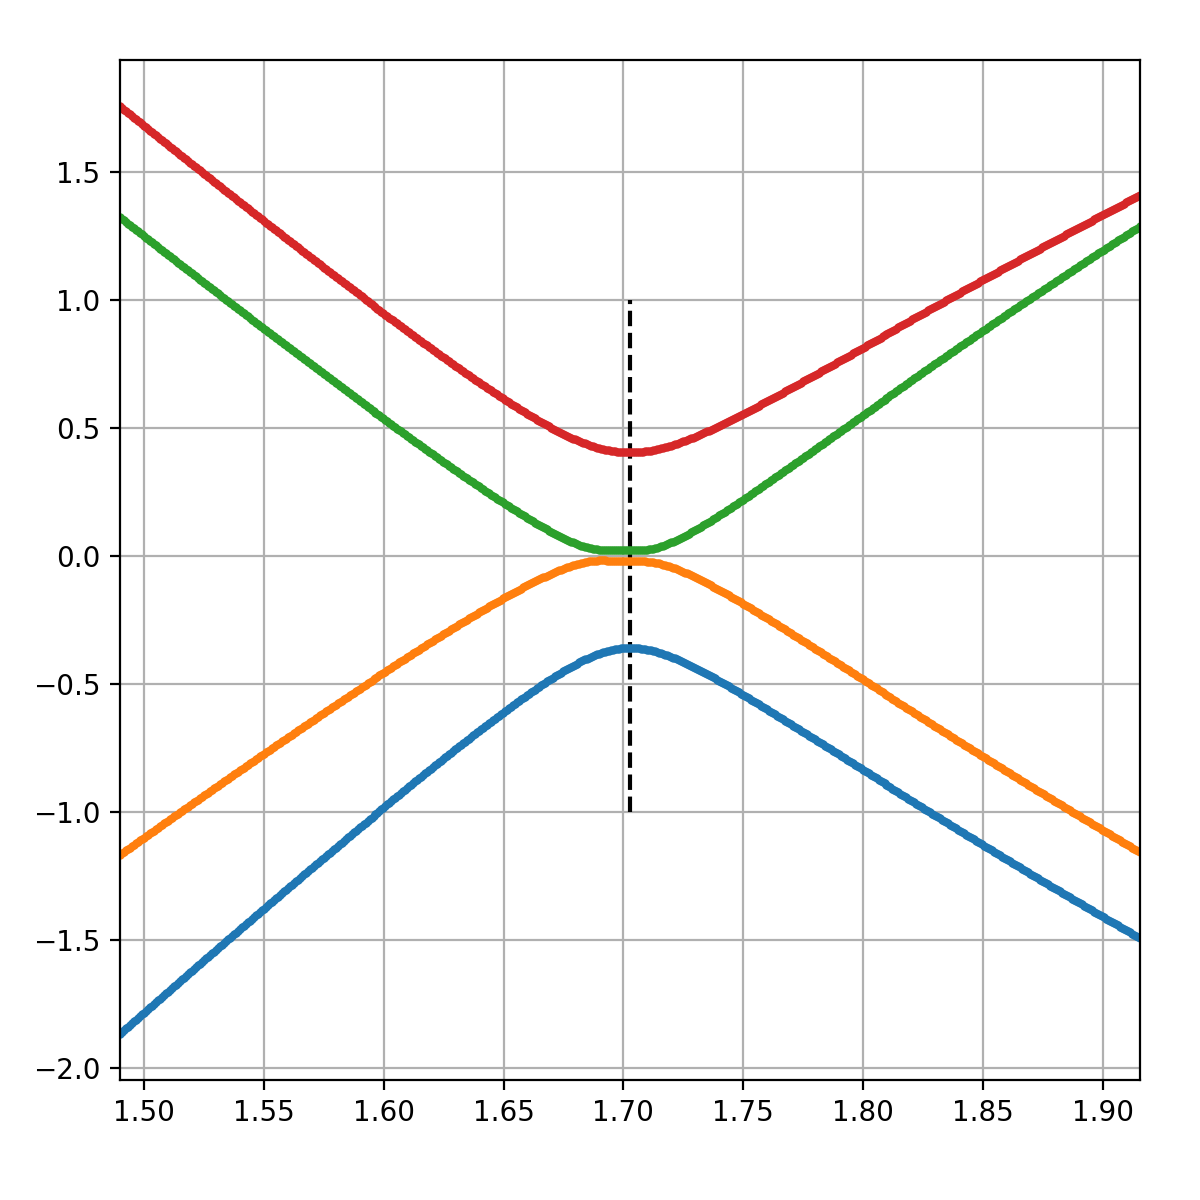

(1.4899152151171104, 1.9156052765791423)

In [136]:
def genHg(k, ag):
    """
    generate Hamiltonian matrix of AB-stacking bilayer graphene with spin
    
    Parameter
    ---------
    k : float 1d array(l = 2)
        input k vector
        
    Return
    ------
    H : complex 8 by 8 array
        column/row arrangement:
            |A1, up>, |B1, up>, |A1, down>, |B1, down>
            |A2, up>, |B2, up>, |A2, down>, |B2, down>
    """
    
    # K = np.array([0., 4. * np.pi / 3.])
    # k = k - K
    
    aa = ag / np.sqrt(3.)
    f = np.exp(-1.j * k[1] * aa) * (1 + 2. * np.exp(1.5j * k[1] * aa) * np.cos(np.sqrt(3) * .5 * k[0] * aa))
    f = np.conj(f)
    H = np.zeros((8, 8), dtype=complex)
    gamma0 = 3.16 # eV
    gamma1 = 0.381 # eV
    gamma3 = 0.38 # eV
    gamma4 = 0.14 # eV
    
    U = 0.042 # eV
    DeltaPrime = 0.022 # eV
    delta_AB = 0# eV
    
    H[0, 1] = H[2, 3] = H[4, 5] = H[6, 7] = -gamma0 * f

    H[1, 4] = H[3, 6] = gamma1
    H[0, 4] = H[2, 6] = H[1, 5] = H[3, 7] = gamma4 * f
    H[0, 5] = H[2, 7] = gamma3 * np.conj(f)
    
#     H[0, 5] = H[2, 7] = gamma1
#     H[1, 5] = H[3, 7] = H[0, 4] = H[2, 6] = gamma4 * np.conj(f)
#     H[1, 4] = H[3, 6] = -gamma3 * f
    
    H = H + H.conj().T
    
    H[0, 0] = H[2, 2] = .5 * (-U + delta_AB)
    H[1, 1] = H[3, 3] = .5 * (-U + 2. * DeltaPrime - delta_AB)
    H[4, 4] = H[6, 6] = .5 * (U + 2. * DeltaPrime + delta_AB)
    H[5, 5] = H[7, 7] = .5 * (U - delta_AB)
    
    return H

kxList = np.linspace(7 * np.pi / 6 / ag, 9 * np.pi / 6 / ag , 512)
data = np.zeros((4, len(kxList)))
for i, kx in enumerate(kxList): 
    H = genHg(np.array([kx, 0]), ag)
    e, v = LA.eigh(H)
    data[0, i] = e[0]
    data[1, i] = e[2]
    data[2, i] = e[4]
    data[3, i] = e[6]
    
plt.close('all')
fig = plt.figure(figsize=[6, 6], dpi = 100)
ax = fig.add_axes([0.1, 0.1, 0.85, 0.85])
ax.plot(
            [4 * np.pi / 3 / ag, 4 * np.pi / 3 / ag],
            [-1, 1],
            '--',
            c='k'
        )
ax.grid()
for i in range(4):
    ax.plot(kxList, data[i, :], '-o', markersize=2, linewidth=1.2)
ax.set_xlim(kxList[0], kxList[-1])

## ABA

In [ ]:
def genHg(k, ag):
    """
    generate Hamiltonian matrix of AB-stacking bilayer graphene with spin
    
    Parameter
    ---------
    k : float 1d array(l = 2)
        input k vector
        
    Return
    ------
    H : complex 12 by 12 array
        column/row arrangement:
            |A1, up>, |B1, up>, |A1, down>, |B1, down>
            |A2, up>, |B2, up>, |A2, down>, |B2, down>
            |A3, up>, |B3, up>, |A3, down>, |B3, down>
    """
    
    # K = np.array([0., 4. * np.pi / 3.])
    # k = k - K
    
    aa = ag / np.sqrt(3.)
    f = np.exp(-1.j * k[1] * aa) * (1 + 2. * np.exp(1.5j * k[1] * aa) * np.cos(np.sqrt(3) * .5 * k[0] * aa))
    f = np.conj(f)
    H = np.zeros((12, 12), dtype=complex)
    gamma0 = 3.16 # eV
    gamma1 = 0.381 # eV
    gamma3 = 0.38 # eV
    gamma4 = 0.14 # eV
    
    U = 0.05 # eV
    DeltaPrime = 0.022 # eV
    delta_AB = 0# eV
    
    H[0, 1] = H[2, 3] = H[4, 5] = H[6, 7] = H[8, 9] = H[10, 11] = -gamma0 * f

    H[1, 4] = H[3, 6] = H[9, 4] = H[11, 6] = gamma1
    H[0, 4] = H[2, 6] = H[1, 5] = H[3, 7] = H[8, 4] = H[10, 6] = H[9, 5] = H[11, 7] = gamma4 * f
    H[0, 5] = H[2, 7] = H[3, 6] = H[3, 6] = gamma3 * np.conj(f)
    
#     H[0, 5] = H[2, 7] = gamma1
#     H[1, 5] = H[3, 7] = H[0, 4] = H[2, 6] = gamma4 * np.conj(f)
#     H[1, 4] = H[3, 6] = -gamma3 * f
    
    H = H + H.conj().T
    
    H[0, 0] = H[2, 2] = .5 * (-U + delta_AB)
    H[1, 1] = H[3, 3] = .5 * (-U + 2. * DeltaPrime - delta_AB)
    H[4, 4] = H[6, 6] = .5 * (U + 2. * DeltaPrime + delta_AB)
    H[5, 5] = H[7, 7] = .5 * (U - delta_AB)
    
    return H

kxList = np.linspace(7 * np.pi / 6 / ag, 9 * np.pi / 6 / ag , 512)
data = np.zeros((4, len(kxList)))
for i, kx in enumerate(kxList): 
    H = genHg(np.array([kx, 0]), ag)
    e, v = LA.eigh(H)
    data[0, i] = e[0]
    data[1, i] = e[2]
    data[2, i] = e[4]
    data[3, i] = e[6]
    
plt.close('all')
fig = plt.figure(figsize=[6, 6], dpi = 100)
ax = fig.add_axes([0.1, 0.1, 0.85, 0.85])
ax.plot(
            [4 * np.pi / 3 / ag, 4 * np.pi / 3 / ag],
            [-1, 1],
            '--',
            c='k'
        )
ax.grid()
for i in range(4):
    ax.plot(kxList, data[i, :], '-o', markersize=2, linewidth=1.2)
ax.set_xlim(kxList[0], kxList[-1])

In [105]:
def genHg(k, ag):
    """
    generate Hamiltonian matrix of AB-stacking bilayer graphene with spin
    
    Parameter
    ---------
    k : float 1d array(l = 2)
        input k vector
        
    Return
    ------
    H : complex 8 by 8 array
        column/row arrangement:
            |A1, up>, |B1, up>, |A1, down>, |B1, down>
            |A2, up>, |B2, up>, |A2, down>, |B2, down>
    """
    
    # K = np.array([0., 4. * np.pi / 3.])
    # k = k - K
    
    aa = ag / np.sqrt(3.)
    f = np.exp(-1.j * k[1] * aa) * (1 + 2. * np.exp(1.5j * k[1] * aa) * np.cos(np.sqrt(3) * .5 * k[0] * aa))
    f = np.conj(f)
    H = np.zeros((8, 8), dtype=complex)
    gamma0 = 3.16 # eV
    gamma1 = 0.3 # eV
    gamma3 = 0.38 # eV
    
    U = 0.05 # eV
    DeltaPrime = 0.022 # eV
    delta_AB = 0# eV
    
    H[0, 1] = H[2, 3] = H[4, 5] = H[6, 7] = -gamma0 * f

    H[1, 4] = H[3, 6] = gamma1
    H[0, 4] = H[2, 6] = H[1, 5] = H[3, 7] = gamma1
    H[0, 5] = H[2, 7] = gamma3 * np.conj(f)
    
    H[0, 5] = H[2, 7] = gamma1
    H[1, 5] = H[3, 7] = H[0, 4] = H[2, 6] = gamma4 * np.conj(f)
    H[1, 4] = H[3, 6] = -gamma3 * f
    
    H = H + H.conj().T
    
    H[0, 0] = H[2, 2] = .5 * (-U + delta_AB)
    H[1, 1] = H[3, 3] = .5 * (-U + 2. * DeltaPrime - delta_AB)
    H[4, 4] = H[6, 6] = .5 * (U + 2. * DeltaPrime + delta_AB)
    H[5, 5] = H[7, 7] = .5 * (U - delta_AB)
    
    return H

kxList = np.linspace(7 * np.pi / 6 / ag, 9 * np.pi / 6 / ag , 512)
data = np.zeros((4, len(kxList)))
for i, kx in enumerate(kxList): 
    H = genHg(np.array([kx, 0]), ag)
    e, v = LA.eigh(H)
    data[0, i] = e[0]
    data[1, i] = e[2]
    data[2, i] = e[4]
    data[3, i] = e[6]
    
plt.close('all')
fig = plt.figure(figsize=[6, 6], dpi = 100)
ax = fig.add_axes([0.1, 0.1, 0.85, 0.85])
ax.plot(
            [4 * np.pi / 3 / ag, 4 * np.pi / 3 / ag],
            [-1, 1],
            '--',
            c='k'
        )
ax.grid()
for i in range(4):
    ax.plot(kxList, data[i, :], '-o', markersize=2, linewidth=1.2)
ax.set_xlim(kxList[0], kxList[-1])

NameError: name 'gamma3' is not defined

In [54]:
a1g = ag * np.array([1., 0.], dtype=float)
a2g = ag * np.array([-0.5, np.sqrt(3.) * 0.5], dtype=float)
b1g = 2. * np.pi / ag * np.array([1., 1. / np.sqrt(3.)], dtype=float)
b2g = 4. * np.pi / np.sqrt(3.) / ag * np.array([0., 1.], dtype=float)
# K_+
Kpg = (2. * b1g - b2g) / 3.

tmp = genHg(Kpg, ag)
tmp1 = np.zeros(tmp.shape)
for i in range(tmp.shape[0]):
    for j in range(tmp.shape[1]):
        if np.abs(tmp[i, j]) > 1e-6:
            tmp1[i,j] = np.real(tmp[i,j])
            
print(tmp1)

[[-0.03   0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.008  0.     0.     0.381  0.     0.     0.   ]
 [ 0.     0.    -0.03   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.    -0.008  0.     0.     0.381  0.   ]
 [ 0.     0.381  0.     0.     0.052  0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.03   0.     0.   ]
 [ 0.     0.     0.     0.381  0.     0.     0.052  0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.03 ]]


In [147]:
a1g = ag * np.array([1., 0.], dtype=float)
a2g = ag * np.array([-0.5, np.sqrt(3.) * 0.5], dtype=float)
b1g = 2. * np.pi / ag * np.array([1., 1. / np.sqrt(3.)], dtype=float)
b2g = 4. * np.pi / np.sqrt(3.) / ag * np.array([0., 1.], dtype=float)
Kpg = (2. * b1g - b2g) / 3.
H0 = genHg(Kpg, ag)
H1 = np.array(
[[ 0j,  0j,
   0j, -1.73619858e-03-3.00718414e-03j],
 [ 0j,  0j,
   0j,  0j],
 [ 0j,  0j,
   0j,  0j],
 [-1.73619858e-03+3.00718414e-03j,  0j,
   0j,  0j]])

e, v = LA.eigh(H0)
# print(e, v)

H0[4:, 4:] += H1
e, v = LA.eigh(H0)
for i in range(8):
    for j in range(8):
        if np.abs(v[i, j]) < 1e-6:
            v[i, j] = 0
print(e)
plt.matshow(np.abs(v))

[-0.35959327 -0.3595783  -0.021      -0.021       0.02099834  0.021
  0.4035783   0.40359493]


<IPython.core.display.Javascript object>

In [ ]:
|B1, u> + |A2, u>
|B1, d> + |A2, d>


In [124]:
e, v = LA.eigh(H0[:4, 4:])
print(e)
LA.norm(H1, 2)

[-0.381 -0.381  0.381  0.381]


0.00173619858

In [122]:
tmp = np.zeros((8, 8), dtype=complex)
tmp[4:, 4:] = H1
LA.norm(tmp, 2)

0.00173619858

In [40]:
def genHg2(k, ag, U):
    """
    generate Hamiltonian matrix of AB-stacking bilayer graphene with spin
    
    Parameter
    ---------
    k : float 1d array(l = 2)
        input k vector
        
    Return
    ------
    H : complex 8 by 8 array
        column/row arrangement:
            |A1, up>, |B1, up>, |A1, down>, |B1, down>
            |A2, up>, |B2, up>, |A2, down>, |B2, down>
    """
    
    # K = np.array([0., 4. * np.pi / 3.])
    # k = k - K
    
    aa = ag / np.sqrt(3.)
    f = np.exp(-1.j * k[1] * aa) * (1 + 2. * np.exp(1.5j * k[1] * aa) * np.cos(np.sqrt(3) * .5 * k[0] * aa))
    f = np.conj(f)
    H = np.zeros((8, 8), dtype=complex)
    gamma0 = 3.16 # eV
    gamma1 = 0.381 # eV
    gamma3 = 0.38 # eV
    gamma4 = 0.14 # eV
    
    DeltaPrime = 0.022 # eV
    delta_AB = 0# eV
    
    H[0, 1] = H[2, 3] = H[4, 5] = H[6, 7] = -gamma0 * f

    H[1, 4] = H[3, 6] = gamma1
    H[0, 4] = H[2, 6] = H[1, 5] = H[3, 7] = gamma4 * f
    H[0, 5] = H[2, 7] = gamma3 * np.conj(f)
    
#     H[0, 5] = H[2, 7] = gamma1
#     H[1, 5] = H[3, 7] = H[0, 4] = H[2, 6] = gamma4 * np.conj(f)
#     H[1, 4] = H[3, 6] = -gamma3 * f
    
    H = H + H.conj().T
    
    H[0, 0] = H[2, 2] = .5 * (-U + delta_AB)
    H[1, 1] = H[3, 3] = .5 * (-U + 2. * DeltaPrime - delta_AB)
    H[4, 4] = H[6, 6] = .5 * (U + 2. * DeltaPrime + delta_AB)
    H[5, 5] = H[7, 7] = .5 * (U - delta_AB)
    
    return H

x = np.linspace(0, 0.1, 32)
y = np.zeros(len(x))
for i, U in enumerate(x):
    H = genHg2(np.array([4 * np.pi / 3 / ag, 0]), ag, U)
    e, v = LA.eigh(H)
    y[i] = e[4] - e[2]
    
plt.close('all')
fig = plt.figure(figsize=[6, 6], dpi = 100)
ax = fig.add_axes([0.1, 0.1, 0.85, 0.85])
ax.plot(x, y, '-o', markersize=2, linewidth=1.2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


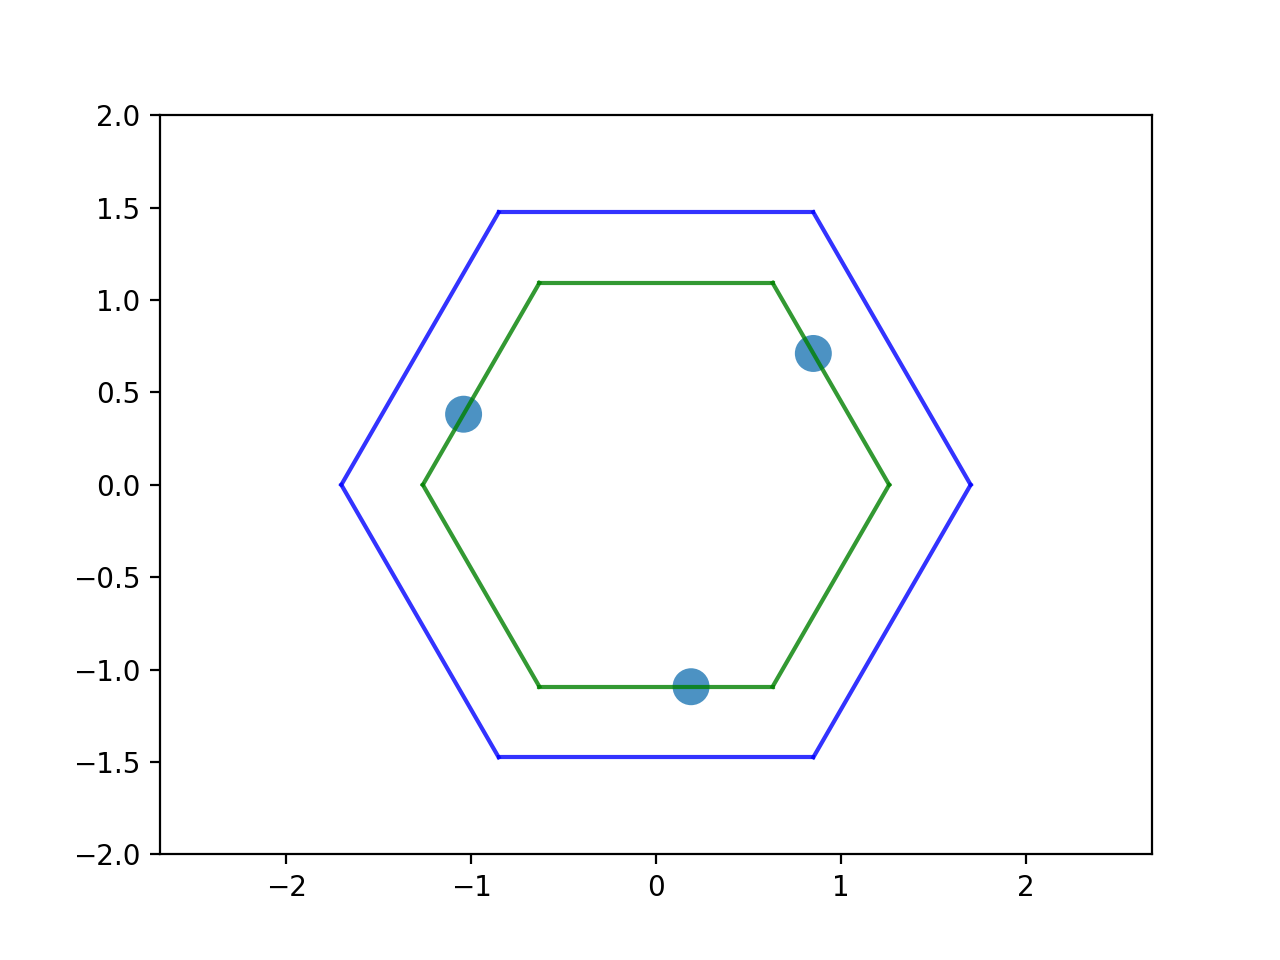

/Users/Meow/anaconda3/envs/idp/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



In [130]:
from matplotlib.lines import Line2D 
import matplotlib.patches as mpatches
from matplotlib.patches import Circle

Heff = EffectiveHamiltonian([at, ag], 60 / 180. * np.pi, 2.4)
Heff.plot_km(R(180 / 180. * np.pi) @ Heff.Kp + np.array([0, 0]))
# plt.xlim(-2, 2)
plt.savefig('60.eps', transparent=True)

In [99]:
Heff.setOnsiteEnergy(0.1)
fn = 'WSe2-0.2-0.2-1.94-2.2'
S = np.sqrt(3.) / 2. * at * at
Sprime = np.sqrt(3.) / 2. * ag * ag
coefficient = 1. / np.sqrt(float(S * Sprime))
directory = './' + fn + '/'
result1 = np.load(directory + 'E_xz.npy')
result2 = np.load(directory + 'E_yz.npy')
result3 = np.load(directory + 'E_zz.npy')
result1m = np.load(directory + 'E_z_xz.npy')
result2m = np.load(directory + 'E_z_yz.npy')
result3m = np.load(directory + 'E_z_xy.npy')
result4m = np.load(directory + 'E_z_x2y2.npy')
result5m = np.load(directory + 'E_z_z2.npy')

##
# Interpolation
kx = ky = np.linspace(-6.0, 6.0, 255, endpoint=True)
halflength = int((kx.shape[0] - 1) / 2)
kxg, kyg = np.meshgrid(kx, ky)

# E_xz
E_xz = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_xz[halflength + i, :halflength] = -result1[i, :0:-1]    # flip of result1[1:]
    E_xz[halflength + i, halflength:] =  result1[i, :]

for i in range(1, halflength + 1):
    E_xz[halflength - i, :] = E_xz[halflength + i, :]
E_xz_interp = interpolate.interp2d(kx, ky, coefficient * E_xz, kind='cubic')

# E_yz
E_yz = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_yz[halflength + i, :halflength] = result2[i, :0:-1]    # flip of result2[1:]
    E_yz[halflength + i, halflength:] = result2[i, :]

for i in range(1, halflength + 1):
    E_yz[halflength - i, :] = -E_yz[halflength + i, :]
E_yz_interp = interpolate.interp2d(kx, ky, coefficient * E_yz, kind='cubic')

# E_zz
E_zz = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_zz[halflength + i, :halflength] = result3[i, :0:-1]    # flip of result2[1:]
    E_zz[halflength + i, halflength:] = result3[i, :]

for i in range(1, halflength + 1):
    E_zz[halflength - i, :] = E_zz[halflength + i, :]
E_zz_interp = interpolate.interp2d(kx, ky, coefficient * E_zz, kind='cubic')

# E_z_xz
E_z_xz = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_z_xz[halflength + i, :halflength] = -result1m[i, :0:-1]    # flip of result2[1:]
    E_z_xz[halflength + i, halflength:] = result1m[i, :]

for i in range(1, halflength + 1):
    E_z_xz[halflength - i, :] = E_z_xz[halflength + i, :]
E_z_xz_interp = interpolate.interp2d(kx, ky, coefficient * E_z_xz, kind='cubic')

# E_z_yz
E_z_yz = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_z_yz[halflength + i, :halflength] = result2m[i, :0:-1]    # flip of result2[1:]
    E_z_yz[halflength + i, halflength:] = result2m[i, :]

for i in range(1, halflength + 1):
    E_z_yz[halflength - i, :] = -E_z_yz[halflength + i, :]
E_z_yz_interp = interpolate.interp2d(kx, ky, coefficient * E_z_yz, kind='cubic')

# E_z_xy
E_z_xy = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_z_xy[halflength + i, :halflength] = -result3m[i, :0:-1]    # flip of result2[1:]
    E_z_xy[halflength + i, halflength:] = result3m[i, :]

for i in range(1, halflength + 1):
    E_z_xy[halflength - i, :] = -E_z_xy[halflength + i, :]
E_z_xy_interp = interpolate.interp2d(kx, ky, coefficient * E_z_xy, kind='cubic')

# E_z_x2y2
E_z_x2y2 = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_z_x2y2[halflength + i, :halflength] = result4m[i, :0:-1]    # flip of result2[1:]
    E_z_x2y2[halflength + i, halflength:] = result4m[i, :]

for i in range(1, halflength + 1):
    E_z_x2y2[halflength - i, :] = E_z_x2y2[halflength + i, :]
E_z_x2y2_interp = interpolate.interp2d(kx, ky, coefficient * E_z_x2y2, kind='cubic')

# E_z_z2
E_z_z2 = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_z_z2[halflength + i, :halflength] = result5m[i, :0:-1]    # flip of result2[1:]
    E_z_z2[halflength + i, halflength:] = result5m[i, :]

for i in range(1, halflength + 1):
    E_z_z2[halflength - i, :] = E_z_z2[halflength + i, :]
E_z_z2_interp = interpolate.interp2d(kx, ky, coefficient * E_z_z2, kind='cubic')

Heff.setInterpolation(
    [E_xz_interp,
     E_yz_interp,
     E_zz_interp,
     E_z_xz_interp,
     E_z_yz_interp,
     E_z_xy_interp,
     E_z_x2y2_interp,
     E_z_z2_interp]
)

def stripZero(m):
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            if np.abs(m[i, j]) < 1e-7:
                m[i, j] = 0
    return m
print(stripZero(Heff.getVeff(-Heff.Kp - np.array([0.1, 0]))))
print(stripZero(Heff.getVeff( Heff.Kp + np.array([0.1, 0]))))

[[ 0.04499455-5.01443505e-19j -0.01136461-1.56767535e-03j
   0.0001921 -2.67962419e-04j -0.00039803-7.71894929e-04j]
 [-0.01136461+1.56767535e-03j  0.04499455+7.18283939e-19j
   0.00084085+2.71970627e-03j  0.0001921 -2.67962419e-04j]
 [ 0.0001921 +2.67962419e-04j  0.00084085-2.71970627e-03j
   0.04378967-3.30681663e-18j -0.01165513-1.96871326e-03j]
 [-0.00039803+7.71894929e-04j  0.0001921 +2.67962419e-04j
  -0.01165513+1.96871326e-03j  0.04378967+3.25260652e-19j]]
[[ 0.04378967-3.25260652e-19j -0.01165513+1.96871326e-03j
  -0.0001921 +2.67962419e-04j -0.00084085-2.71970627e-03j]
 [-0.01165513-1.96871326e-03j  0.04378967+3.79470760e-19j
   0.00039803+7.71894929e-04j -0.0001921 +2.67962419e-04j]
 [-0.0001921 -2.67962419e-04j  0.00039803-7.71894929e-04j
   0.04499455-2.03287907e-19j -0.01136461+1.56767535e-03j]
 [-0.00084085+2.71970627e-03j -0.0001921 -2.67962419e-04j
  -0.01136461-1.56767535e-03j  0.04499455-3.11708125e-19j]]


In [133]:
import sympy
from IPython.display import display

def beautify(m, threashold = 1e-8):
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            if abs(np.real(m[i, j])) < threashold:
                m[i, j] = np.imag(m[i, j]) * 1.j
            if abs(np.imag(m[i, j])) < threashold:
                m[i, j] = np.real(m[i, j])
    return m

directory = './MoS2-0.2-0.2-1.82-2.06/'
result1 = np.load(directory + 'E_xz.npy')
result2 = np.load(directory + 'E_yz.npy')
result3 = np.load(directory + 'E_zz.npy')
result1m = np.load(directory + 'E_z_xz.npy')
result2m = np.load(directory + 'E_z_yz.npy')
result3m = np.load(directory + 'E_z_xy.npy')
result4m = np.load(directory + 'E_z_x2y2.npy')
result5m = np.load(directory + 'E_z_z2.npy')

S = np.sqrt(3.) / 2. * at * at
Sprime = np.sqrt(3.) / 2. * ag * ag
coefficient = 1. / np.sqrt(float(S * Sprime))

##
# Interpolation
kx = ky = np.linspace(-6.0, 6.0, 255, endpoint=True)
halflength = int((kx.shape[0] - 1) / 2)
kxg, kyg = np.meshgrid(kx, ky)

# E_xz
E_xz = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_xz[halflength + i, :halflength] = -result1[i, :0:-1]    # flip of result1[1:]
    E_xz[halflength + i, halflength:] =  result1[i, :]

for i in range(1, halflength + 1):
    E_xz[halflength - i, :] = E_xz[halflength + i, :]
E_xz_interp = interpolate.interp2d(kx, ky, coefficient * E_xz, kind='cubic')

# E_yz
E_yz = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_yz[halflength + i, :halflength] = result2[i, :0:-1]    # flip of result2[1:]
    E_yz[halflength + i, halflength:] = result2[i, :]

for i in range(1, halflength + 1):
    E_yz[halflength - i, :] = -E_yz[halflength + i, :]
E_yz_interp = interpolate.interp2d(kx, ky, coefficient * E_yz, kind='cubic')

# E_zz
E_zz = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_zz[halflength + i, :halflength] = result3[i, :0:-1]    # flip of result2[1:]
    E_zz[halflength + i, halflength:] = result3[i, :]

for i in range(1, halflength + 1):
    E_zz[halflength - i, :] = E_zz[halflength + i, :]
E_zz_interp = interpolate.interp2d(kx, ky, coefficient * E_zz, kind='cubic')

# E_z_xz
E_z_xz = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_z_xz[halflength + i, :halflength] = -result1m[i, :0:-1]    # flip of result2[1:]
    E_z_xz[halflength + i, halflength:] = result1m[i, :]

for i in range(1, halflength + 1):
    E_z_xz[halflength - i, :] = E_z_xz[halflength + i, :]
E_z_xz_interp = interpolate.interp2d(kx, ky, coefficient * E_z_xz, kind='cubic')

# E_z_yz
E_z_yz = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_z_yz[halflength + i, :halflength] = result2m[i, :0:-1]    # flip of result2[1:]
    E_z_yz[halflength + i, halflength:] = result2m[i, :]

for i in range(1, halflength + 1):
    E_z_yz[halflength - i, :] = -E_z_yz[halflength + i, :]
E_z_yz_interp = interpolate.interp2d(kx, ky, coefficient * E_z_yz, kind='cubic')

# E_z_xy
E_z_xy = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_z_xy[halflength + i, :halflength] = -result3m[i, :0:-1]    # flip of result2[1:]
    E_z_xy[halflength + i, halflength:] = result3m[i, :]

for i in range(1, halflength + 1):
    E_z_xy[halflength - i, :] = -E_z_xy[halflength + i, :]
E_z_xy_interp = interpolate.interp2d(kx, ky, coefficient * E_z_xy, kind='cubic')

# E_z_x2y2
E_z_x2y2 = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_z_x2y2[halflength + i, :halflength] = result4m[i, :0:-1]    # flip of result2[1:]
    E_z_x2y2[halflength + i, halflength:] = result4m[i, :]

for i in range(1, halflength + 1):
    E_z_x2y2[halflength - i, :] = E_z_x2y2[halflength + i, :]
E_z_x2y2_interp = interpolate.interp2d(kx, ky, coefficient * E_z_x2y2, kind='cubic')

# E_z_z2
E_z_z2 = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_z_z2[halflength + i, :halflength] = result5m[i, :0:-1]    # flip of result2[1:]
    E_z_z2[halflength + i, halflength:] = result5m[i, :]

for i in range(1, halflength + 1):
    E_z_z2[halflength - i, :] = E_z_z2[halflength + i, :]
E_z_z2_interp = interpolate.interp2d(kx, ky, coefficient * E_z_z2, kind='cubic')

Heff = EffectiveHamiltonian([3.18, 2.46], 0.01 / 180. * np.pi, 3.)
Heff.setOnsiteEnergy(1.75)
Heff.setSign(1. * np.array([-1, -1, 1, 1, 1]))
Heff.setpSign(np.array([-1, 1, 1, -1, 1, 1]))
Heff.setInterpolation([E_xz_interp,
                       E_yz_interp,
                       E_zz_interp,
                       E_z_xz_interp,
                       E_z_yz_interp,
                       E_z_xy_interp,
                       E_z_x2y2_interp,
                       E_z_z2_interp])
Heff.findPossibleKm(Heff.Kp)
U = Heff.getU(Heff.Kp)

w, v = LA.eigh(Heff.getHm(Heff.Kp))
Heff.updateVeff()
print(Heff.Veff)
print('---------------------------')
last = np.array([0., 0.])
for i in range(int(len(w) / 3)):
    tmp2 = U @ v[:, 3 * i : 3 * (i + 1)]
    tmp2 = tmp2 @ tmp2.conj().T / (1.75 - w[3 * i])
    display(N(Matrix(beautify(tmp2)), 6))
    this = np.array([(tmp2[0, 0] - tmp2[3, 3]) / 2., (tmp2[3, 0] - tmp2[0, 3]) / 2.])
    print(i, w[3 * i], abs(last + this))
    last = this

[[ 1.77574431e-02-2.90955817e-19j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -8.18456749e-07+1.97845290e-04j]
 [ 0.00000000e+00+0.00000000e+00j  1.77574431e-02-4.70103286e-20j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   1.83685518e-02+9.22021833e-19j  0.00000000e+00+0.00000000e+00j]
 [-8.18456749e-07-1.97845290e-04j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  1.83685518e-02+4.88340964e-19j]]
---------------------------


⎡  4.6479e-8        0           0       2.64766e-6⋅ⅈ⎤
⎢                                                   ⎥
⎢      0        4.6479e-8       0            0      ⎥
⎢                                                   ⎥
⎢      0            0      0.000150823       0      ⎥
⎢                                                   ⎥
⎣-2.64766e-6⋅ⅈ      0           0       0.000150823 ⎦

0 -5.609229862627546 [7.53882325e-05 2.64765947e-06]


⎡0.000173394        0           0       1.5364e-6⋅ⅈ⎤
⎢                                                  ⎥
⎢     0        0.000173394      0            0     ⎥
⎢                                                  ⎥
⎢     0             0       1.36141e-8       0     ⎥
⎢                                                  ⎥
⎣-1.5364e-6⋅ⅈ       0           0       1.36141e-8 ⎦

1 -5.603156233444846 [1.13019736e-05 4.18406411e-06]


⎡       5.63006e-7              0            0       1.89626e-8 + 2.31117e-5⋅ⅈ
⎢                                                                             
⎢            0              5.63006e-7       0                   0            
⎢                                                                             
⎢            0                  0       0.000948749              0            
⎢                                                                             
⎣1.89626e-8 - 2.31117e-5⋅ⅈ      0            0              0.000948749       

⎤
⎥
⎥
⎥
⎥
⎥
⎦

2 -5.167425065925825 [3.87402884e-04 2.46481061e-05]


⎡0.000929868        0           0       -1.93003e-5⋅ⅈ⎤
⎢                                                    ⎥
⎢     0        0.000929868      0             0      ⎥
⎢                                                    ⎥
⎢     0             0       4.00598e-7        0      ⎥
⎢                                                    ⎥
⎣1.93003e-5⋅ⅈ       0           0        4.00598e-7  ⎦

3 -5.164265894343766 [9.35952179e-06 3.81136543e-06]


⎡       0.000966697              0           0       1.15031e-8 - 3.13535e-5⋅ⅈ
⎢                                                                             
⎢            0              0.000966697      0                   0            
⎢                                                                             
⎢            0                   0       1.01691e-6              0            
⎢                                                                             
⎣1.15031e-8 + 3.13535e-5⋅ⅈ       0           0              1.01691e-6        

⎤
⎥
⎥
⎥
⎥
⎥
⎦

4 -4.0005252859665585 [9.47573780e-04 5.06538634e-05]


⎡ 1.89421e-6        0            0       4.33979e-5⋅ⅈ⎤
⎢                                                    ⎥
⎢      0        1.89421e-6       0            0      ⎥
⎢                                                    ⎥
⎢      0            0       0.000994281       0      ⎥
⎢                                                    ⎥
⎣-4.33979e-5⋅ⅈ      0            0       0.000994281 ⎦

5 -3.9792978483886707 [1.33533694e-05 1.20443741e-05]


⎡       0.00176208              0           0       3.21446e-8 + 7.08841e-5⋅ⅈ⎤
⎢                                                                            ⎥
⎢            0              0.00176208      0                   0            ⎥
⎢                                                                            ⎥
⎢            0                  0       2.85148e-6              0            ⎥
⎢                                                                            ⎥
⎣3.21446e-8 - 7.08841e-5⋅ⅈ      0           0              2.85148e-6        ⎦

6 -3.0657921892294664 [0.00038342 0.00011428]


⎡        2.2545e-6              0          0       2.14769e-8 + 5.93668e-5⋅ⅈ⎤
⎢                                                                           ⎥
⎢            0              2.2545e-6      0                   0            ⎥
⎢                                                                           ⎥
⎢            0                  0      0.00156328              0            ⎥
⎢                                                                           ⎥
⎣2.14769e-8 - 5.93668e-5⋅ⅈ      0          0              0.00156328        ⎦

7 -3.042862294257328 [9.91029240e-05 1.30250889e-04]


⎡        0.0055933              0          0       3.92199e-7 + 0.00524162⋅ⅈ⎤
⎢                                                                           ⎥
⎢            0              0.0055933      0                   0            ⎥
⎢                                                                           ⎥
⎢            0                  0      0.00491205              0            ⎥
⎢                                                                           ⎥
⎣3.92199e-7 - 0.00524162⋅ⅈ      0          0              0.00491205        ⎦

8 -1.9051030969030112 [0.00043989 0.00530098]


⎡       0.00120549              0           0      2.57153e-6 + 0.00313003⋅ⅈ⎤
⎢                                                                           ⎥
⎢            0              0.00120549      0                  0            ⎥
⎢                                                                           ⎥
⎢            0                  0       0.0081271              0            ⎥
⎢                                                                           ⎥
⎣2.57153e-6 - 0.00313003⋅ⅈ      0           0              0.0081271        ⎦

9 -1.8821058284305177 [0.00312018 0.00837165]


⎡        0.0138651               0           0       -2.71822e-6 - 0.00318089⋅
⎢                                                                             
⎢            0               0.0138651       0                   0            
⎢                                                                             
⎢            0                   0      0.000729752              0            
⎢                                                                             
⎣-2.71822e-6 + 0.00318089⋅ⅈ      0           0              0.000729752       

ⅈ⎤
 ⎥
 ⎥
 ⎥
 ⎥
 ⎥
 ⎦

10 -1.8487719678813224 [3.10685252e-03 5.08598859e-05]


⎡        0.00295092              0           0      -4.77587e-7 - 0.00546596⋅ⅈ
⎢                                                                             
⎢            0               0.00295092      0                  0             
⎢                                                                             
⎢            0                   0       0.0101246              0             
⎢                                                                             
⎣-4.77587e-7 + 0.00546596⋅ⅈ      0           0              0.0101246         

⎤
⎥
⎥
⎥
⎥
⎥
⎦

11 -1.8423559732401347 [0.00298084 0.00864685]


⎡        2.42604e-7              0            0       -4.12831e-8 - 6.95904e-6
⎢                                                                             
⎢            0               2.42604e-7       0                   0           
⎢                                                                             
⎢            0                   0       0.000199625              0           
⎢                                                                             
⎣-4.12831e-8 + 6.95904e-6⋅ⅈ      0            0              0.000199625      

⋅ⅈ⎤
  ⎥
  ⎥
  ⎥
  ⎥
  ⎥
  ⎦

12 -0.39674244236027495 [0.00368652 0.00547292]


⎡       0.000226202              0           0       3.67326e-8 + 1.79981e-5⋅ⅈ
⎢                                                                             
⎢            0              0.000226202      0                   0            
⎢                                                                             
⎢            0                   0       1.43205e-6              0            
⎢                                                                             
⎣3.67326e-8 - 1.79981e-5⋅ⅈ       0           0              1.43205e-6        

⎤
⎥
⎥
⎥
⎥
⎥
⎦

13 -0.3098617935346432 [1.26934336e-05 1.10390361e-05]


⎡       -0.000119285              0             0        -3.8114e-7 + 0.000115
⎢                                                                             
⎢            0               -0.000119285       0                    0        
⎢                                                                             
⎢            0                    0        -0.000110931              0        
⎢                                                                             
⎣-3.8114e-7 - 0.000115031⋅ⅈ       0             0               -0.000110931  

031⋅ⅈ⎤
     ⎥
     ⎥
     ⎥
     ⎥
     ⎥
     ⎦

14 2.093007727618172 [0.00010821 0.00013303]


⎡       -0.000207327              0             0       -6.85233e-8 + 1.49635e
⎢                                                                             
⎢            0               -0.000207327       0                   0         
⎢                                                                             
⎢            0                    0        -1.08223e-8              0         
⎢                                                                             
⎣-6.85233e-8 - 1.49635e-6⋅ⅈ       0             0              -1.08223e-8    

-6⋅ⅈ⎤
    ⎥
    ⎥
    ⎥
    ⎥
    ⎥
    ⎦

15 2.124011548055473 [0.00010784 0.00011653]


⎡        -0.00197977               0            0       -2.60843e-7 + 0.000329
⎢                                                                             
⎢             0               -0.00197977       0                    0        
⎢                                                                             
⎢             0                    0       -5.49161e-5               0        
⎢                                                                             
⎣-2.60843e-7 - 0.000329729⋅ⅈ       0            0               -5.49161e-5   

729⋅ⅈ⎤
     ⎥
     ⎥
     ⎥
     ⎥
     ⎥
     ⎦

16 2.62750134565788 [0.00106609 0.00033123]


⎡        -1.27551e-5               0            0       -6.11033e-8 - 0.000151
⎢                                                                             
⎢             0               -1.27551e-5       0                    0        
⎢                                                                             
⎢             0                    0       -0.00180123               0        
⎢                                                                             
⎣-6.11033e-8 + 0.000151575⋅ⅈ       0            0               -0.00180123   

575⋅ⅈ⎤
     ⎥
     ⎥
     ⎥
     ⎥
     ⎥
     ⎦

17 2.7439012056845935 [6.81910185e-05 1.78154378e-04]


⎡      -0.00429221              0            0       5.89251e-8 + 3.2467e-5⋅ⅈ⎤
⎢                                                                            ⎥
⎢           0              -0.00429221       0                  0            ⎥
⎢                                                                            ⎥
⎢           0                   0       -2.45587e-7             0            ⎥
⎢                                                                            ⎥
⎣5.89251e-8 - 3.2467e-5⋅ⅈ       0            0             -2.45587e-7       ⎦

18 3.856537518829445 [0.00125174 0.00011911]


⎡       -1.65461e-7              0            0       3.29438e-8 - 2.41334e-5⋅
⎢                                                                             
⎢            0              -1.65461e-7       0                   0           
⎢                                                                             
⎢            0                   0       -0.00352002              0           
⎢                                                                             
⎣3.29438e-8 + 2.41334e-5⋅ⅈ       0            0              -0.00352002      

ⅈ⎤
 ⎥
 ⎥
 ⎥
 ⎥
 ⎥
 ⎦

19 3.873819258425568 [3.86054605e-04 8.33356058e-06]


⎡           0             0     0     2.428e-8 - 1.95786e-6⋅ⅈ⎤
⎢                                                            ⎥
⎢           0             0     0                0           ⎥
⎢                                                            ⎥
⎢           0             0  -0.0039             0           ⎥
⎢                                                            ⎥
⎣2.428e-8 + 1.95786e-6⋅ⅈ  0     0             -0.0039        ⎦

20 4.230962189564066 [3.70992578e-03 2.60913061e-05]


⎡       -0.00330906              0            0       -1.86536e-8 + 1.0661e-5⋅
⎢                                                                             
⎢            0              -0.00330906       0                   0           
⎢                                                                             
⎢            0                   0       -3.43476e-8              0           
⎢                                                                             
⎣-1.86536e-8 - 1.0661e-5⋅ⅈ       0            0              -3.43476e-8      

ⅈ⎤
 ⎥
 ⎥
 ⎥
 ⎥
 ⎥
 ⎦

21 4.270926727222617 [2.95485874e-04 8.70318277e-06]


In [134]:
import sympy
from IPython.display import display

def beautify(m, threashold = 1e-8):
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            if abs(np.real(m[i, j])) < threashold:
                m[i, j] = np.imag(m[i, j]) * 1.j
            if abs(np.imag(m[i, j])) < threashold:
                m[i, j] = np.real(m[i, j])
    return m

directory = './MoS2-0.2-0.2-1.82-2.06/'
result1 = np.load(directory + 'E_xz.npy')
result2 = np.load(directory + 'E_yz.npy')
result3 = np.load(directory + 'E_zz.npy')
result1m = np.load(directory + 'E_z_xz.npy')
result2m = np.load(directory + 'E_z_yz.npy')
result3m = np.load(directory + 'E_z_xy.npy')
result4m = np.load(directory + 'E_z_x2y2.npy')
result5m = np.load(directory + 'E_z_z2.npy')

S = np.sqrt(3.) / 2. * at * at
Sprime = np.sqrt(3.) / 2. * ag * ag
coefficient = 1. / np.sqrt(float(S * Sprime))

##
# Interpolation
kx = ky = np.linspace(-6.0, 6.0, 255, endpoint=True)
halflength = int((kx.shape[0] - 1) / 2)
kxg, kyg = np.meshgrid(kx, ky)

# E_xz
E_xz = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_xz[halflength + i, :halflength] = -result1[i, :0:-1]    # flip of result1[1:]
    E_xz[halflength + i, halflength:] =  result1[i, :]

for i in range(1, halflength + 1):
    E_xz[halflength - i, :] = E_xz[halflength + i, :]
E_xz_interp = interpolate.interp2d(kx, ky, coefficient * E_xz, kind='cubic')

# E_yz
E_yz = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_yz[halflength + i, :halflength] = result2[i, :0:-1]    # flip of result2[1:]
    E_yz[halflength + i, halflength:] = result2[i, :]

for i in range(1, halflength + 1):
    E_yz[halflength - i, :] = -E_yz[halflength + i, :]
E_yz_interp = interpolate.interp2d(kx, ky, coefficient * E_yz, kind='cubic')

# E_zz
E_zz = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_zz[halflength + i, :halflength] = result3[i, :0:-1]    # flip of result2[1:]
    E_zz[halflength + i, halflength:] = result3[i, :]

for i in range(1, halflength + 1):
    E_zz[halflength - i, :] = E_zz[halflength + i, :]
E_zz_interp = interpolate.interp2d(kx, ky, coefficient * E_zz, kind='cubic')

# E_z_xz
E_z_xz = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_z_xz[halflength + i, :halflength] = -result1m[i, :0:-1]    # flip of result2[1:]
    E_z_xz[halflength + i, halflength:] = result1m[i, :]

for i in range(1, halflength + 1):
    E_z_xz[halflength - i, :] = E_z_xz[halflength + i, :]
E_z_xz_interp = interpolate.interp2d(kx, ky, coefficient * E_z_xz, kind='cubic')

# E_z_yz
E_z_yz = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_z_yz[halflength + i, :halflength] = result2m[i, :0:-1]    # flip of result2[1:]
    E_z_yz[halflength + i, halflength:] = result2m[i, :]

for i in range(1, halflength + 1):
    E_z_yz[halflength - i, :] = -E_z_yz[halflength + i, :]
E_z_yz_interp = interpolate.interp2d(kx, ky, coefficient * E_z_yz, kind='cubic')

# E_z_xy
E_z_xy = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_z_xy[halflength + i, :halflength] = -result3m[i, :0:-1]    # flip of result2[1:]
    E_z_xy[halflength + i, halflength:] = result3m[i, :]

for i in range(1, halflength + 1):
    E_z_xy[halflength - i, :] = -E_z_xy[halflength + i, :]
E_z_xy_interp = interpolate.interp2d(kx, ky, coefficient * E_z_xy, kind='cubic')

# E_z_x2y2
E_z_x2y2 = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_z_x2y2[halflength + i, :halflength] = result4m[i, :0:-1]    # flip of result2[1:]
    E_z_x2y2[halflength + i, halflength:] = result4m[i, :]

for i in range(1, halflength + 1):
    E_z_x2y2[halflength - i, :] = E_z_x2y2[halflength + i, :]
E_z_x2y2_interp = interpolate.interp2d(kx, ky, coefficient * E_z_x2y2, kind='cubic')

# E_z_z2
E_z_z2 = np.zeros((halflength * 2 + 1, halflength * 2 + 1))
for i in range(halflength + 1):
    E_z_z2[halflength + i, :halflength] = result5m[i, :0:-1]    # flip of result2[1:]
    E_z_z2[halflength + i, halflength:] = result5m[i, :]

for i in range(1, halflength + 1):
    E_z_z2[halflength - i, :] = E_z_z2[halflength + i, :]
E_z_z2_interp = interpolate.interp2d(kx, ky, coefficient * E_z_z2, kind='cubic')

Heff = EffectiveHamiltonian([3.18, 2.46], 15 / 180. * np.pi, 3.)
Heff.setOnsiteEnergy(1.75)
Heff.setSign(1. * np.array([-1, -1, 1, 1, 1]))
Heff.setpSign(np.array([-1, 1, 1, -1, 1, 1]))
Heff.setInterpolation([E_xz_interp,
                       E_yz_interp,
                       E_zz_interp,
                       E_z_xz_interp,
                       E_z_yz_interp,
                       E_z_xy_interp,
                       E_z_x2y2_interp,
                       E_z_z2_interp])
Heff.findPossibleKm(Heff.Kp)
U = Heff.getU(Heff.Kp)

w, v = LA.eigh(Heff.getHm(Heff.Kp))
Heff.updateVeff()
print(Heff.Veff)
print('---------------------------')
last = np.array([0., 0.])
for i in range(int(len(w) / 3)):
    tmp2 = U @ v[:, 3 * i : 3 * (i + 1)]
    tmp2 = tmp2 @ tmp2.conj().T / (1.75 - w[3 * i])
    display(N(Matrix(beautify(tmp2)), 6))
    this = np.array([(tmp2[0, 0] - tmp2[3, 3]) / 2., (tmp2[3, 0] - tmp2[0, 3]) / 2.])
    print(i, w[3 * i], abs(last - this))
    last = this

[[ 0.01650365+1.73472348e-18j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j -0.00067682+1.67879295e-04j]
 [ 0.        +0.00000000e+00j  0.01650365+1.30104261e-18j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.01832673-2.03287907e-20j  0.        +0.00000000e+00j]
 [-0.00067682-1.67879295e-04j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.01832673+6.30192513e-19j]]
---------------------------


⎡       0.000146134               0           0       -9.14103e-7 + 7.47603e-6
⎢                                                                             
⎢            0               0.000146134      0                   0           
⎢                                                                             
⎢            0                    0       3.88182e-7              0           
⎢                                                                             
⎣-9.14103e-7 - 7.47603e-6⋅ⅈ       0           0               3.88182e-7      

⋅ⅈ⎤
  ⎥
  ⎥
  ⎥
  ⎥
  ⎥
  ⎦

0 -4.953921027626201 [7.28729291e-05 7.47602891e-06]


⎡        2.55667e-7              0            0       -1.93492e-6 + 6.01727e-6
⎢                                                                             
⎢            0               2.55667e-7       0                   0           
⎢                                                                             
⎢            0                   0       0.000156264              0           
⎢                                                                             
⎣-1.93492e-6 - 6.01727e-6⋅ⅈ      0            0              0.000156264      

⋅ⅈ⎤
  ⎥
  ⎥
  ⎥
  ⎥
  ⎥
  ⎦

1 -4.9532572123727485 [1.50876884e-04 1.45876236e-06]


⎡       2.73306e-6              0           0       3.35032e-5 + 4.79405e-5⋅ⅈ⎤
⎢                                                                            ⎥
⎢            0              2.73306e-6      0                   0            ⎥
⎢                                                                            ⎥
⎢            0                  0       0.00125162              0            ⎥
⎢                                                                            ⎥
⎣3.35032e-5 - 4.79405e-5⋅ⅈ      0           0              0.00125162        ⎦

2 -4.229725587529584 [5.46438252e-04 4.19232008e-05]


⎡        0.00125688              0           0       0.000101689 - 5.32816e-5⋅
⎢                                                                             
⎢            0               0.00125688      0                   0            
⎢                                                                             
⎢            0                   0       1.04859e-5              0            
⎢                                                                             
⎣0.000101689 + 5.32816e-5⋅ⅈ      0           0               1.04859e-5       

ⅈ⎤
 ⎥
 ⎥
 ⎥
 ⎥
 ⎥
 ⎦

3 -4.215010696445739 [0.00124764 0.00010122]


⎡         5.89069e-6               0           0       -0.000119503 + 0.000145
⎢                                                                             
⎢             0                5.89069e-6      0                    0         
⎢                                                                             
⎢             0                    0       0.00602685               0         
⎢                                                                             
⎣-0.000119503 - 0.000145675⋅ⅈ      0           0                0.00602685    

675⋅ⅈ⎤
     ⎥
     ⎥
     ⎥
     ⎥
     ⎥
     ⎦

4 -3.684405362320973 [0.00363368 0.00019896]


⎡        0.00605017              0           0       -1.37704e-6 + 3.27252e-5⋅
⎢                                                                             
⎢            0               0.00605017      0                   0            
⎢                                                                             
⎢            0                   0       1.77324e-7              0            
⎢                                                                             
⎣-1.37704e-6 - 3.27252e-5⋅ⅈ      0           0               1.77324e-7       

ⅈ⎤
 ⎥
 ⎥
 ⎥
 ⎥
 ⎥
 ⎦

5 -3.683409322552112 [0.00603548 0.00011295]


⎡       0.00195622              0           0       6.04503e-5 + 1.92181e-5⋅ⅈ⎤
⎢                                                                            ⎥
⎢            0              0.00195622      0                   0            ⎥
⎢                                                                            ⎥
⎢            0                  0       2.05682e-6              0            ⎥
⎢                                                                            ⎥
⎣6.04503e-5 - 1.92181e-5⋅ⅈ      0           0              2.05682e-6        ⎦

6 -3.0855017262343143 [2.04791783e-03 1.35071902e-05]


⎡       4.69267e-6              0           0       5.64269e-5 - 7.86893e-5⋅ⅈ⎤
⎢                                                                            ⎥
⎢            0              4.69267e-6      0                   0            ⎥
⎢                                                                            ⎥
⎢            0                  0       0.00199801              0            ⎥
⎢                                                                            ⎥
⎣5.64269e-5 + 7.86893e-5⋅ⅈ      0           0              0.00199801        ⎦

7 -3.0603358974663974 [1.97373833e-03 9.79073976e-05]


⎡         0.0055415               0          0       -9.15524e-5 + 0.000107592
⎢                                                                             
⎢             0               0.0055415      0                    0           
⎢                                                                             
⎢             0                   0      3.60155e-6               0           
⎢                                                                             
⎣-9.15524e-5 - 0.000107592⋅ⅈ      0          0               3.60155e-6       

⋅ⅈ⎤
  ⎥
  ⎥
  ⎥
  ⎥
  ⎥
  ⎦

8 -1.8872272882819252 [0.00376561 0.00018628]


⎡        1.84963e-6               0           0       -0.000100441 - 8.65449e-
⎢                                                                             
⎢             0               1.84963e-6      0                    0          
⎢                                                                             
⎢             0                   0       0.00549474               0          
⎢                                                                             
⎣-0.000100441 + 8.65449e-6⋅ⅈ      0           0               0.00549474      

6⋅ⅈ⎤
   ⎥
   ⎥
   ⎥
   ⎥
   ⎥
   ⎦

9 -1.8660850525789054 [0.0055154  0.00011625]


⎡        0.0117421               0          0       0.000135788 + 0.00024524⋅ⅈ
⎢                                                                             
⎢            0               0.0117421      0                   0             
⎢                                                                             
⎢            0                   0      6.69224e-6              0             
⎢                                                                             
⎣0.000135788 - 0.00024524⋅ⅈ      0          0               6.69224e-6        

⎤
⎥
⎥
⎥
⎥
⎥
⎦

10 -1.203952089286389 [0.00861416 0.00025389]


⎡       4.65246e-6              0           0      -0.000217119 - 9.181e-5⋅ⅈ⎤
⎢                                                                           ⎥
⎢            0              4.65246e-6      0                  0            ⎥
⎢                                                                           ⎥
⎢            0                  0       0.0119441              0            ⎥
⎢                                                                           ⎥
⎣-0.000217119 + 9.181e-5⋅ⅈ      0           0              0.0119441        ⎦

11 -1.1791512017721177 [0.01183746 0.00033705]


⎡         0.00011289               0           0      -0.000121684 - 0.0005228
⎢                                                                             
⎢             0                0.00011289      0                   0          
⎢                                                                             
⎢             0                    0       0.0025529               0          
⎢                                                                             
⎣-0.000121684 + 0.000522867⋅ⅈ      0           0               0.0025529      

67⋅ⅈ⎤
    ⎥
    ⎥
    ⎥
    ⎥
    ⎥
    ⎦

12 -0.8100402271292106 [0.00474974 0.00043106]


⎡        0.00247099              0           0       0.000166051 - 2.94499e-5⋅
⎢                                                                             
⎢            0               0.00247099      0                   0            
⎢                                                                             
⎢            0                   0       1.15097e-5              0            
⎢                                                                             
⎣0.000166051 + 2.94499e-5⋅ⅈ      0           0               1.15097e-5       

ⅈ⎤
 ⎥
 ⎥
 ⎥
 ⎥
 ⎥
 ⎦

13 -0.7230271877744837 [0.00244974 0.00049342]


⎡        -0.00428216               0            0       -0.00038616 + 0.000100
⎢                                                                             
⎢             0               -0.00428216       0                    0        
⎢                                                                             
⎢             0                    0       -3.71651e-5               0        
⎢                                                                             
⎣-0.00038616 - 0.000100135⋅ⅈ       0            0               -3.71651e-5   

135⋅ⅈ⎤
     ⎥
     ⎥
     ⎥
     ⎥
     ⎥
     ⎦

14 2.057258181455777 [0.00335224 0.00012958]


⎡        -3.34339e-5                0            0       -0.000173161 + 0.0002
⎢                                                                             
⎢             0                -3.34339e-5       0                    0       
⎢                                                                             
⎢             0                     0       -0.00222607               0       
⎢                                                                             
⎣-0.000173161 - 0.000210812⋅ⅈ       0            0               -0.00222607  

10812⋅ⅈ⎤
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
       ⎦

15 2.106740488884888 [0.00321882 0.00011068]


⎡         -0.002611                0           0       -0.000135005 + 0.000243
⎢                                                                             
⎢             0                -0.002611       0                    0         
⎢                                                                             
⎢             0                    0      -2.96559e-5               0         
⎢                                                                             
⎣-0.000135005 - 0.000243321⋅ⅈ      0           0               -2.96559e-5    

321⋅ⅈ⎤
     ⎥
     ⎥
     ⎥
     ⎥
     ⎥
     ⎦

16 2.483897563288776 [2.38699058e-03 3.25092719e-05]


⎡       -1.60282e-5              0            0       7.7433e-5 - 0.000207426⋅
⎢                                                                             
⎢            0              -1.60282e-5       0                   0           
⎢                                                                             
⎢            0                   0       -0.00305845              0           
⎢                                                                             
⎣7.7433e-5 + 0.000207426⋅ⅈ       0            0              -0.00305845      

ⅈ⎤
 ⎥
 ⎥
 ⎥
 ⎥
 ⎥
 ⎦

17 2.5059394278760565 [0.00281188 0.00045075]


⎡       -9.1071e-7              0            0       3.94407e-5 - 1.83033e-5⋅ⅈ
⎢                                                                             
⎢            0              -9.1071e-7       0                   0            
⎢                                                                             
⎢            0                  0       -0.00207594              0            
⎢                                                                             
⎣3.94407e-5 + 1.83033e-5⋅ⅈ      0            0              -0.00207594       

⎤
⎥
⎥
⎥
⎥
⎥
⎦

18 3.2184560430997506 [0.0004837  0.00018912]


⎡       -0.00211355               0            0       -3.29982e-5 - 2.86231e-
⎢                                                                             
⎢            0               -0.00211355       0                   0          
⎢                                                                             
⎢            0                    0       -9.02825e-7              0          
⎢                                                                             
⎣-3.29982e-5 + 2.86231e-5⋅ⅈ       0            0              -9.02825e-7     

5⋅ⅈ⎤
   ⎥
   ⎥
   ⎥
   ⎥
   ⎥
   ⎦

19 3.263782564037836 [2.09383893e-03 1.03197852e-05]


⎡       -0.00373605              0            0       7.30632e-6 + 3.93874e-5⋅
⎢                                                                             
⎢            0              -0.00373605       0                   0           
⎢                                                                             
⎢            0                   0       -4.29532e-7              0           
⎢                                                                             
⎣7.30632e-6 - 3.93874e-5⋅ⅈ       0            0              -4.29532e-7      

ⅈ⎤
 ⎥
 ⎥
 ⎥
 ⎥
 ⎥
 ⎦

20 3.948527921677569 [8.11485461e-04 6.80105484e-05]


⎡       -1.96571e-7              0            0       2.69449e-5 + 1.44417e-6⋅
⎢                                                                             
⎢            0              -1.96571e-7       0                   0           
⎢                                                                             
⎢            0                   0       -0.00370408              0           
⎢                                                                             
⎣2.69449e-5 - 1.44417e-6⋅ⅈ       0            0              -0.00370408      

ⅈ⎤
 ⎥
 ⎥
 ⎥
 ⎥
 ⎥
 ⎦

21 3.963923761266576 [3.71974921e-03 3.79432655e-05]


# MoS$_2$

a_t: 3.18
a_g: 2.46
d: 3.37
w:  3.130000000000001
V_pppi0:  -1.8260946745562128
V_ppsigma0:  6.434809805579038
V_pdpi0:  1.5541670761982123
V_pdsigma0:  -2.691896339426075
d_CX:  1.82
d_CM:  2.06
r_0:  1.1308295808984936
r_0m:  1.2799499651928004


<IPython.core.display.Javascript object>


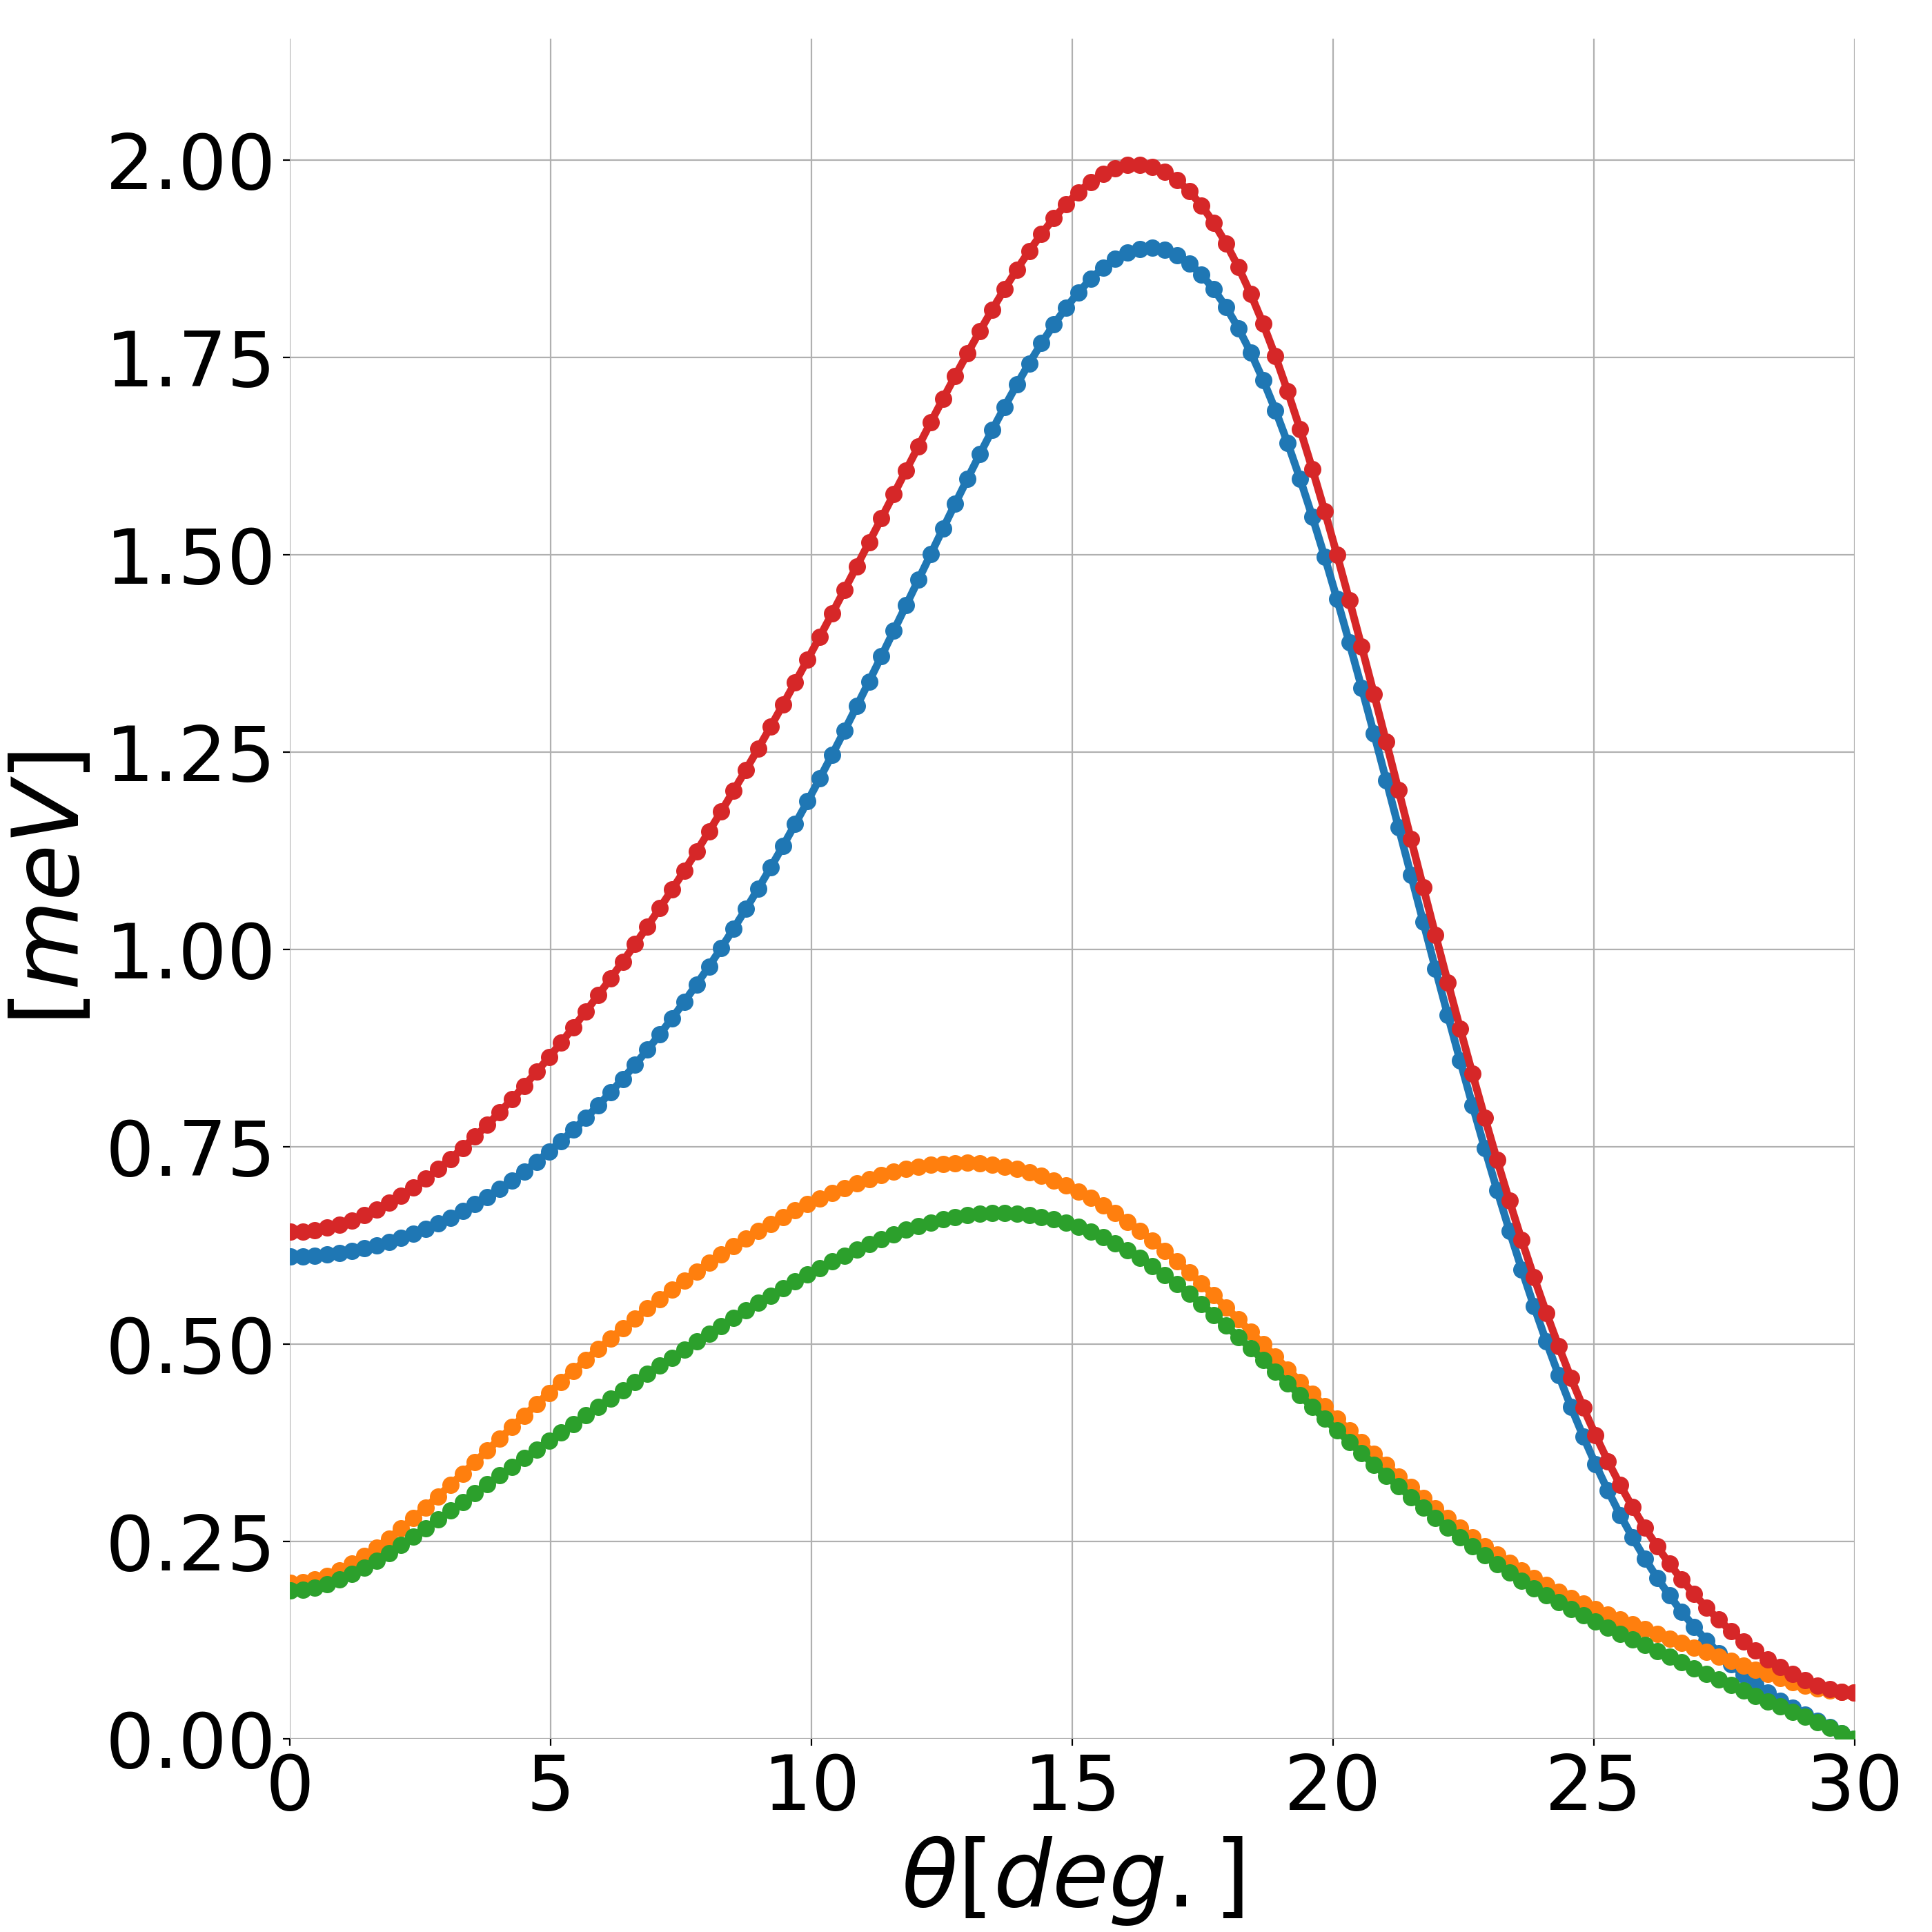

In [172]:
tmp = adjust(
    -1.82 / np.log(0.2), -2.06 / np.log(0.2), 1.82, 2.06, 'MoS2-0.2-0.2-1.82-2.06',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]),
    pSign=1. * np.array([-1, 1, 1, -1, 1, 1]),
    latticeConstant=[at, ag],
    angle = 0.01, cutoffRadius=3., plotRadius=0.0002, onsiteEnergy=1.75, mode='load', 
    axConfig=[0.15, 0.1, 0.81, 0.88], plot='angle', filename='MoS2-angle.pdf')

In [7]:
tmp = adjust(
    -1.82 / np.log(0.2), -2.06 / np.log(0.2), 1.82, 2.06, 'MoS2-0.2-0.2-1.82-2.06',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]),
    pSign=1. * np.array([-1, 1, 1, -1, 1, 1]),
    latticeConstant=[at, ag],
    angle = 0.01, cutoffRadius=3., plotRadius=0.0002, onsiteEnergy=1.75, mode='load', 
    axConfig=[0.20, 0.15, 0.78, 0.82], fontsize=36, plot='compare', filename='MoS2-0.pdf')

1780 : a_t: 3.32
1781 : a_g: 2.46
1782 : d: 3.42
1783 : w:  3.3499999999999996
1784 : V_pppi0:  -1.6071729195451168
1785 : V_ppsigma0:  5.66337124030184
1786 : V_pdpi0:  1.1947467635223203
1787 : V_pdsigma0:  -2.069362096599138
1788 : d_CX:  1.82
1789 : d_CM:  2.06
1790 : r_0:  1.1308295808984936
1791 : r_0m:  1.2799499651928004


TypeError: getHeff() missing 1 required positional argument: 'U'

1780 : a_t: 3.32
1781 : a_g: 2.46
1782 : d: 3.42
1783 : w:  3.3499999999999996
1784 : V_pppi0:  -1.6071729195451168
1785 : V_ppsigma0:  5.66337124030184
1786 : V_pdpi0:  1.1947467635223203
1787 : V_pdsigma0:  -2.069362096599138
1788 : d_CX:  1.82
1789 : d_CM:  2.06
1790 : r_0:  1.1308295808984936
1791 : r_0m:  1.2799499651928004
2401 : Kp:  [1.63264013 0.48361004]
2402 : Km:  [1.01507081 1.06966144]
[[ 4.05849409e-02+8.94466792e-19j -1.64561640e-08+4.53035084e-09j
  -1.96255621e-10+8.65361937e-10j -1.22567671e-03-2.21781880e-03j]
 [-1.64561640e-08-4.53035085e-09j  4.05849409e-02+1.21972744e-18j
   4.78729290e-10+4.12505904e-10j -1.96255621e-10+8.65361937e-10j]
 [-1.96255621e-10-8.65361937e-10j  4.78729291e-10-4.12505904e-10j
   4.34321768e-02+1.42301535e-19j -1.68767637e-08+5.08474539e-09j]
 [-1.22567671e-03+2.21781880e-03j -1.96255621e-10-8.65361937e-10j
  -1.68767637e-08-5.08474539e-09j  4.34321768e-02-6.70850094e-19j]]
0.0014236179516380065
1024


<IPython.core.display.Javascript object>


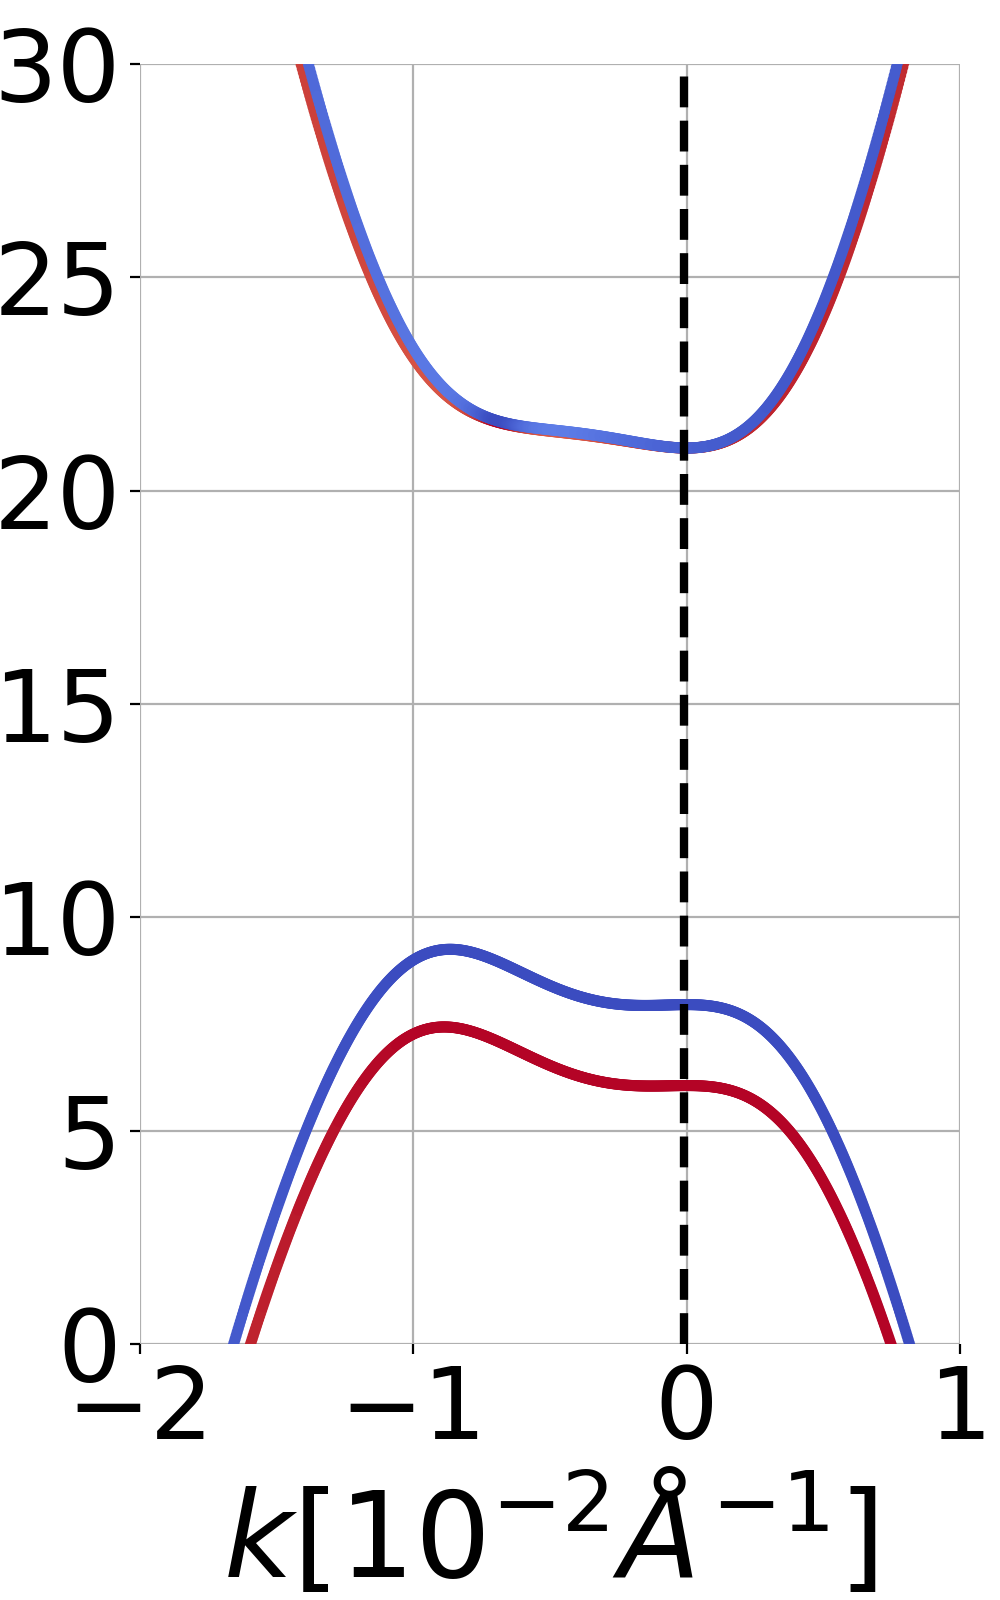

[-2, 1]


In [133]:
V = -0.0 # V/nm
tmp = adjust(
    -1.82 / np.log(0.2), -2.06 / np.log(0.2), 1.82, 2.06, 'WSe2-0.2-0.2-1.94-2.2',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]),
    pSign=1. * np.array([-1, 1, 1, -1, 1, 1]), figsize=[5, 8],
    latticeConstant=[at, ag], U=0.042 + d / 10 * V, eRange=[0, 30], xRange=[-2, 1],
    angle = 16.5, cutoffRadius=3., plotRadius=0.02, onsiteEnergy=.6 + d / 20 * 3 * V, mode='load', 
    axConfig=[0.14, 0.16, 0.82, 0.8], fontsize=36, plot='2d', filename='test.pdf')

1725 : a_t: 3.32
1726 : a_g: 2.46
1727 : d: 3.42
1728 : w:  3.3499999999999996
1729 : V_pppi0:  -1.6071729195451168
1730 : V_ppsigma0:  5.66337124030184
1731 : V_pdpi0:  1.1947467635223203
1732 : V_pdsigma0:  -2.069362096599138
1733 : d_CX:  1.82
1734 : d_CM:  2.06
1735 : r_0:  1.1308295808984936
1736 : r_0m:  1.2799499651928004
2346 : Kp:  [1.61942123 0.52618185]
2347 : Km:  [0.98672249 1.09586635]
[[ 6.18319937e-02-1.58564568e-18j -1.05289748e-08+2.13912429e-08j
  -1.05362940e-09+1.11722380e-09j -1.23944898e-03-4.33477995e-03j]
 [-1.05289748e-08-2.13912429e-08j  6.18319937e-02-9.35124374e-19j
   2.13369861e-09-5.25677864e-10j -1.05362940e-09+1.11722380e-09j]
 [-1.05362940e-09-1.11722380e-09j  2.13369861e-09+5.25677865e-10j
   6.44576186e-02-1.82959117e-18j -1.14373174e-08+2.33958816e-08j]
 [-1.23944898e-03+4.33477995e-03j -1.05362940e-09-1.11722380e-09j
  -1.14373174e-08-2.33958816e-08j  6.44576186e-02-2.15485182e-18j]]
0.0013128124313479886
256


<IPython.core.display.Javascript object>


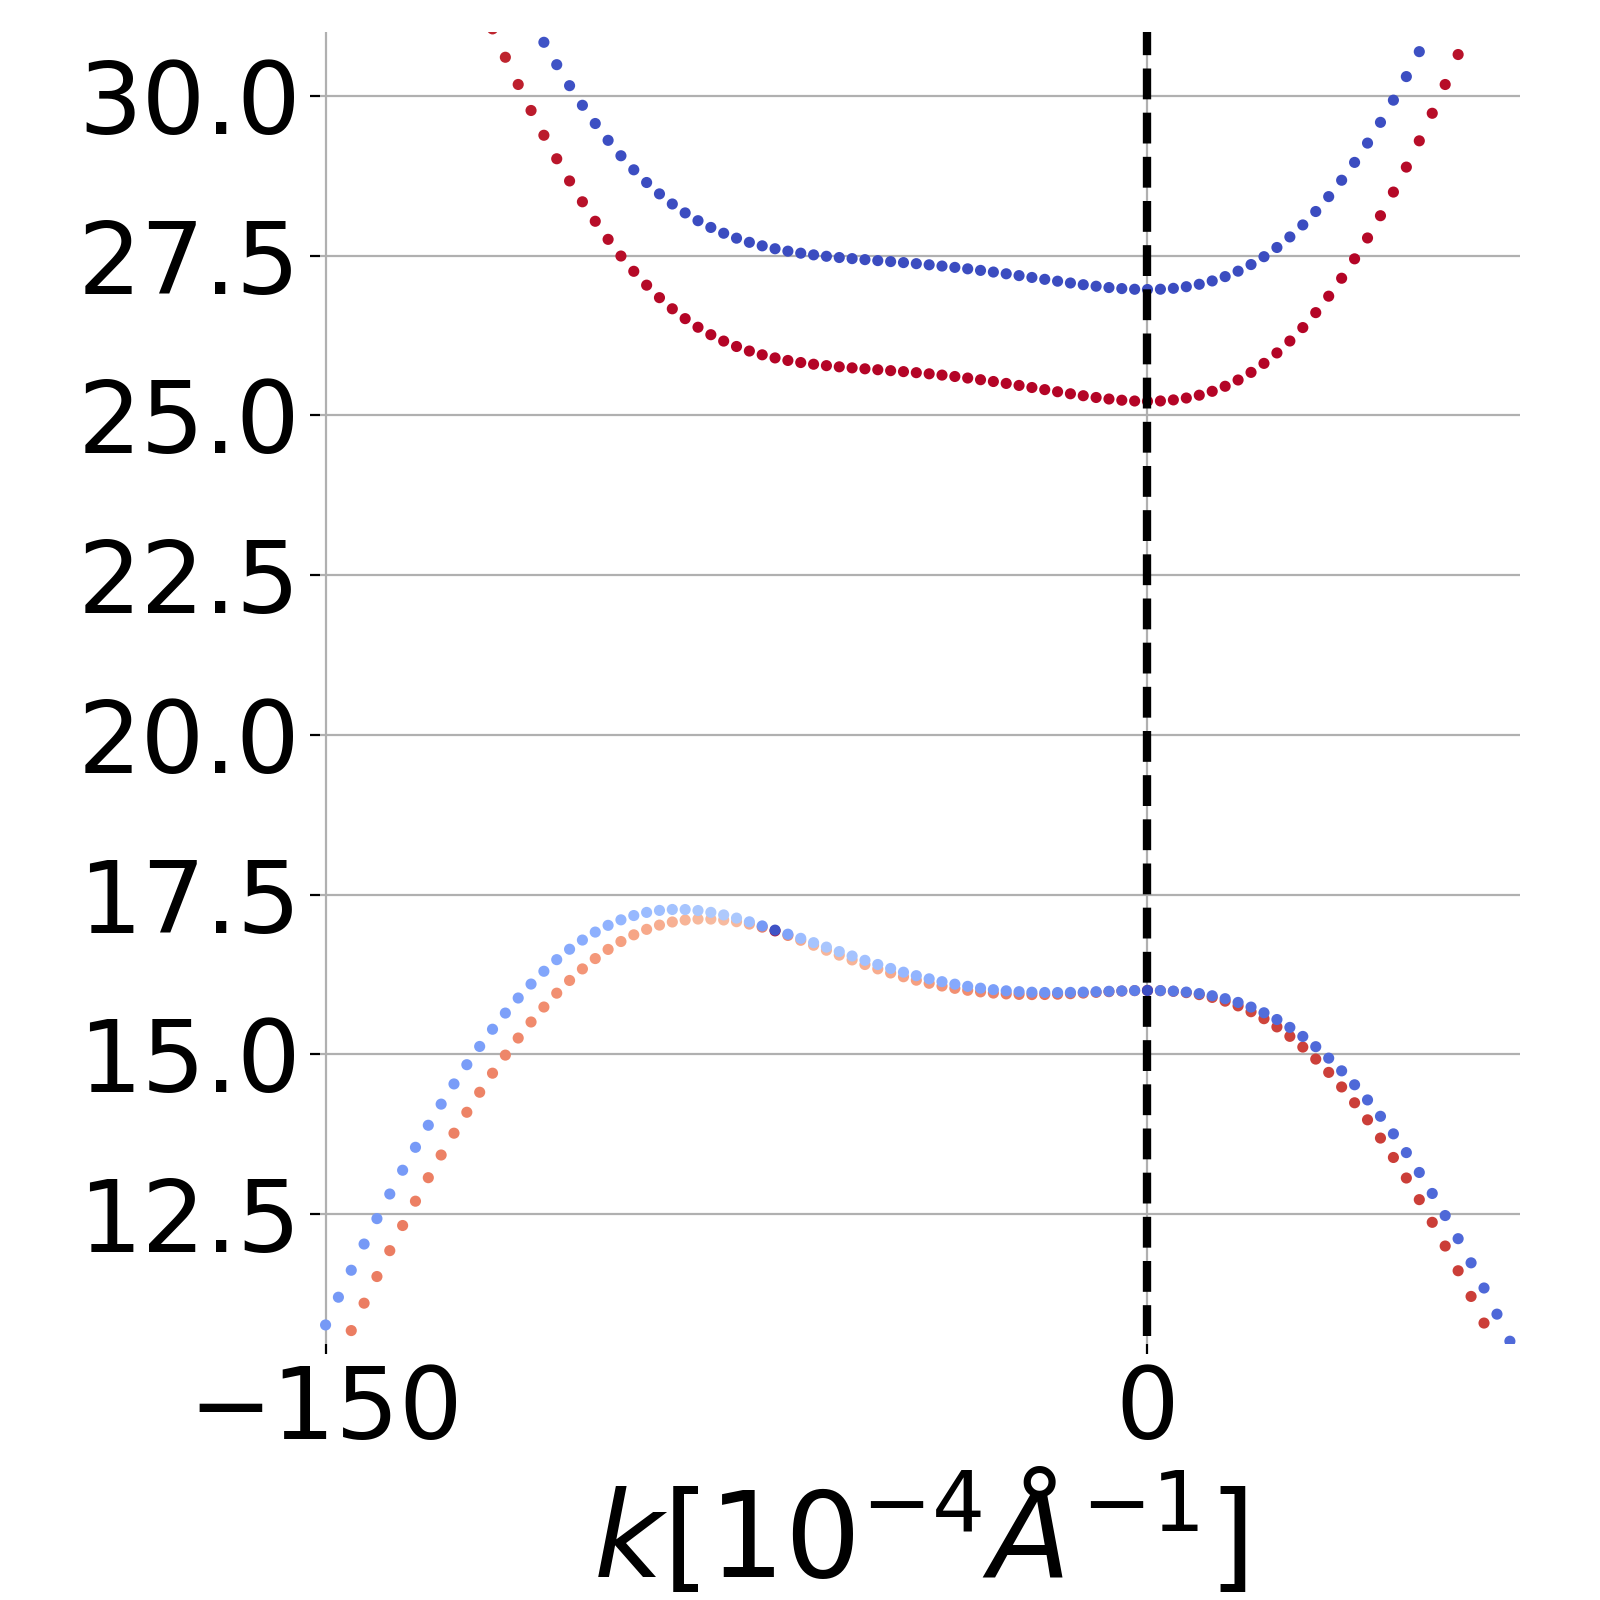

In [102]:
tmp = adjust(
    -1.82 / np.log(0.2), -2.06 / np.log(0.2), 1.82, 2.06, 'WSe2-0.2-0.2-1.94-2.2',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]),
    pSign=1. * np.array([-1, 1, 1, -1, 1, 1]),
    latticeConstant=[at, ag],
    angle = 18, cutoffRadius=3., plotRadius=0.03, onsiteEnergy=.1, mode='load', 
    axConfig=[0.20, 0.16, 0.75, 0.82], fontsize=36, plot='2d', filename='WSe2-BLG-18.pdf')

1725 : a_t: 3.32
1726 : a_g: 2.46
1727 : d: 3.42
1728 : w:  3.3499999999999996
1729 : V_pppi0:  -1.6071729195451168
1730 : V_ppsigma0:  5.66337124030184
1731 : V_pdpi0:  1.1947467635223203
1732 : V_pdsigma0:  -2.069362096599138
1733 : d_CX:  1.82
1734 : d_CM:  2.06
1735 : r_0:  1.1308295808984936
1736 : r_0m:  1.2799499651928004
2346 : Kp:  [1.47463363 0.85138012]
2347 : Km:  [0.73731681 1.27707018]
[[ 7.93801473e-02-4.55364912e-18j  7.59026590e-10+9.83951053e-10j
   4.40990528e-11-2.43945489e-18j -1.73619858e-03-3.00718414e-03j]
 [ 7.59026590e-10-9.83951052e-10j  7.93801473e-02-2.60208521e-18j
   2.26084966e-10-3.91590660e-10j  4.40990519e-11-2.68340038e-18j]
 [ 4.40990529e-11+3.25260652e-18j  2.26084966e-10+3.91590660e-10j
   7.93801473e-02-5.51926668e-18j  4.72613321e-10+1.14931184e-09j]
 [-1.73619858e-03+3.00718414e-03j  4.40990529e-11+2.84603070e-18j
   4.72613319e-10-1.14931184e-09j  7.93801473e-02-9.65617560e-19j]]
7.167059455367114e-18
256


<IPython.core.display.Javascript object>


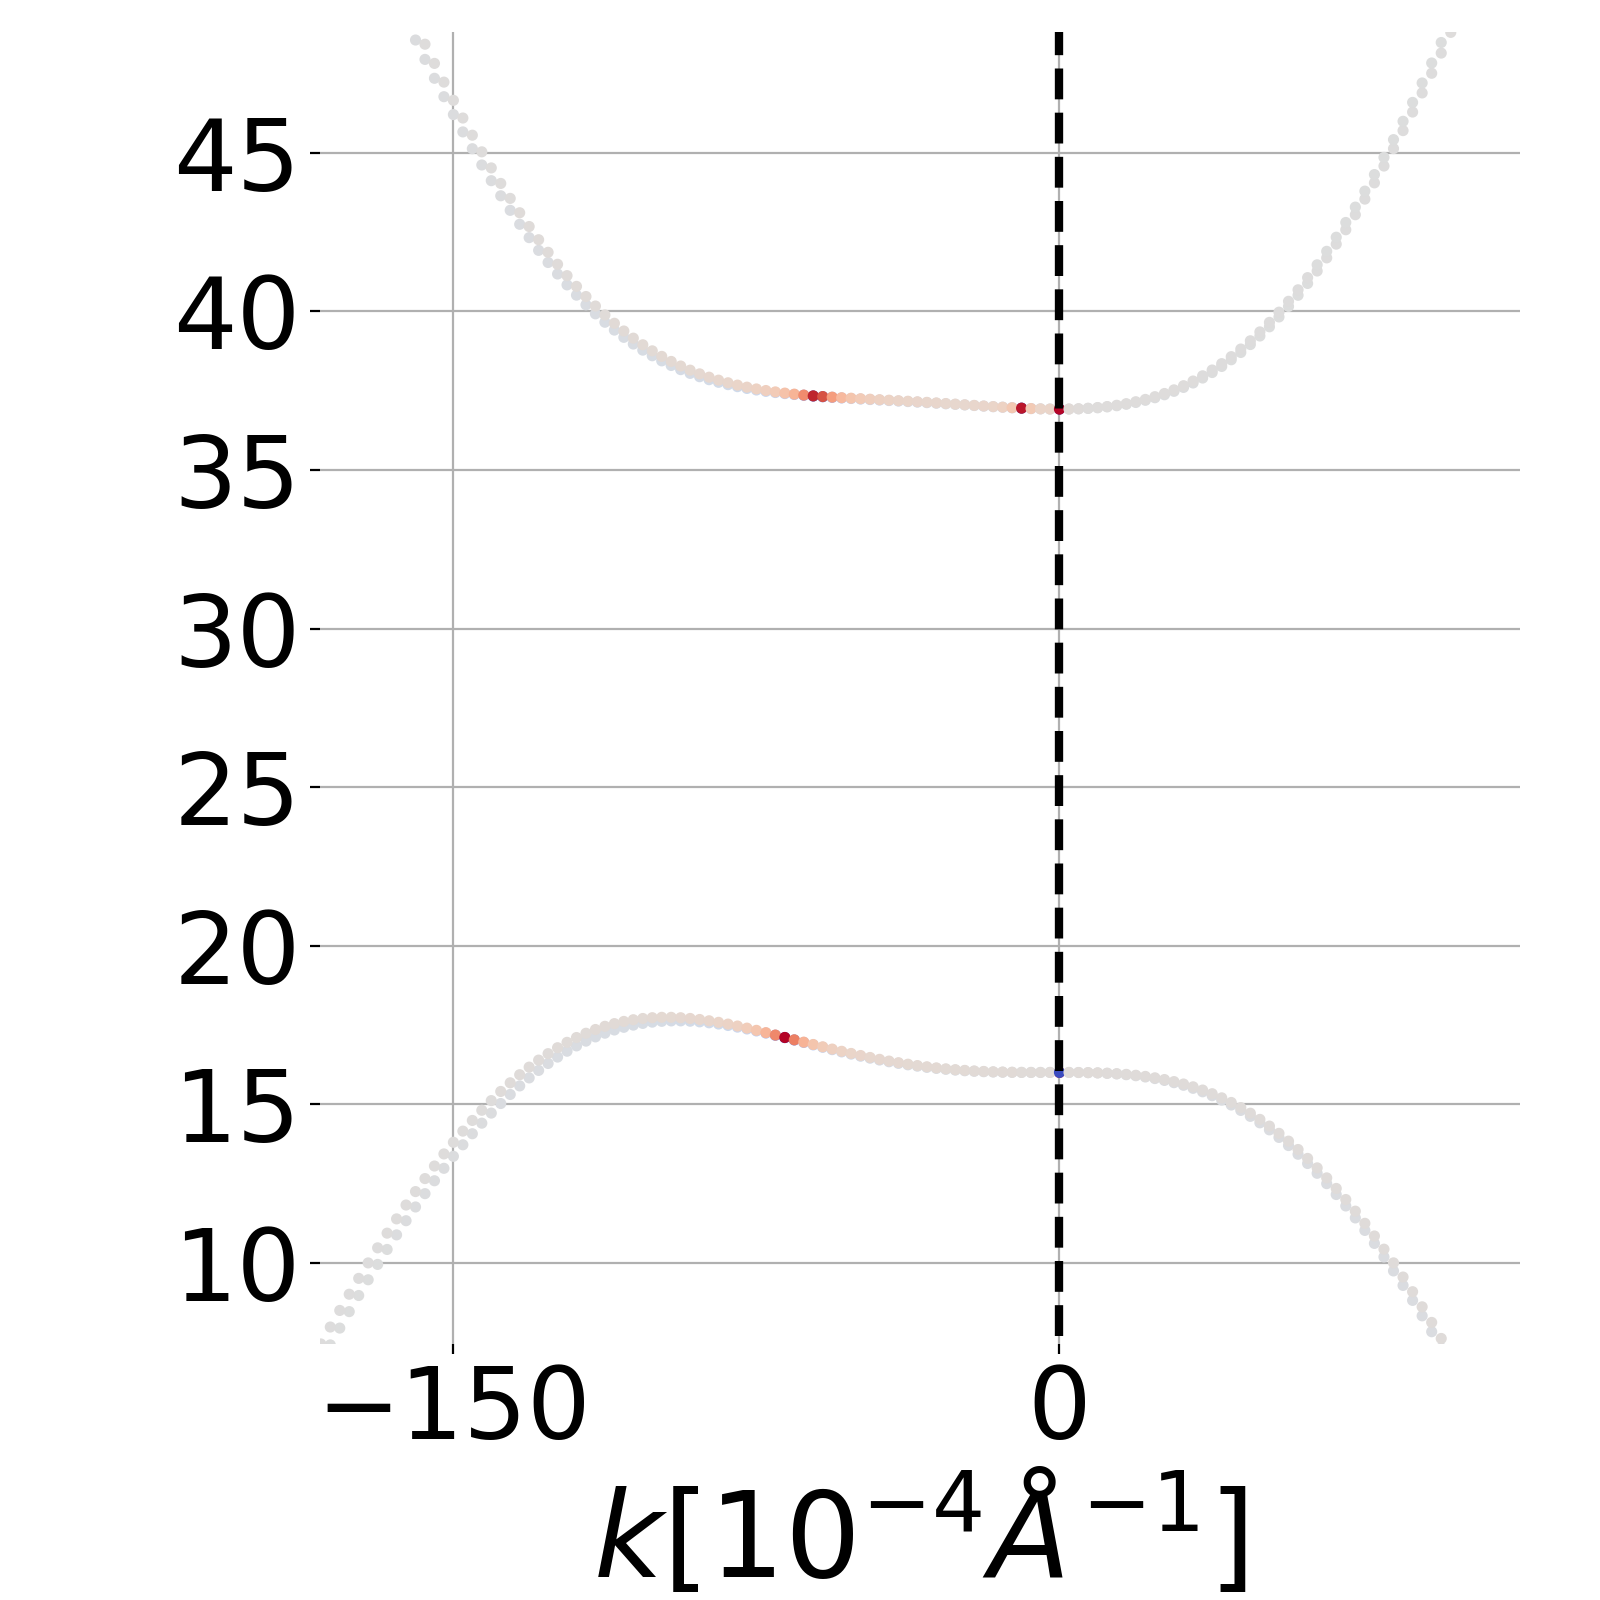

In [103]:
tmp = adjust(
    -1.82 / np.log(0.2), -2.06 / np.log(0.2), 1.82, 2.06, 'WSe2-0.2-0.2-1.94-2.2',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]),
    pSign=1. * np.array([-1, 1, 1, -1, 1, 1]),
    latticeConstant=[at, ag],
    angle = 30, cutoffRadius=3., plotRadius=0.03, onsiteEnergy=.1, mode='load', 
    axConfig=[0.20, 0.16, 0.75, 0.82], fontsize=36, plot='2d', filename='WSe2-BLG-30-0.12.pdf')

1725 : a_t: 3.32
1726 : a_g: 2.46
1727 : d: 3.42
1728 : w:  3.3499999999999996
1729 : V_pppi0:  -1.6071729195451168
1730 : V_ppsigma0:  5.66337124030184
1731 : V_pdpi0:  1.1947467635223203
1732 : V_pdsigma0:  -2.069362096599138
1733 : d_CX:  1.82
1734 : d_CM:  2.06
1735 : r_0:  1.1308295808984936
1736 : r_0m:  1.2799499651928004
2346 : Kp:  [1.70276022e+00 2.97187725e-04]
2347 : Km:  [1.27694148 0.73753969]
[[ 4.74278090e-02+4.73914934e-19j -1.98126202e-09-1.93854034e-11j
   3.59177992e-13+1.55529190e-10j -1.77149985e-06-2.04223272e-03j]
 [-1.98126202e-09+1.93854040e-11j  4.74278090e-02+5.55230097e-19j
  -1.71912612e-12+2.96700325e-11j  3.59177565e-13+1.55529190e-10j]
 [ 3.59177878e-13-1.55529190e-10j -1.71912672e-12-2.96700327e-11j
   4.86424581e-02+7.20838273e-19j -1.94062773e-09-1.63308865e-11j]
 [-1.77149985e-06+2.04223272e-03j  3.59178183e-13-1.55529190e-10j
  -1.94062773e-09+1.63308885e-11j  4.86424581e-02-2.16585001e-18j]]
0.0006073245436600087
256


<IPython.core.display.Javascript object>


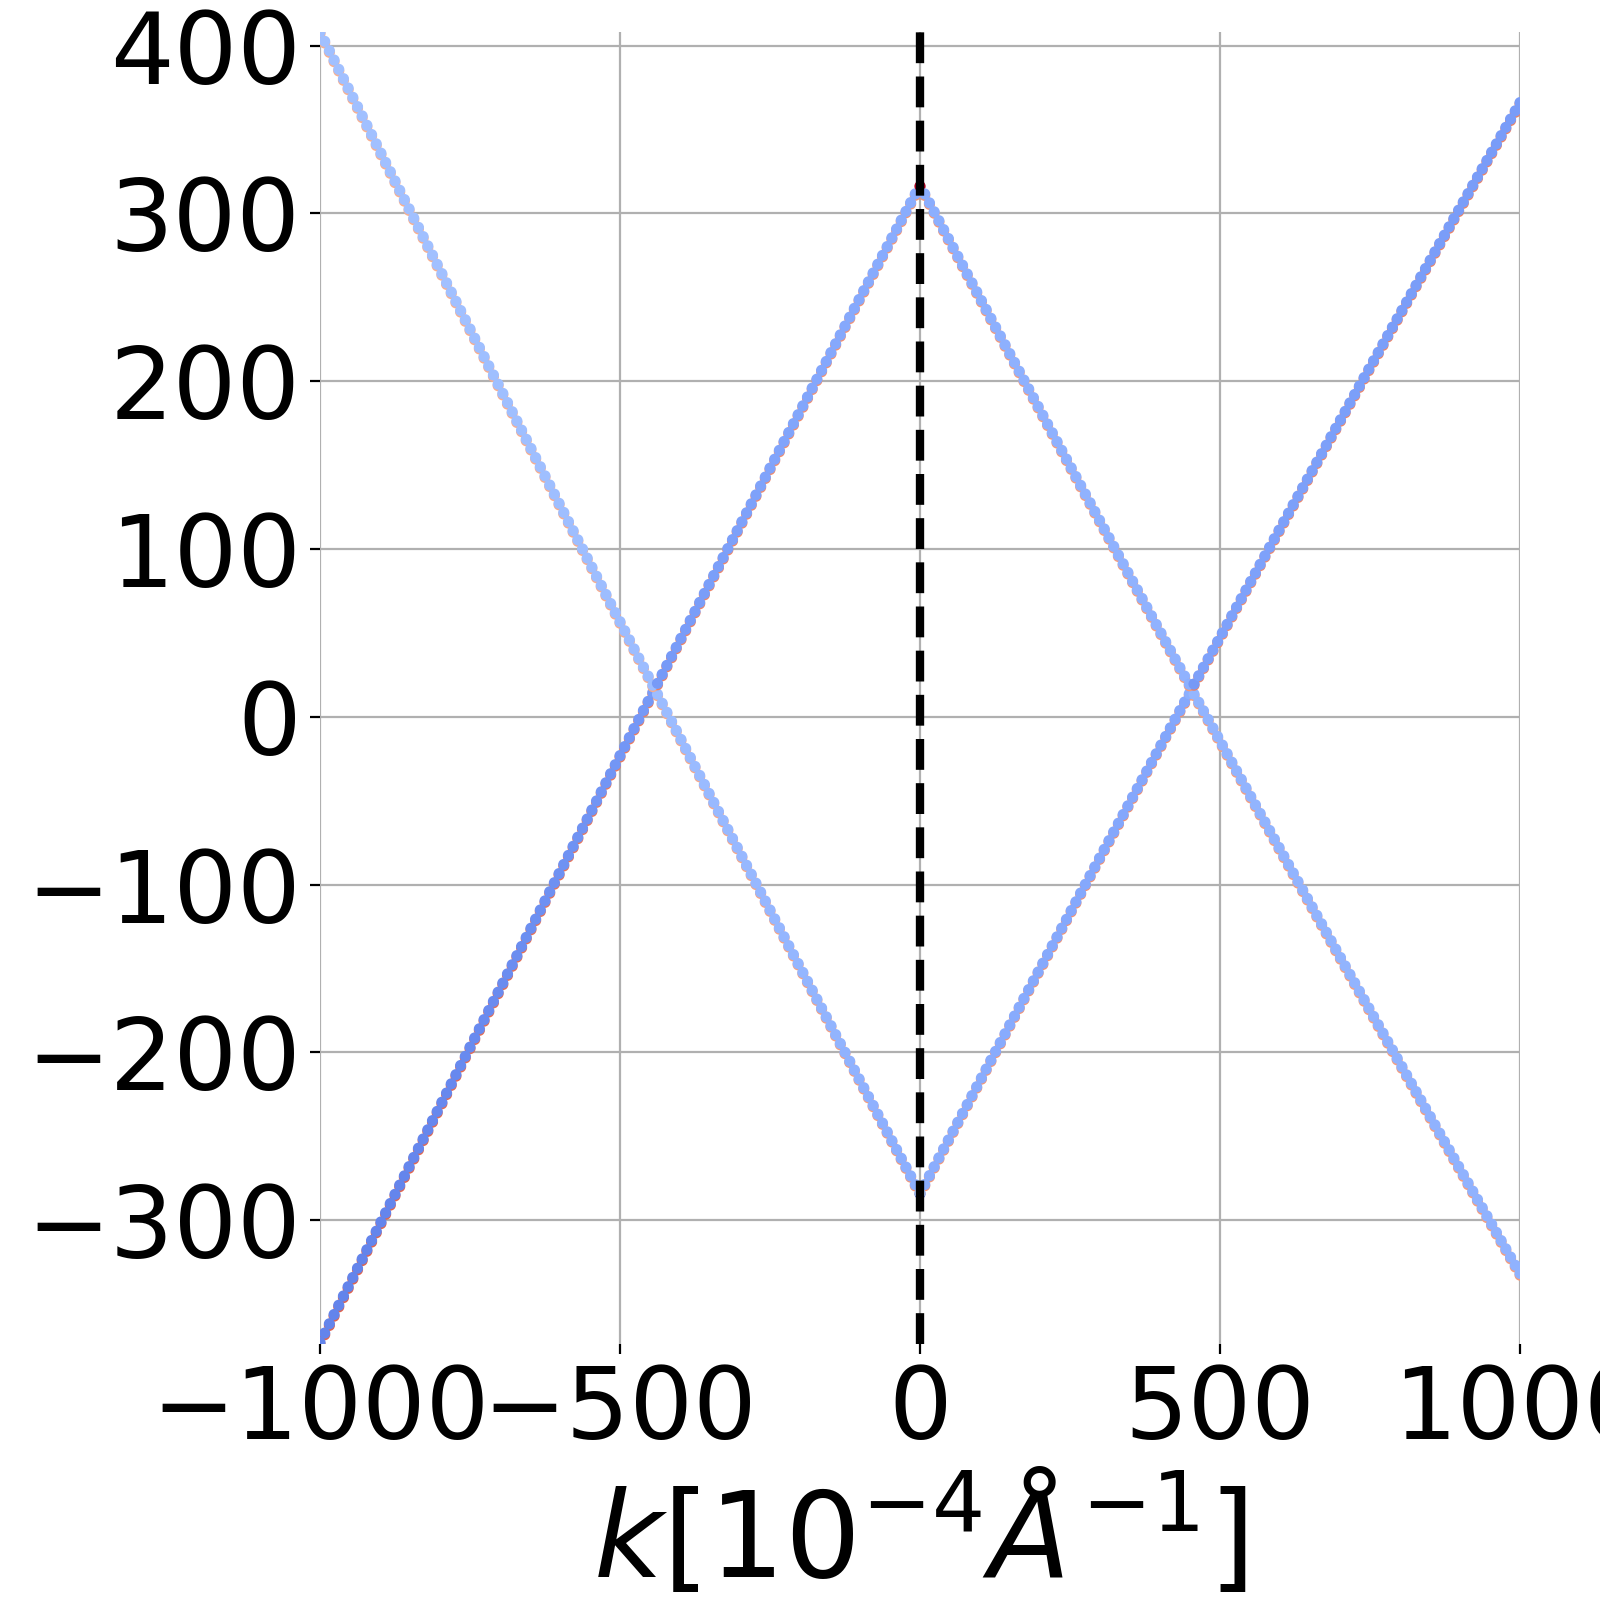

In [13]:
tmp = adjust(
    -1.82 / np.log(0.2), -2.06 / np.log(0.2), 1.82, 2.06, 'WSe2-0.2-0.2-1.94-2.2',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]),
    pSign=1. * np.array([-1, 1, 1, -1, 1, 1]),
    latticeConstant=[at, ag],
    angle = 0.01, cutoffRadius=3., plotRadius=0.1, onsiteEnergy=.1, mode='load', 
    axConfig=[0.20, 0.16, 0.75, 0.82], fontsize=36, plot='2d', filename='WSe2-BLG-30-0.12.pdf')

1725 : a_t: 3.32
1726 : a_g: 2.46
1727 : d: 3.42
1728 : w:  3.3499999999999996
1729 : V_pppi0:  -1.6071729195451168
1730 : V_ppsigma0:  5.66337124030184
1731 : V_pdpi0:  1.1947467635223203
1732 : V_pdsigma0:  -2.069362096599138
1733 : d_CX:  1.82
1734 : d_CM:  2.06
1735 : r_0:  1.1308295808984936
1736 : r_0m:  1.2799499651928004
2346 : Kp:  [1.47463363 0.85138012]
2347 : Km:  [0.73731681 1.27707018]
[[ 7.93801473e-02-4.55364912e-18j  7.59026590e-10+9.83951053e-10j
   4.40990528e-11-2.43945489e-18j -1.73619858e-03-3.00718414e-03j]
 [ 7.59026590e-10-9.83951052e-10j  7.93801473e-02-2.60208521e-18j
   2.26084966e-10-3.91590660e-10j  4.40990519e-11-2.68340038e-18j]
 [ 4.40990529e-11+3.25260652e-18j  2.26084966e-10+3.91590660e-10j
   7.93801473e-02-5.51926668e-18j  4.72613321e-10+1.14931184e-09j]
 [-1.73619858e-03+3.00718414e-03j  4.40990529e-11+2.84603070e-18j
   4.72613319e-10-1.14931184e-09j  7.93801473e-02-9.65617560e-19j]]
7.167059455367114e-18
256


<IPython.core.display.Javascript object>


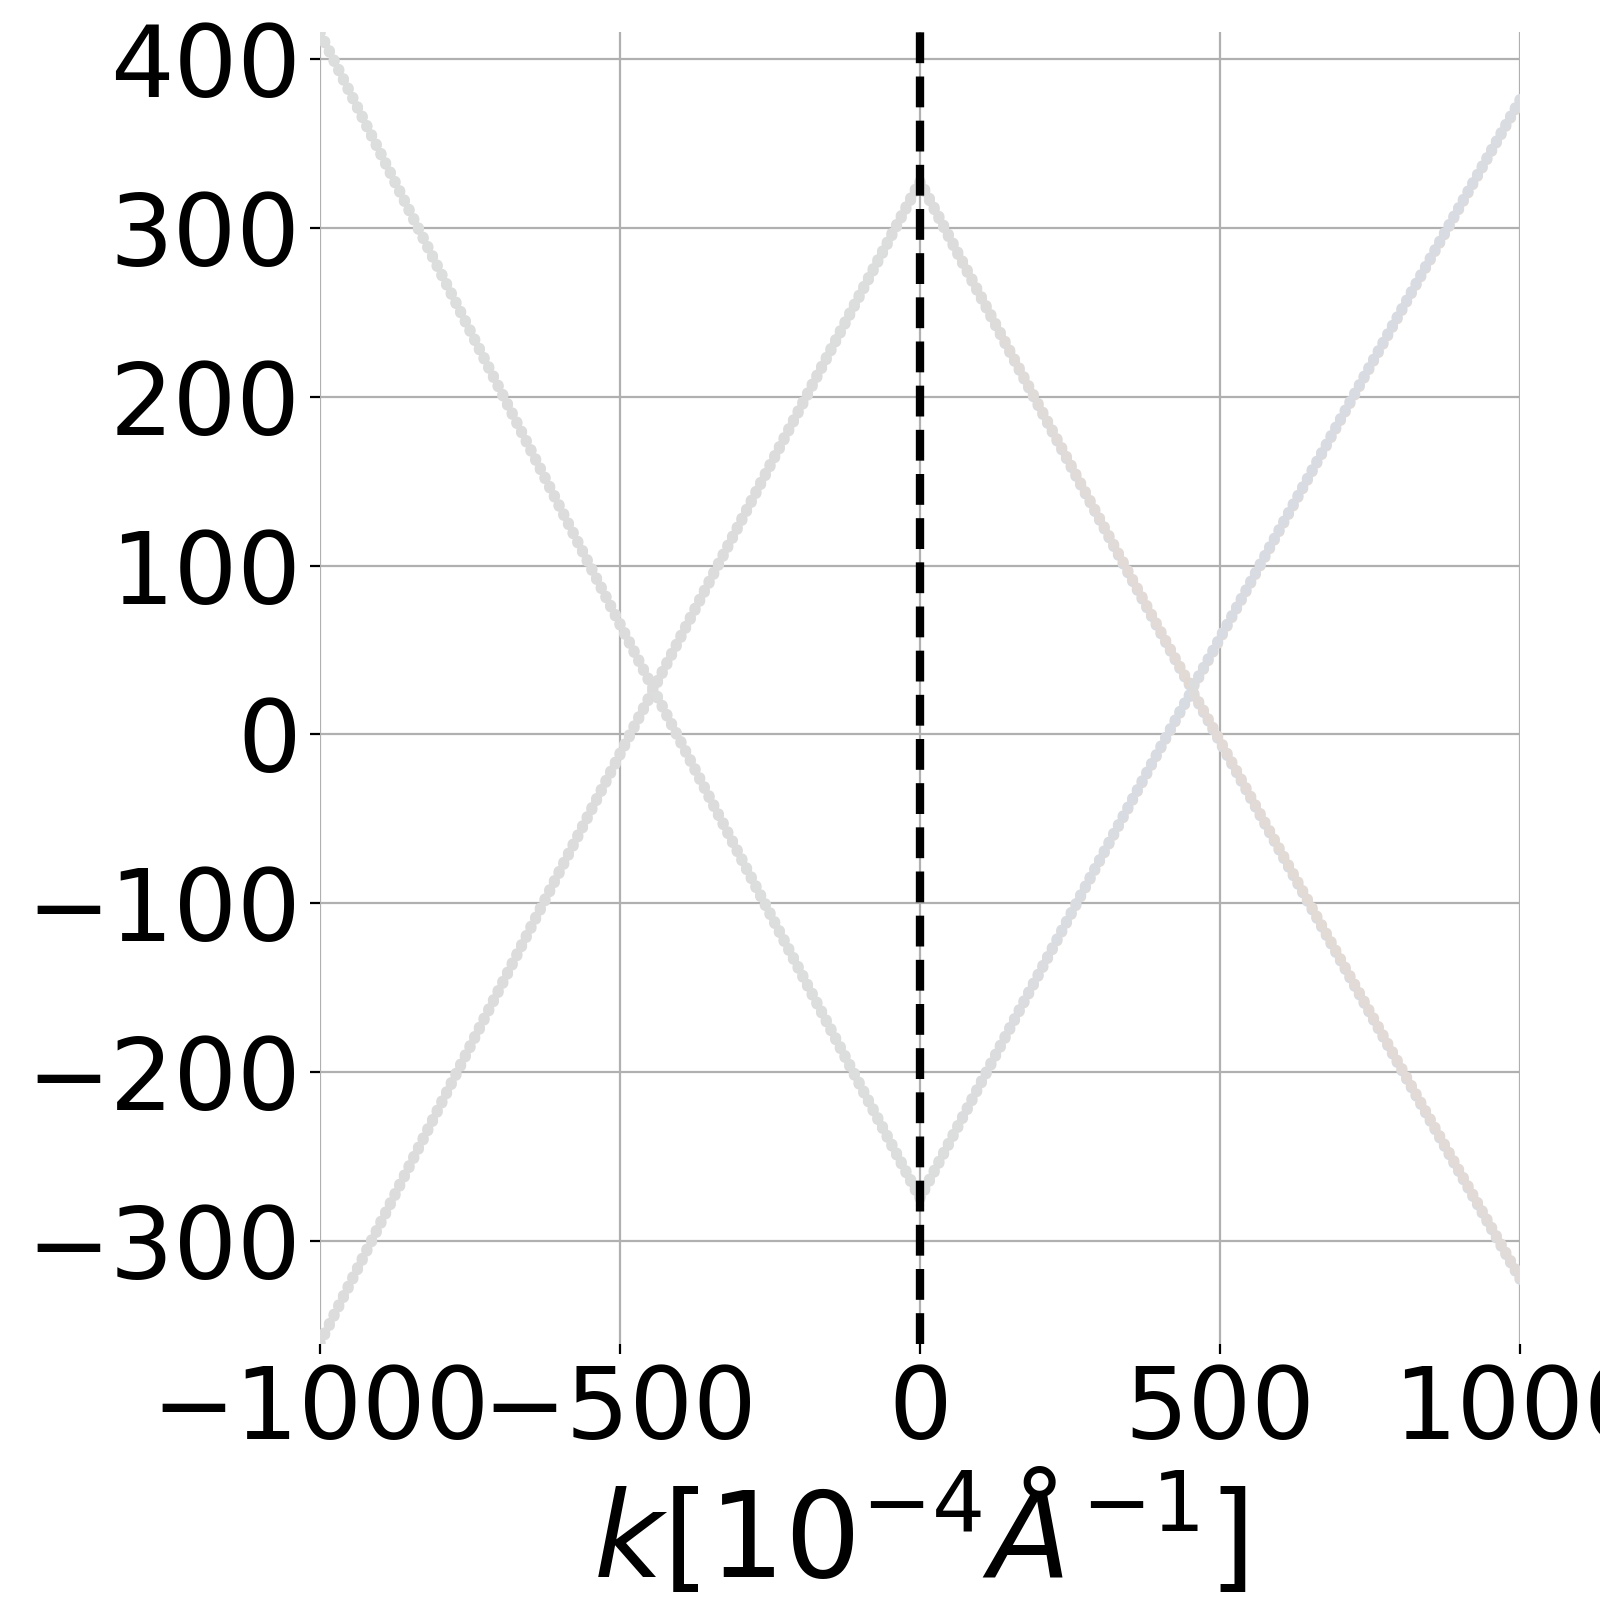

In [12]:
tmp = adjust(
    -1.82 / np.log(0.2), -2.06 / np.log(0.2), 1.82, 2.06, 'WSe2-0.2-0.2-1.94-2.2',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]),
    pSign=1. * np.array([-1, 1, 1, -1, 1, 1]),
    latticeConstant=[at, ag],
    angle = 30, cutoffRadius=3., plotRadius=0.1, onsiteEnergy=.1, mode='load', 
    axConfig=[0.20, 0.16, 0.75, 0.82], fontsize=36, plot='2d', filename='WSe2-BLG-30-0.12.pdf')

a_t: 3.18
a_g: 2.46
d: 3.37
w:  3.130000000000001
V_pppi0:  -1.8260946745562128
V_ppsigma0:  6.434809805579038
V_pdpi0:  1.5541670761982123
V_pdsigma0:  -2.691896339426075
d_CX:  1.82
d_CM:  2.06
r_0:  1.1308295808984936
r_0m:  1.2799499651928004
2.945220350360038e-05
258


<IPython.core.display.Javascript object>


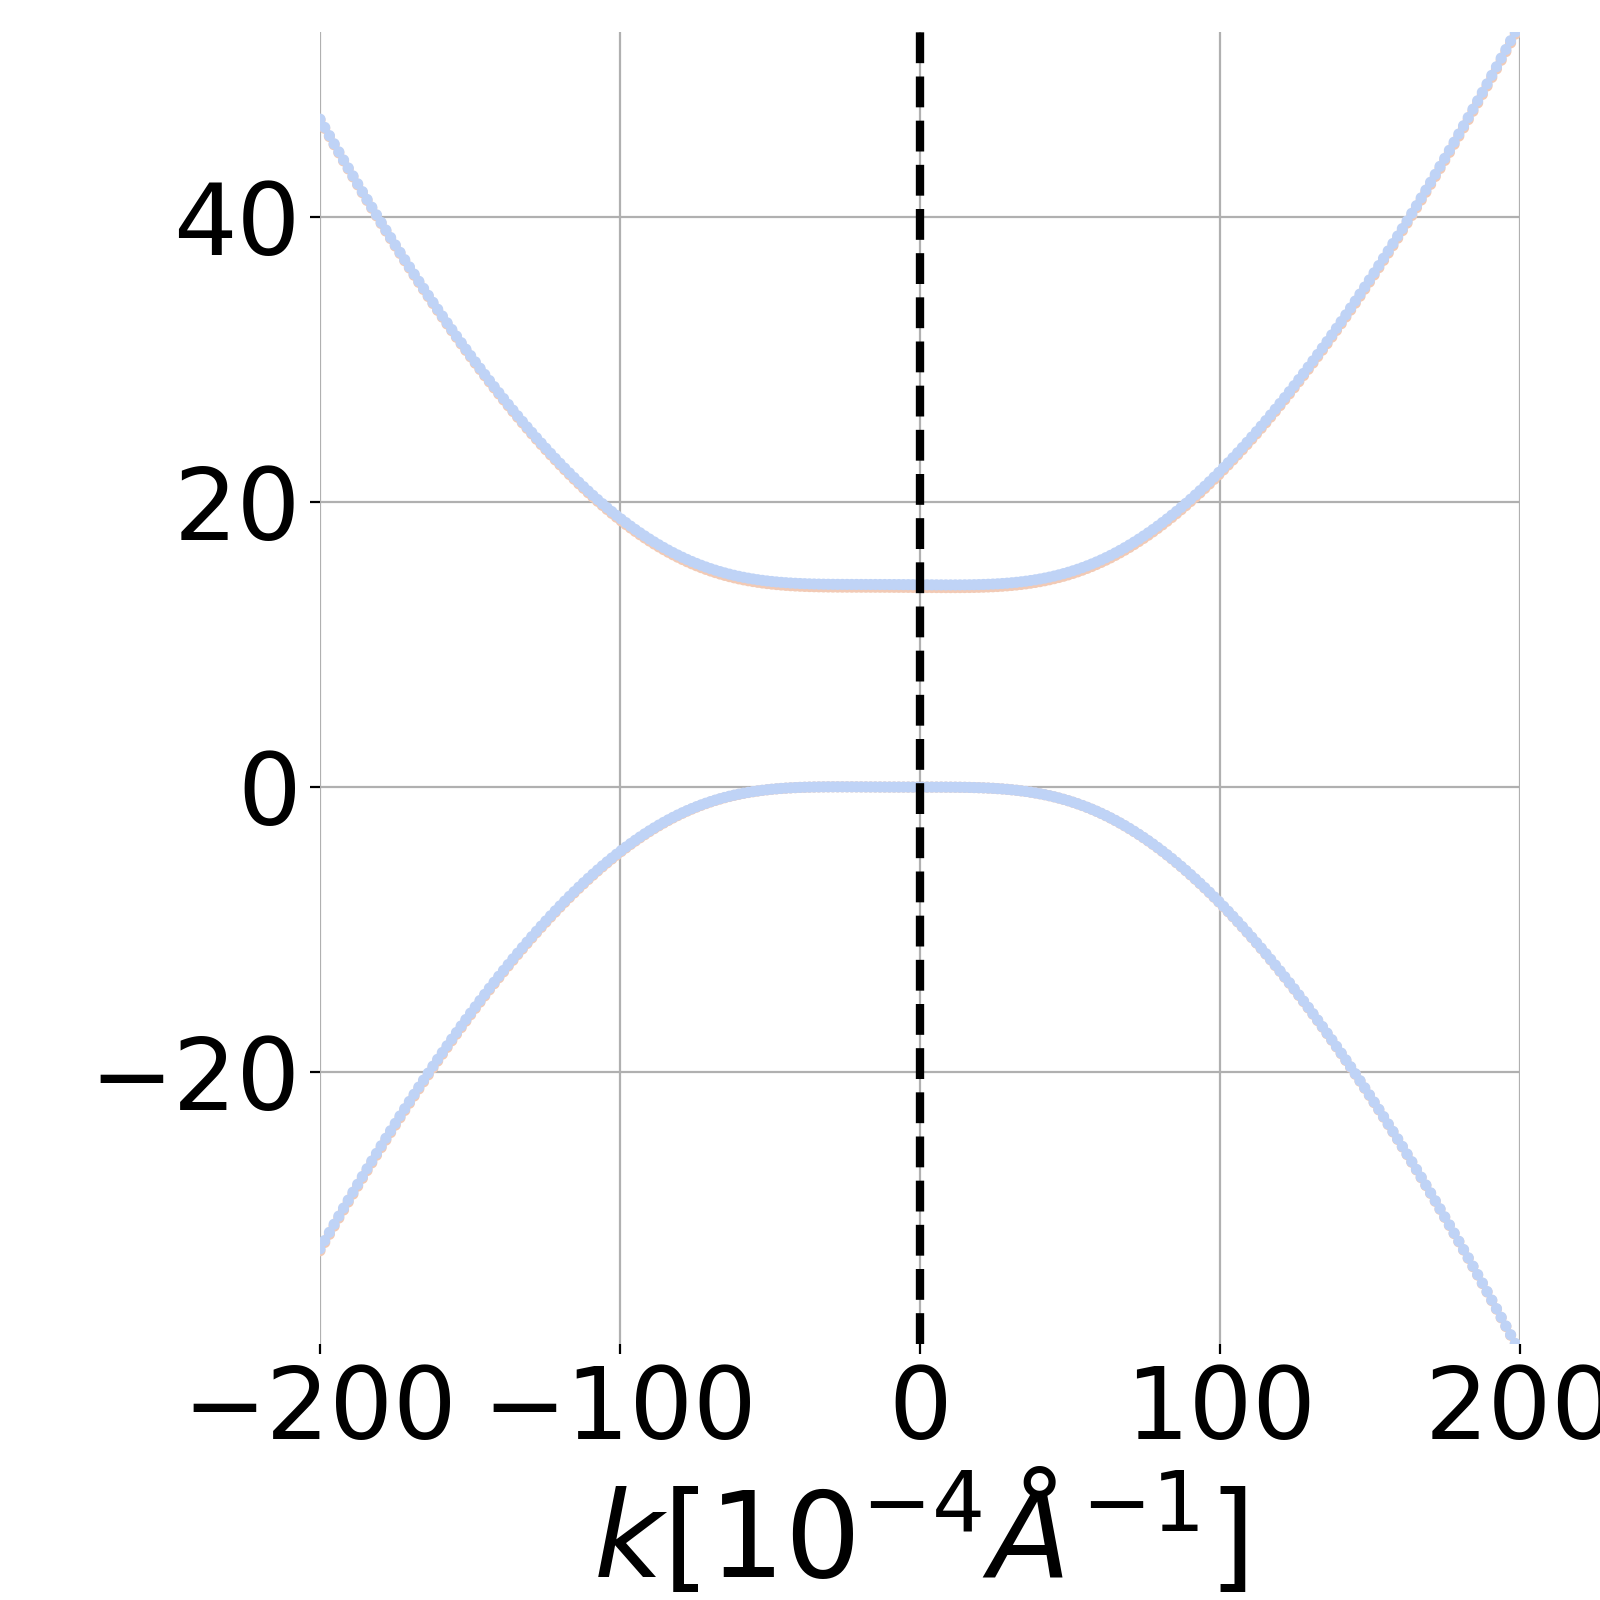

In [118]:
tmp = adjust(
    -1.82 / np.log(0.2), -2.06 / np.log(0.2), 1.82, 2.06, 'MoS2-0.2-0.2-1.82-2.06',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]),
    pSign=1. * np.array([-1, 1, 1, -1, 1, 1]),
    latticeConstant=[at, ag],
    angle = 0, cutoffRadius=3., plotRadius=0.02, onsiteEnergy=.2, mode='load', 
    axConfig=[0.20, 0.16, 0.75, 0.82], fontsize=36, plot='2d', filename='MoS2-BLG-0.pdf')

a_t: 3.18
a_g: 2.46
d: 3.37
w:  3.130000000000001
V_pppi0:  -1.8260946745562128
V_ppsigma0:  6.434809805579038
V_pdpi0:  1.5541670761982123
V_pdsigma0:  -2.691896339426075
d_CX:  1.82
d_CM:  2.06
r_0:  1.1308295808984936
r_0m:  1.2799499651928004
7.072286870567363e-18
258


<IPython.core.display.Javascript object>


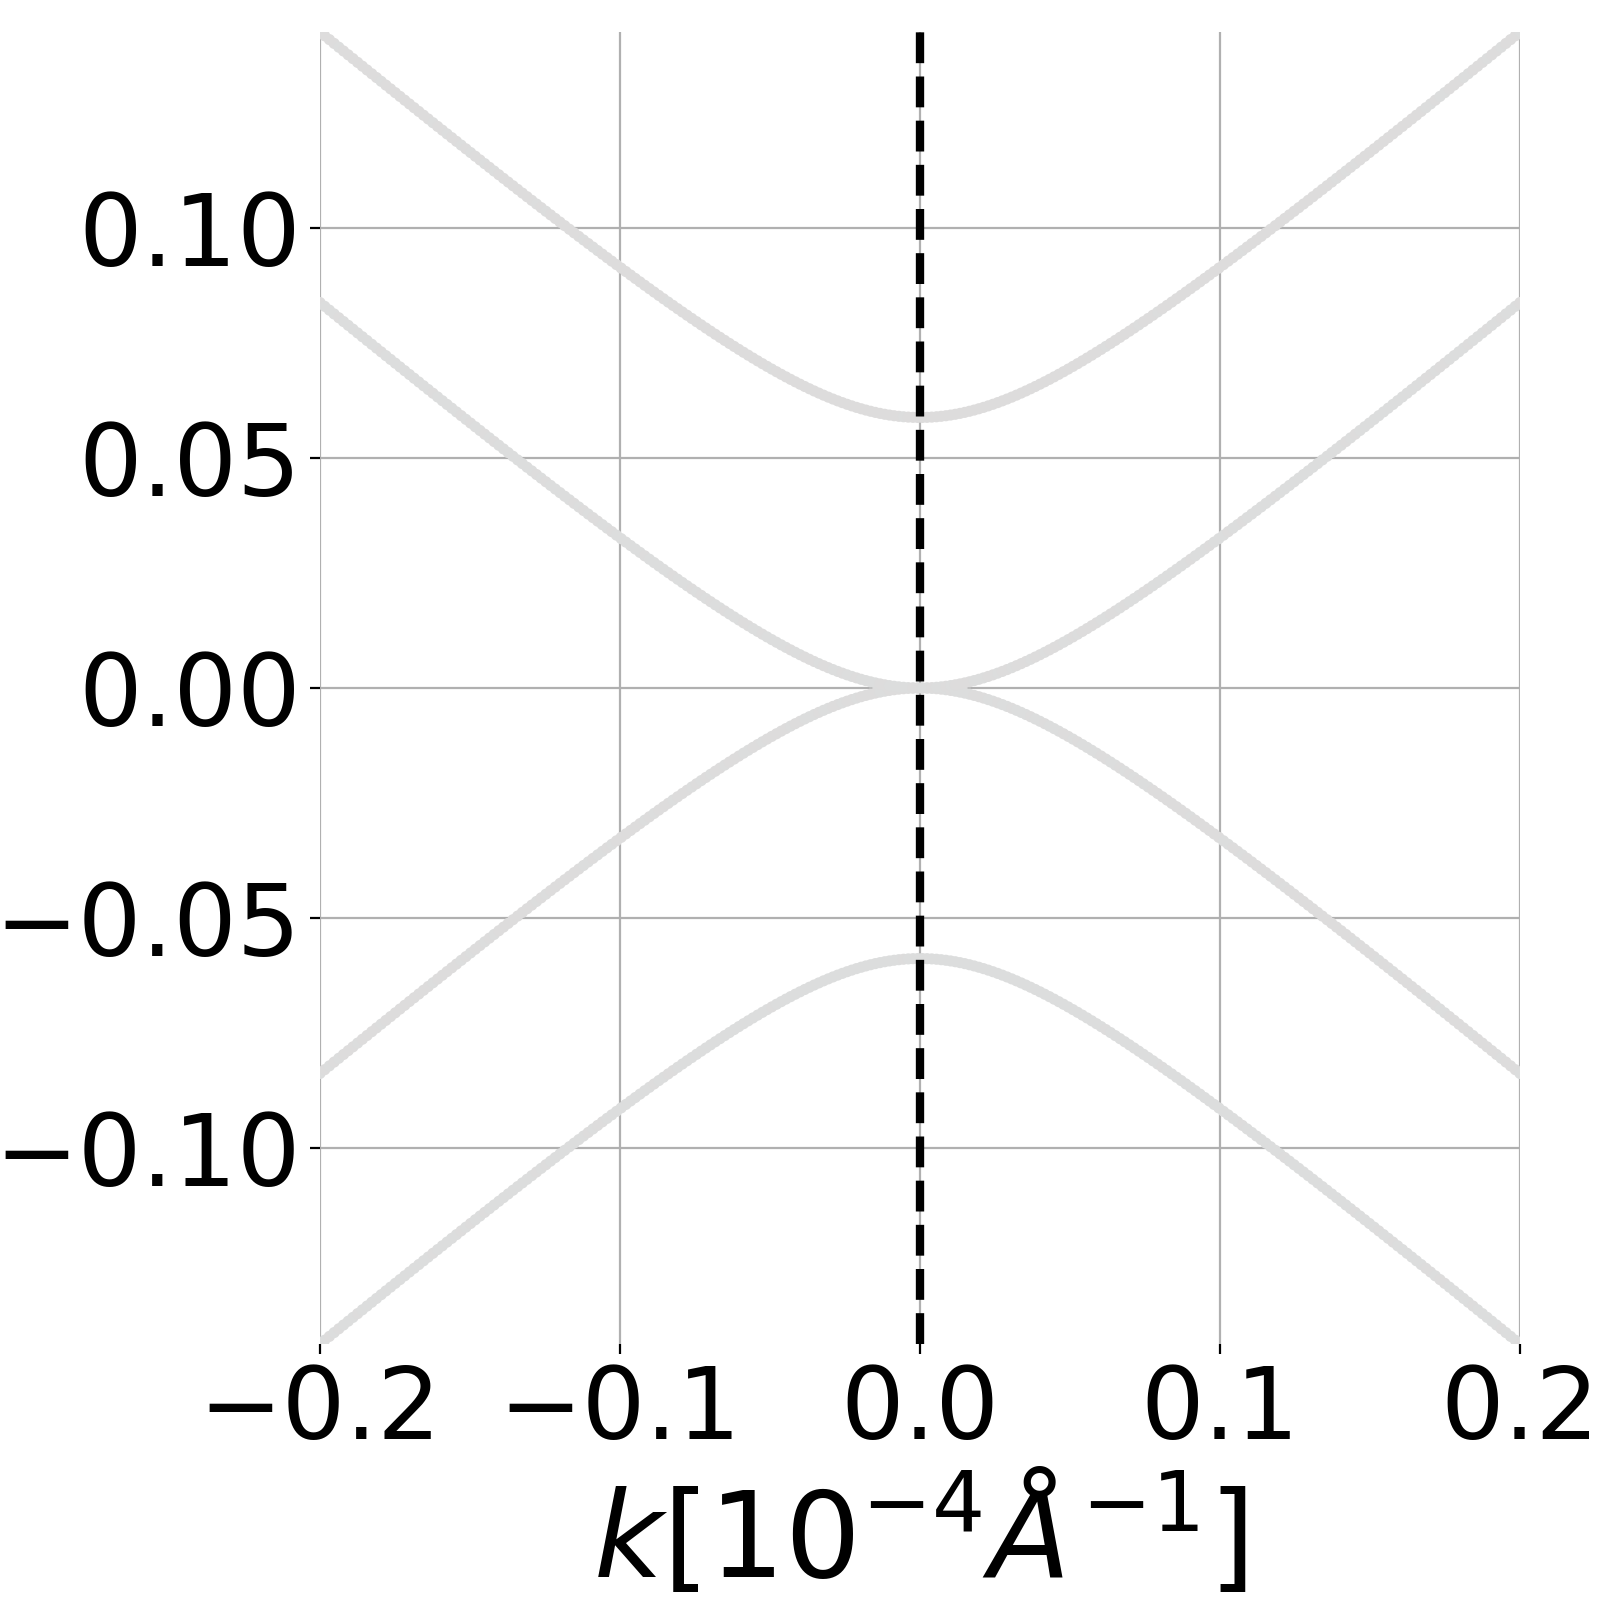

In [104]:
tmp = adjust(
    -1.82 / np.log(0.2), -2.06 / np.log(0.2), 1.82, 2.06, 'MoS2-0.2-0.2-1.82-2.06',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]),
    pSign=1. * np.array([-1, 1, 1, -1, 1, 1]),
    latticeConstant=[at, ag],
    angle = 30, cutoffRadius=3., plotRadius=0.00002, onsiteEnergy=1.75, mode='load', 
    axConfig=[0.20, 0.16, 0.75, 0.82], fontsize=36, plot='2d', filename='MoS2-30.pdf')

# WS$_2$

a_t: 3.18
a_g: 2.46
d: 3.41
w:  3.1400000000000006
V_pppi0:  -1.8260946745562128
V_ppsigma0:  6.434809805579038
V_pdpi0:  1.1947467635223203
V_pdsigma0:  -2.069362096599138
d_CX:  1.82
d_CM:  2.2
r_0:  1.1308295808984936
r_0m:  1.3669368560311461


<IPython.core.display.Javascript object>


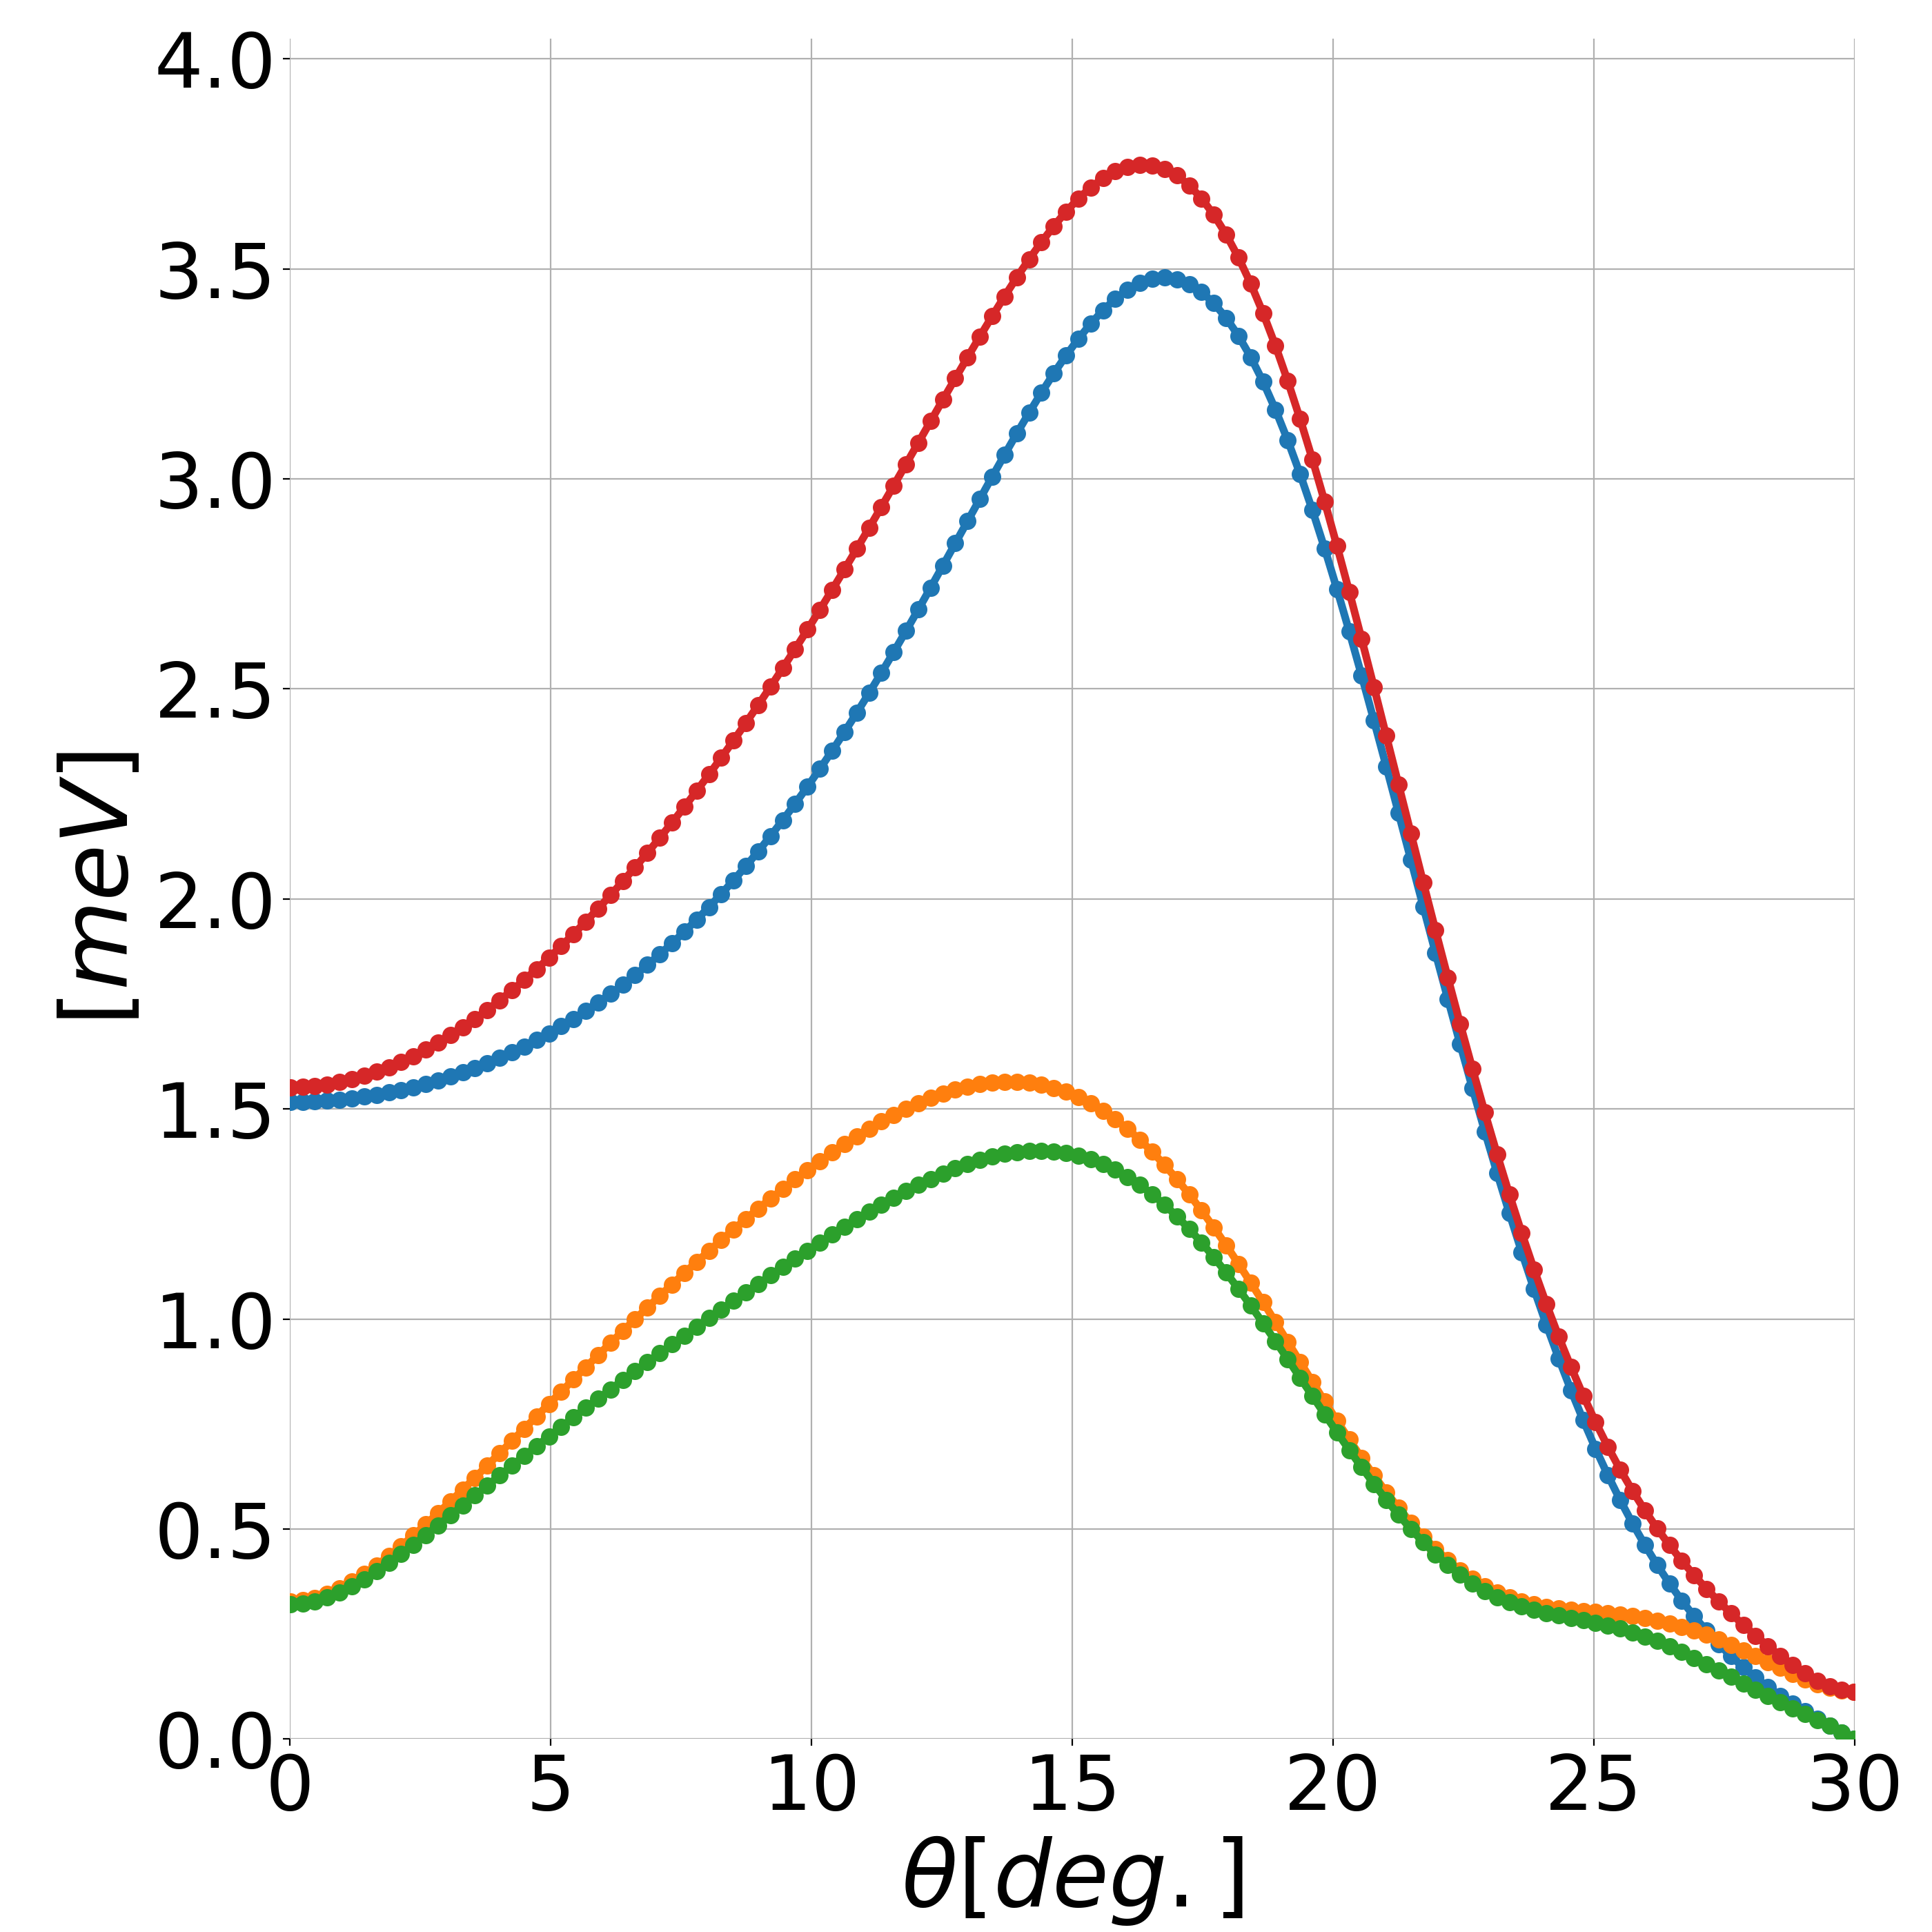

In [176]:
tmp = adjust(
    -d_cs / np.log(0.2), -d_moc / np.log(0.2), d_cs, d_moc, 'WS2-0.2-0.2-1.82-2.2',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]),
    angle = 0.01, cutoffRadius=3., plotRadius=0.0002, onsiteEnergy=1.85, mode='load', 
    axConfig=[0.15, 0.1, 0.81, 0.88], plot='angle', filename='WS2-angle-1.85.pdf', legendLoc='upper left')

a_t: 3.18
a_g: 2.46
d: 3.41
w:  3.1400000000000006
V_pppi0:  -1.8260946745562128
V_ppsigma0:  6.434809805579038
V_pdpi0:  1.1947467635223203
V_pdsigma0:  -2.069362096599138
d_CX:  1.82
d_CM:  2.2
r_0:  1.1308295808984936
r_0m:  1.3669368560311461


<IPython.core.display.Javascript object>


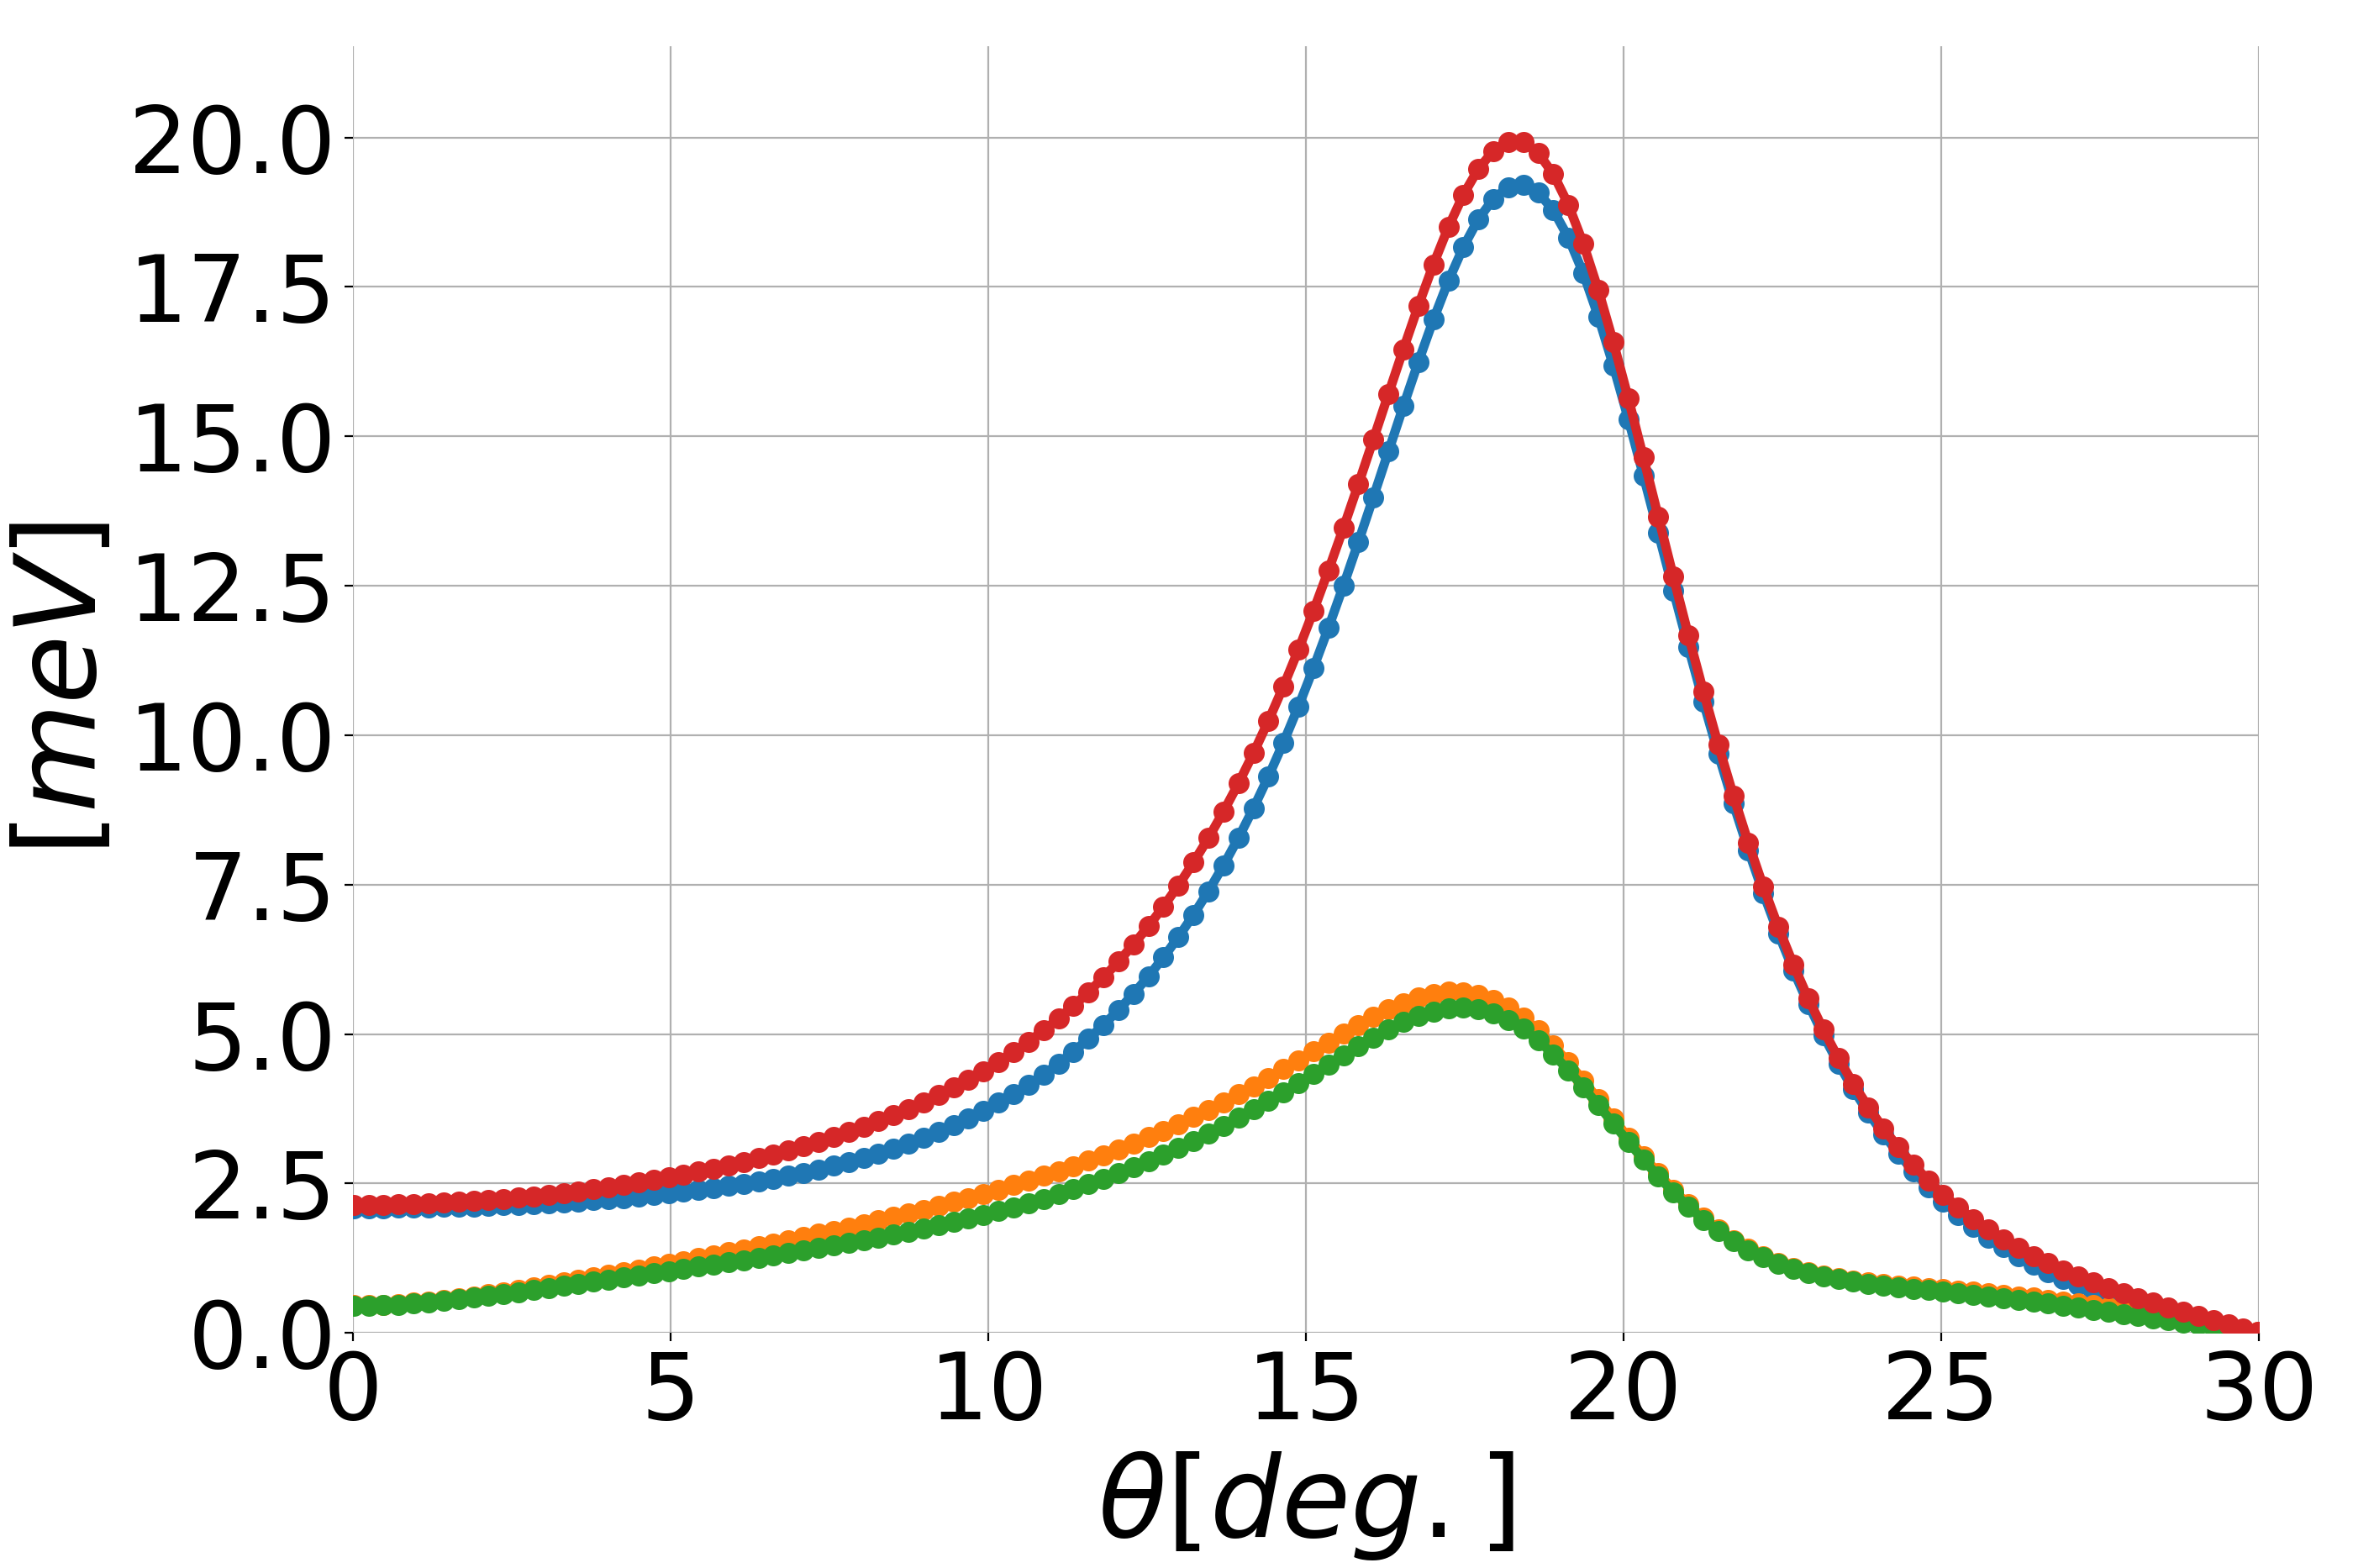

In [187]:
tmp = adjust(
    -d_cs / np.log(0.2), -d_moc / np.log(0.2), d_cs, d_moc, 'WS2-0.2-0.2-1.82-2.2',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]), figsize=[14, 28 / 3.],
    angle = 0.01, cutoffRadius=3., plotRadius=0.0002, onsiteEnergy=2.05, mode='load', 
    axConfig=[0.15, 0.15, 0.81, 0.82], plot='angle', filename='WS2-angle-2.05.pdf', legendLoc='upper left')

a_t: 3.18
a_g: 2.46
d: 3.41
w:  3.1400000000000006
V_pppi0:  -1.8260946745562128
V_ppsigma0:  6.434809805579038
V_pdpi0:  1.1947467635223203
V_pdsigma0:  -2.069362096599138
d_CX:  1.82
d_CM:  2.2
r_0:  1.1308295808984936
r_0m:  1.3669368560311461
258


<IPython.core.display.Javascript object>


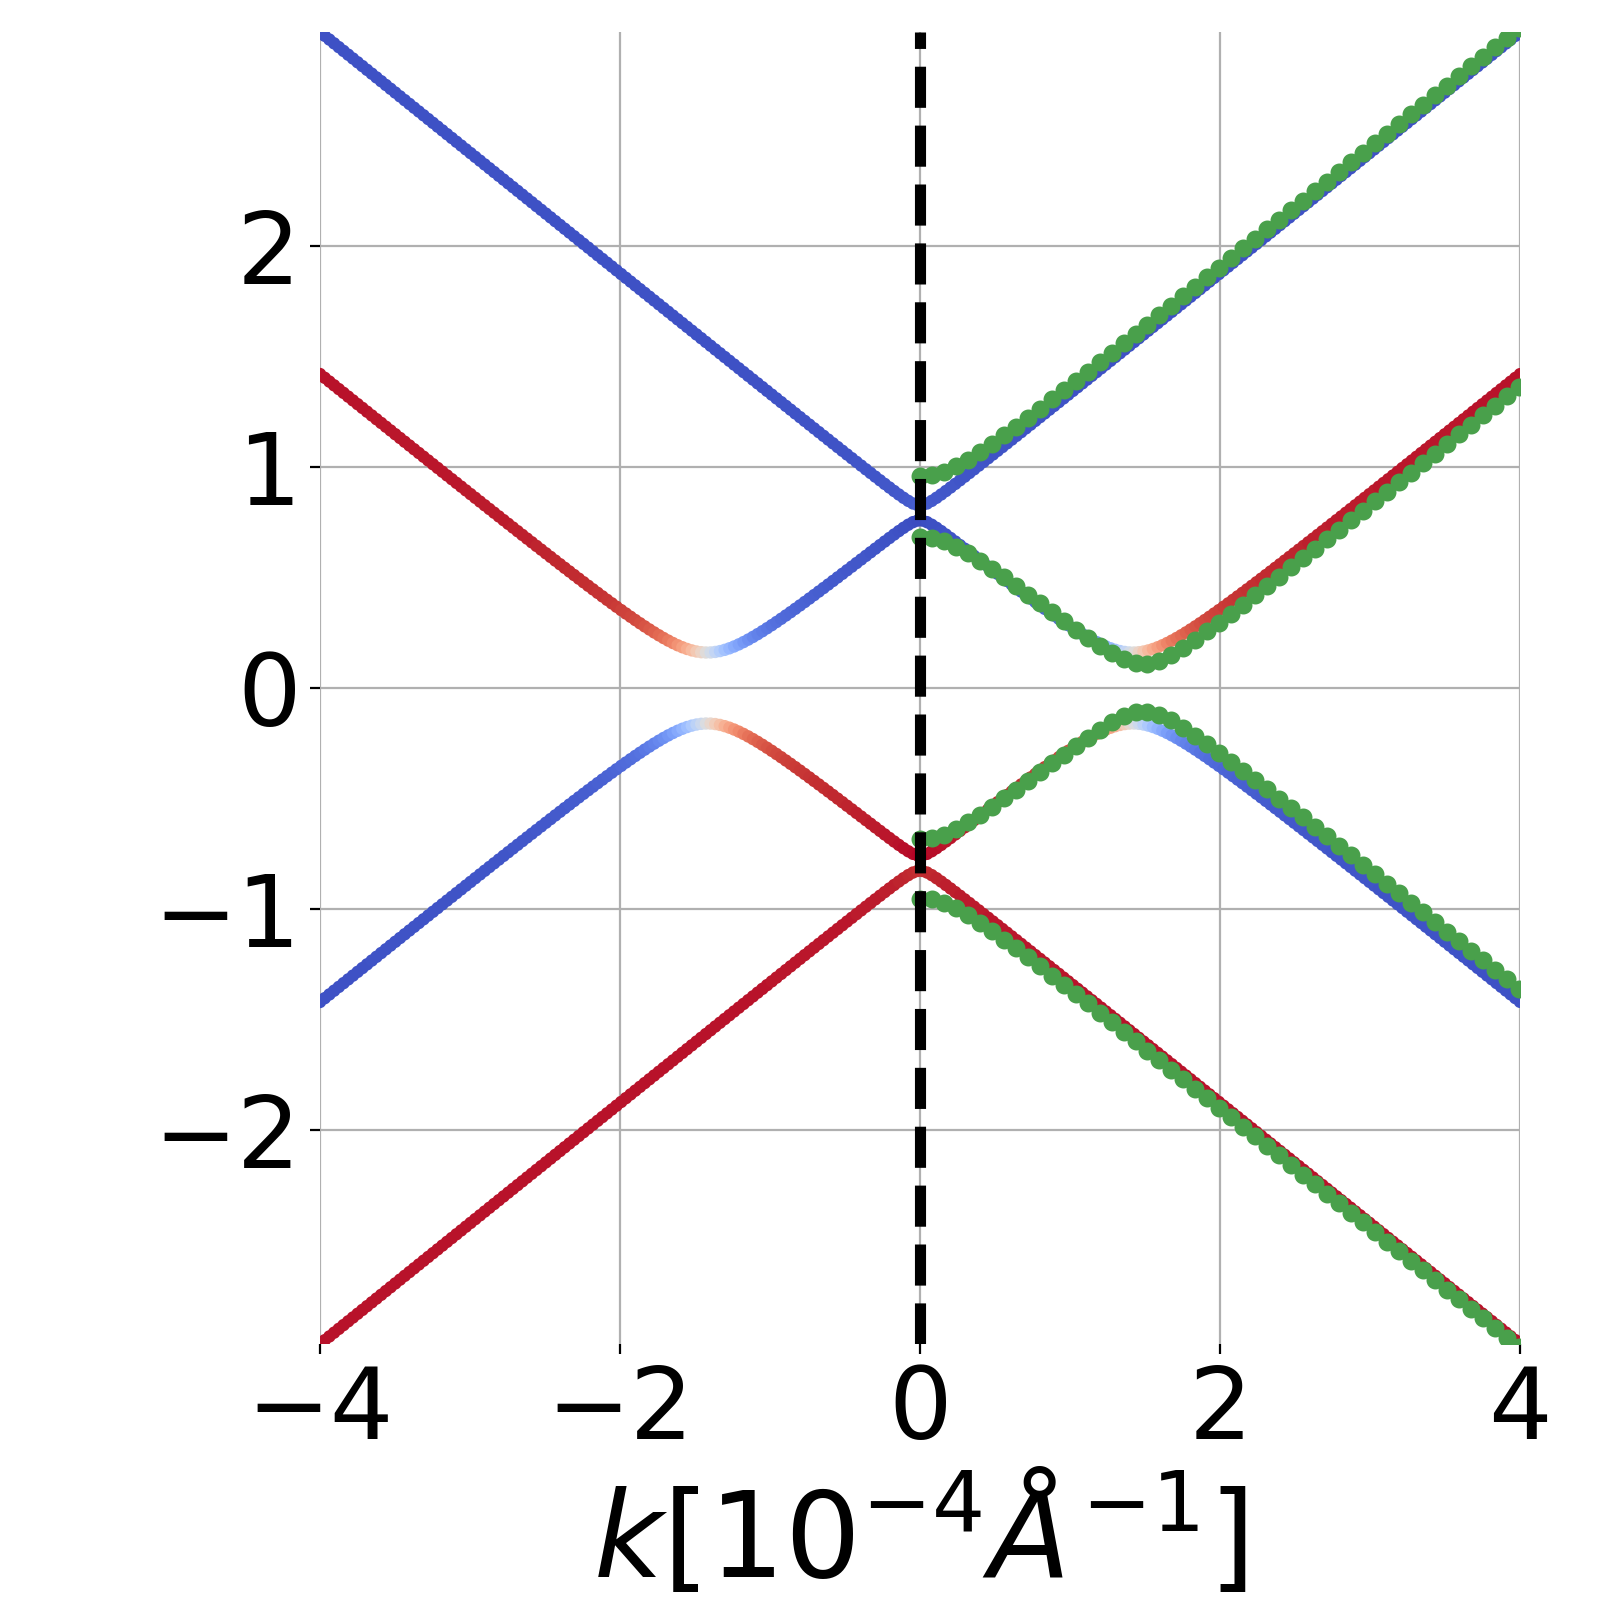

In [133]:
tmp = adjust(
    -d_cs / np.log(0.2), -d_moc / np.log(0.2), d_cs, d_moc, 'WS2-0.2-0.2-1.82-2.2',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]),
    angle = 0.01, cutoffRadius=3., plotRadius=0.0004, onsiteEnergy=1.85, mode='load', 
    axConfig=[0.20, 0.16, 0.75, 0.82], fontsize=36, plot='compare', filename='WS2-0.pdf')

a_t: 3.18
a_g: 2.46
d: 3.41
w:  3.1400000000000006
V_pppi0:  -1.8260946745562128
V_ppsigma0:  6.434809805579038
V_pdpi0:  1.1947467635223203
V_pdsigma0:  -2.069362096599138
d_CX:  1.82
d_CM:  2.2
r_0:  1.1308295808984936
r_0m:  1.3669368560311461
0.0024854526935936486
258


<IPython.core.display.Javascript object>


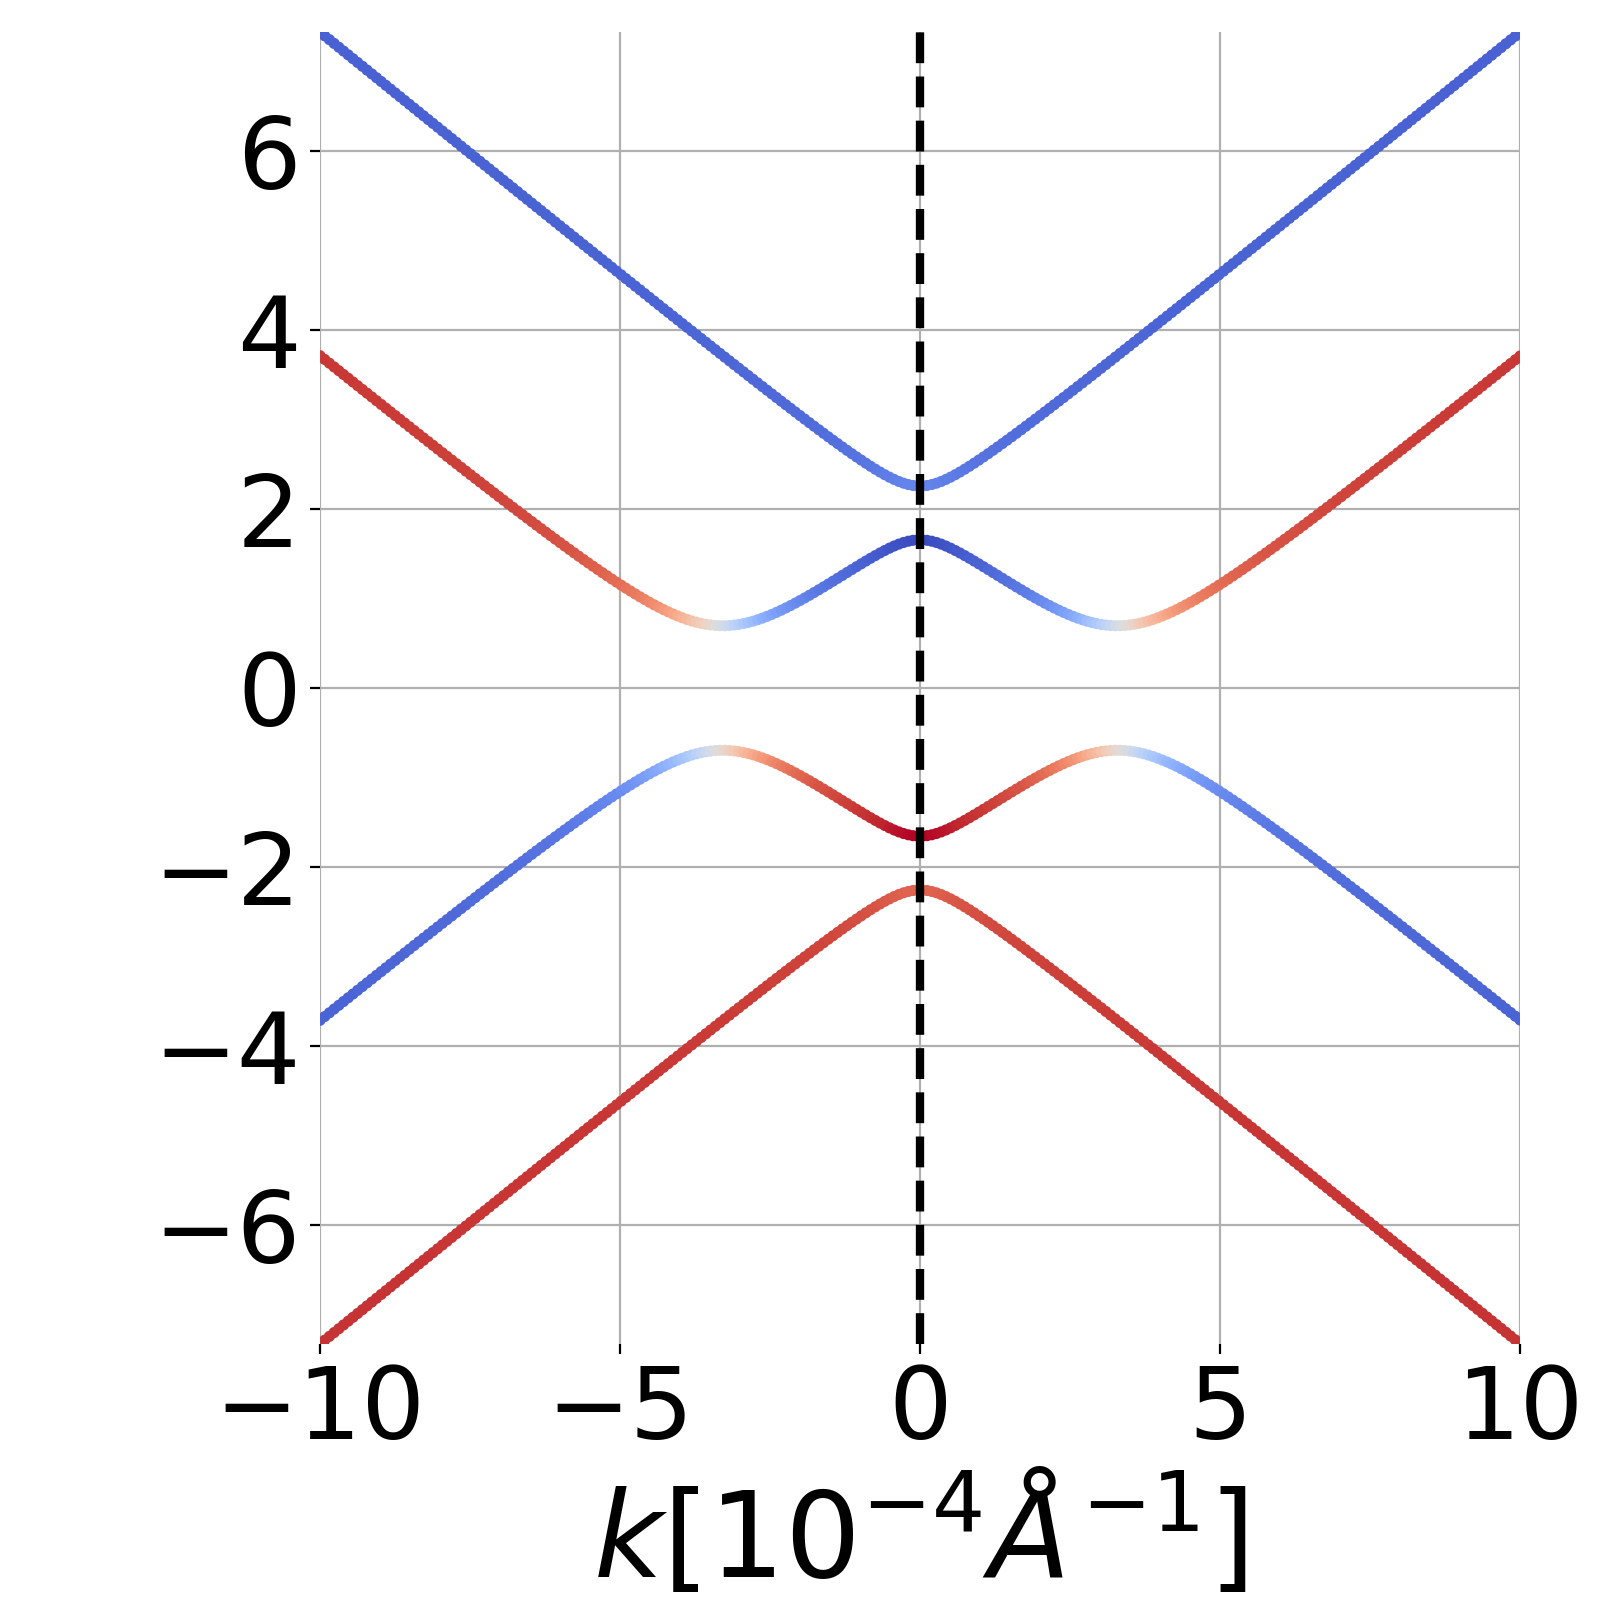

In [134]:
tmp = adjust(
    -d_cs / np.log(0.2), -d_moc / np.log(0.2), d_cs, d_moc, 'WS2-0.2-0.2-1.82-2.2',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]),
    angle = 15, cutoffRadius=3., plotRadius=0.001, onsiteEnergy=1.85, mode='load', 
    axConfig=[0.20, 0.16, 0.75, 0.82], fontsize=36, plot='2d', filename='WS2-15.pdf')

a_t: 3.18
a_g: 2.46
d: 3.41
w:  3.1400000000000006
V_pppi0:  -1.8260946745562128
V_ppsigma0:  6.434809805579038
V_pdpi0:  1.1947467635223203
V_pdsigma0:  -2.069362096599138
d_CX:  1.82
d_CM:  2.2
r_0:  1.1308295808984936
r_0m:  1.3669368560311461
3.512595692300285e-18
258


<IPython.core.display.Javascript object>


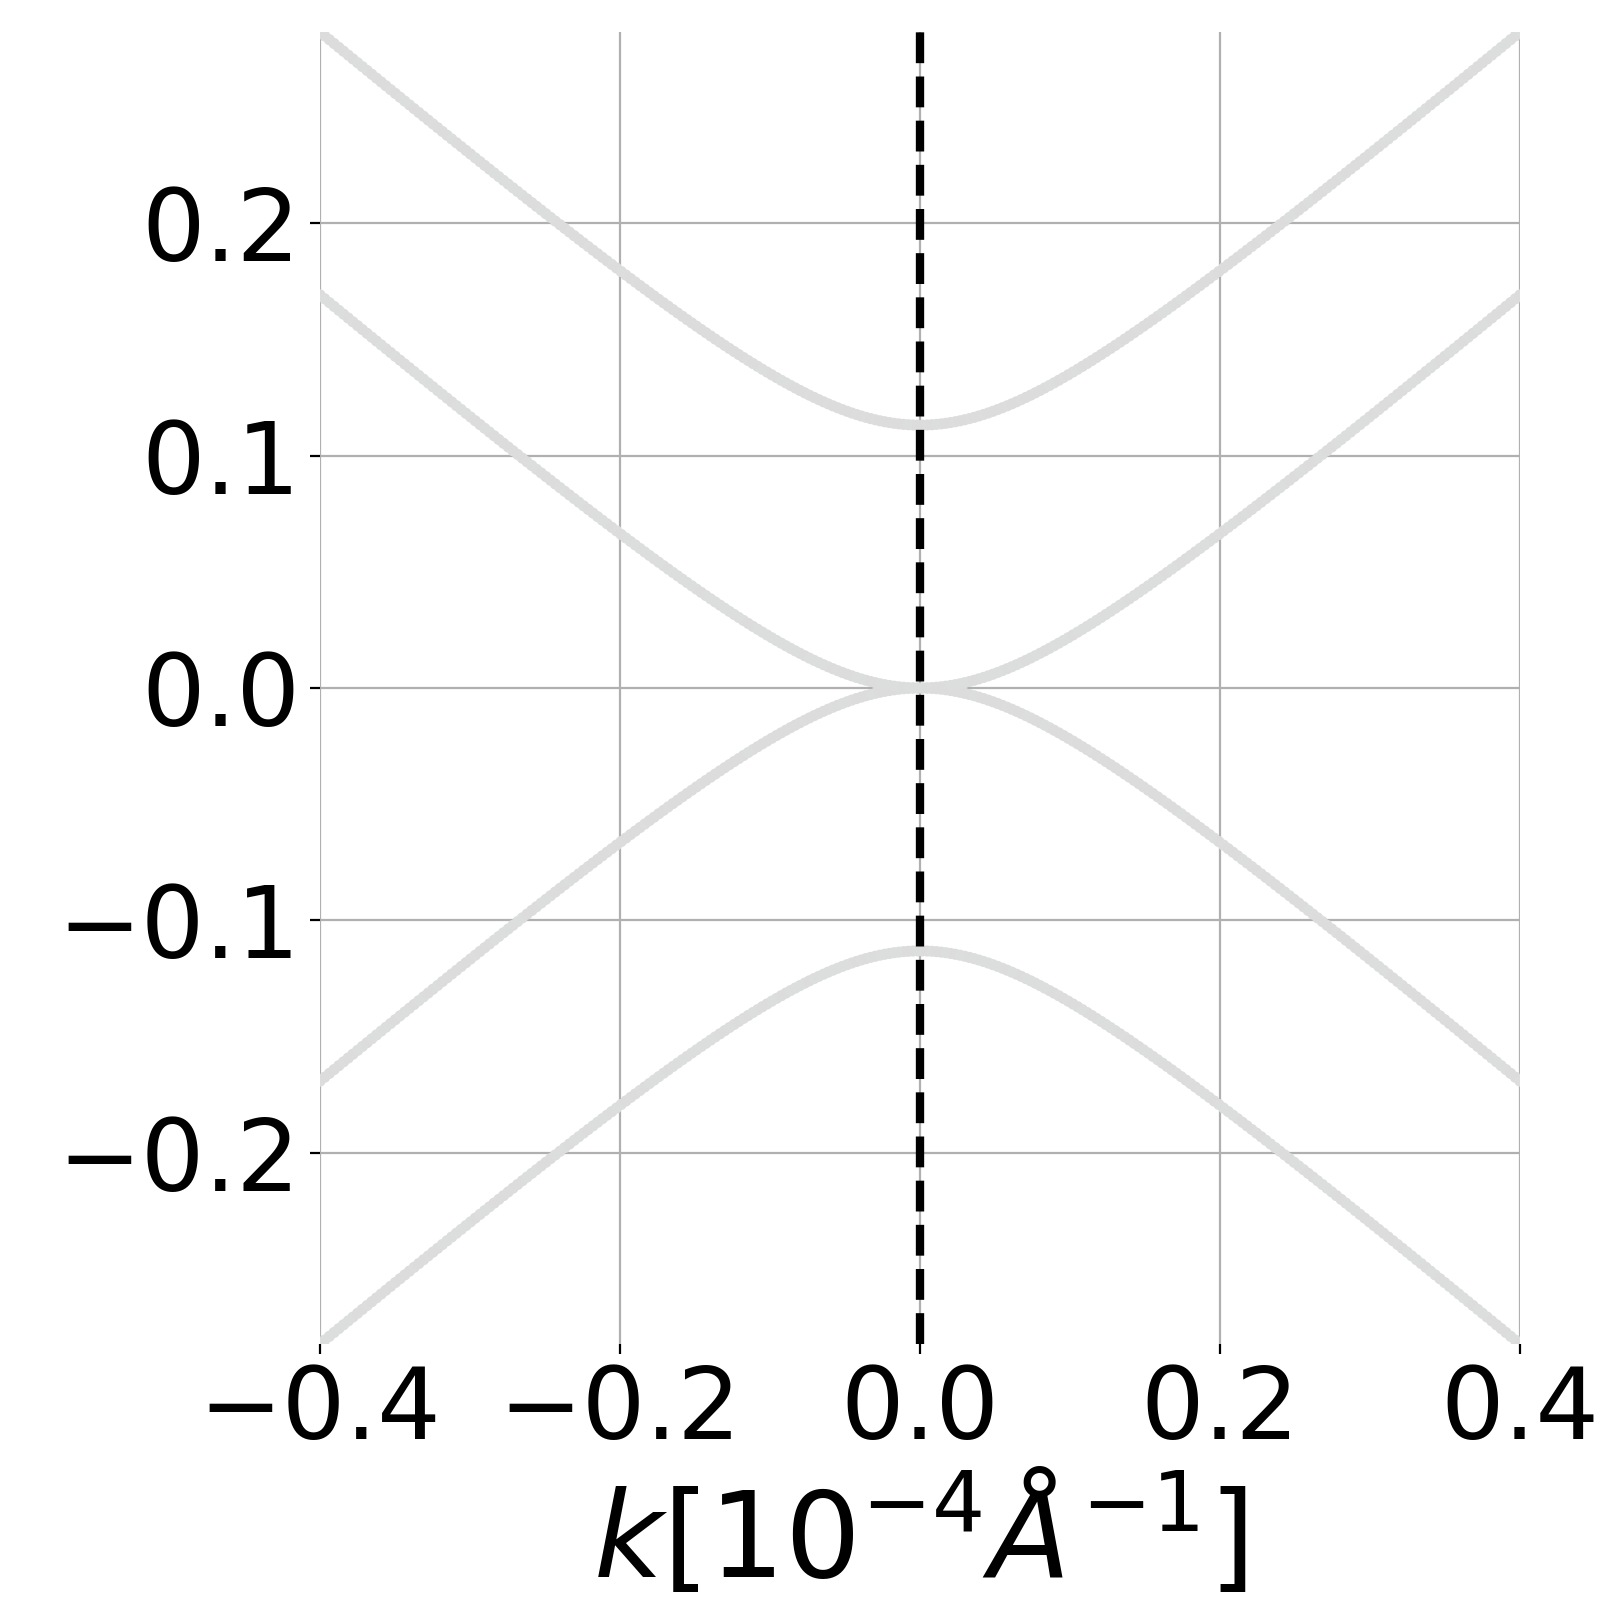

In [132]:
tmp = adjust(
    -d_cs / np.log(0.2), -d_moc / np.log(0.2), d_cs, d_moc, 'WS2-0.2-0.2-1.82-2.2',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]),
    angle = 30, cutoffRadius=3., plotRadius=0.00004, onsiteEnergy=1.85, mode='load', 
    axConfig=[0.20, 0.16, 0.75, 0.82], fontsize=36, plot='2d', filename='WS2-30.pdf')

# MoSe$_2$

a_t: 3.32
a_g: 2.46
d: 3.41
w:  3.34
V_pppi0:  -1.6071729195451168
V_ppsigma0:  5.66337124030184
V_pdpi0:  1.5541670761982123
V_pdsigma0:  -2.691896339426075
d_CX:  1.94
d_CM:  2.06
r_0:  1.2053897730456469
r_0m:  1.2799499651928004


<IPython.core.display.Javascript object>


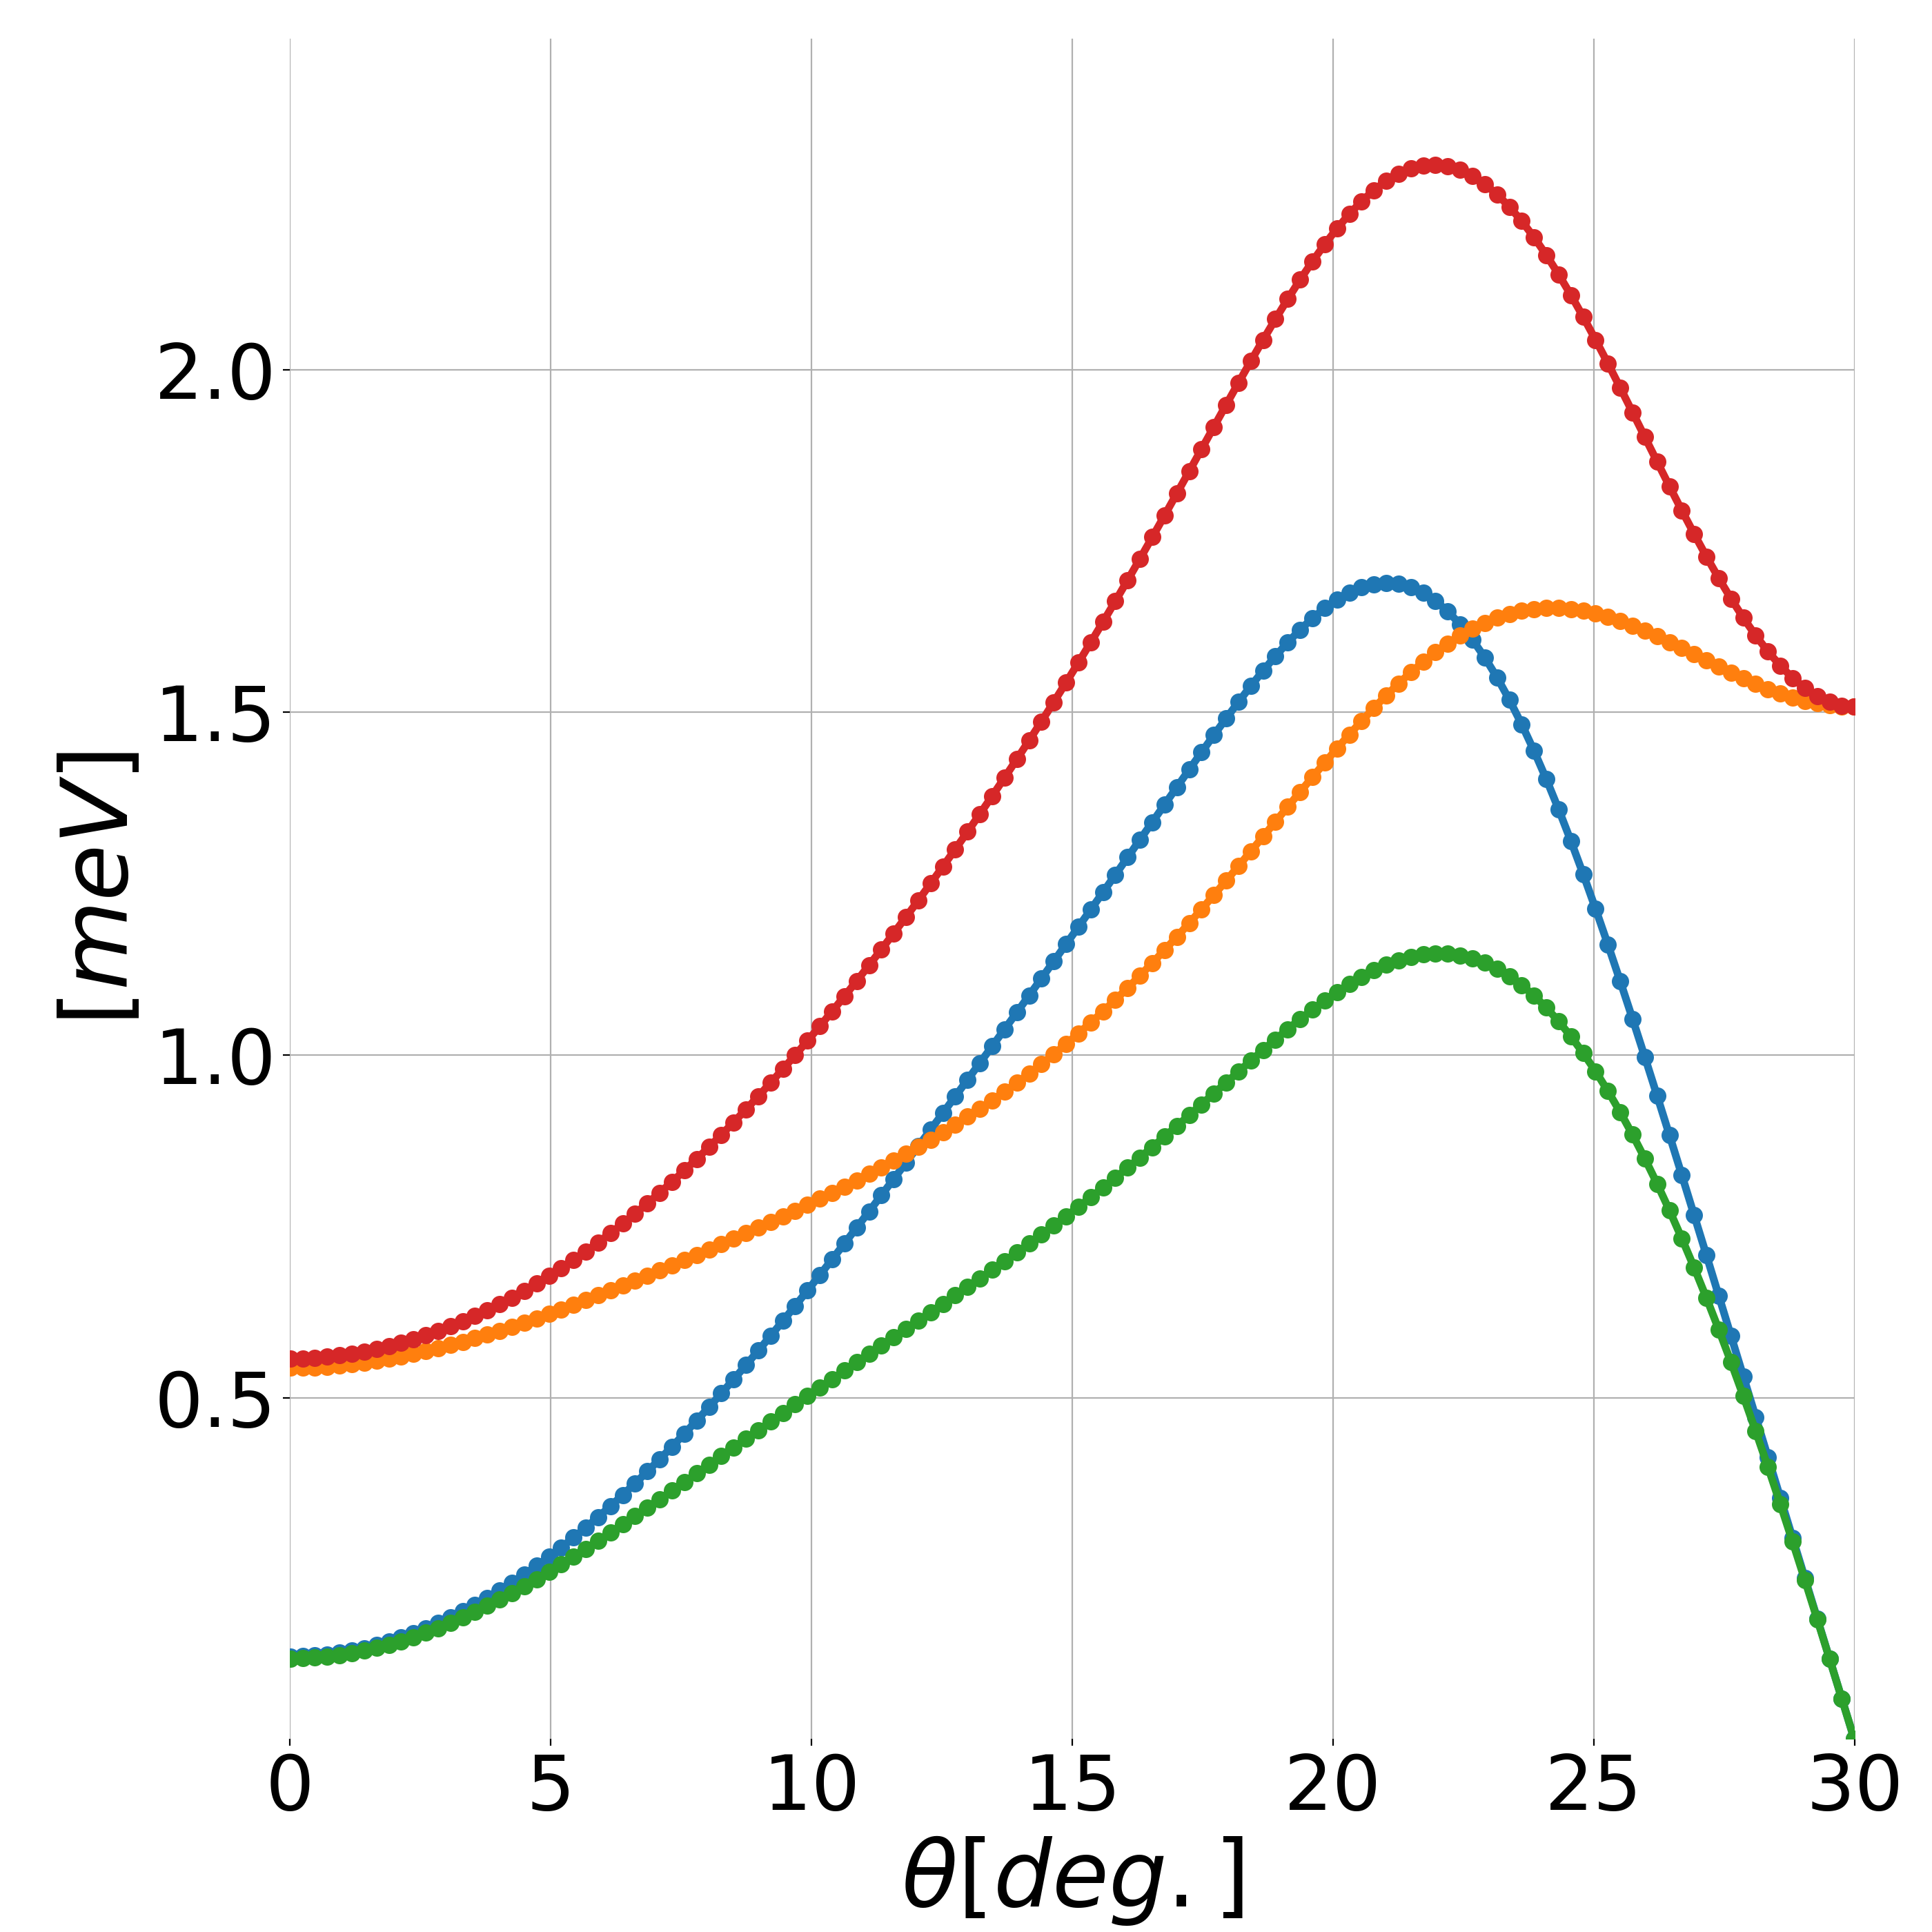

In [179]:
tmp = adjust(
    -d_cs / np.log(0.2), -d_moc / np.log(0.2), d_cs, d_moc, 'MoSe2-0.2-0.2-1.94-2.059',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]),
    pSign=1. * np.array([-1, 1, 1, -1, 1, 1]),
    latticeConstant=[at, ag],
    angle = 0.01, cutoffRadius=3., plotRadius=0.0002, onsiteEnergy=0.9, mode='load', 
    axConfig=[0.15, 0.1, 0.81, 0.88], plot='angle', filename='MoSe2-angle0.pdf')

a_t: 3.32
a_g: 2.46
d: 3.41
w:  3.34
V_pppi0:  -1.6071729195451168
V_ppsigma0:  5.66337124030184
V_pdpi0:  1.5541670761982123
V_pdsigma0:  -2.691896339426075
d_CX:  1.94
d_CM:  2.06
r_0:  1.2053897730456469
r_0m:  1.2799499651928004
9.198636314734429e-05
258


<IPython.core.display.Javascript object>


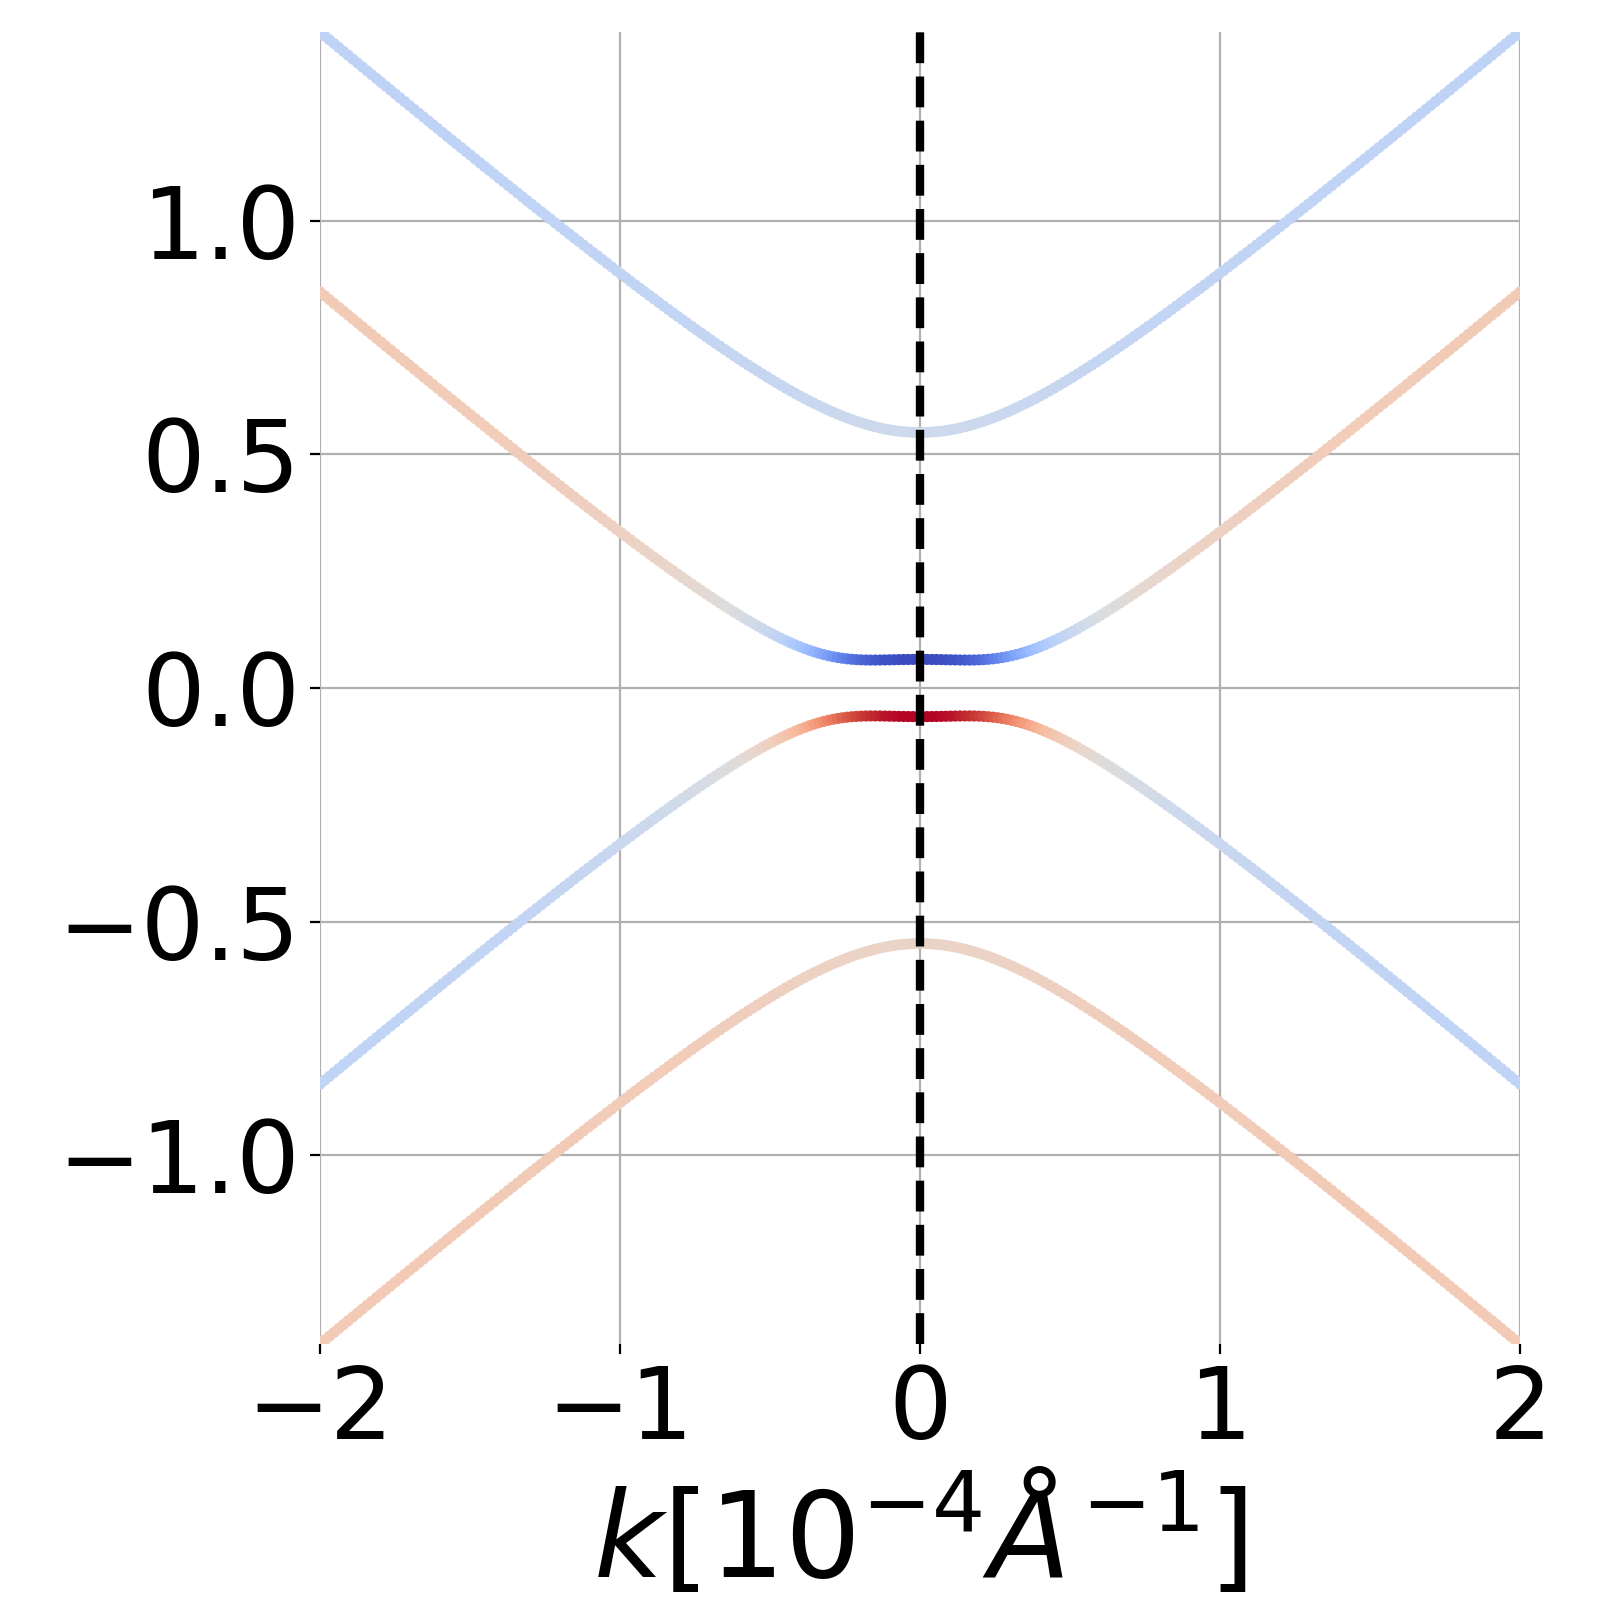

In [137]:
tmp = adjust(
    -d_cs / np.log(0.2), -d_moc / np.log(0.2), d_cs, d_moc, 'MoSe2-0.2-0.2-1.94-2.059',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]),
    pSign=1. * np.array([-1, 1, 1, -1, 1, 1]),
    latticeConstant=[at, ag],
    angle = 0.01, cutoffRadius=3., plotRadius=0.0002, onsiteEnergy=0.9, mode='load', 
    axConfig=[0.20, 0.16, 0.75, 0.82], fontsize=36, plot='2d', filename='MoSe2-0.pdf')

a_t: 3.32
a_g: 2.46
d: 3.41
w:  3.34
V_pppi0:  -1.6071729195451168
V_ppsigma0:  5.66337124030184
V_pdpi0:  1.5541670761982123
V_pdsigma0:  -2.691896339426075
d_CX:  1.94
d_CM:  2.06
r_0:  1.2053897730456469
r_0m:  1.2799499651928004
0.0008808054664202133
258


<IPython.core.display.Javascript object>


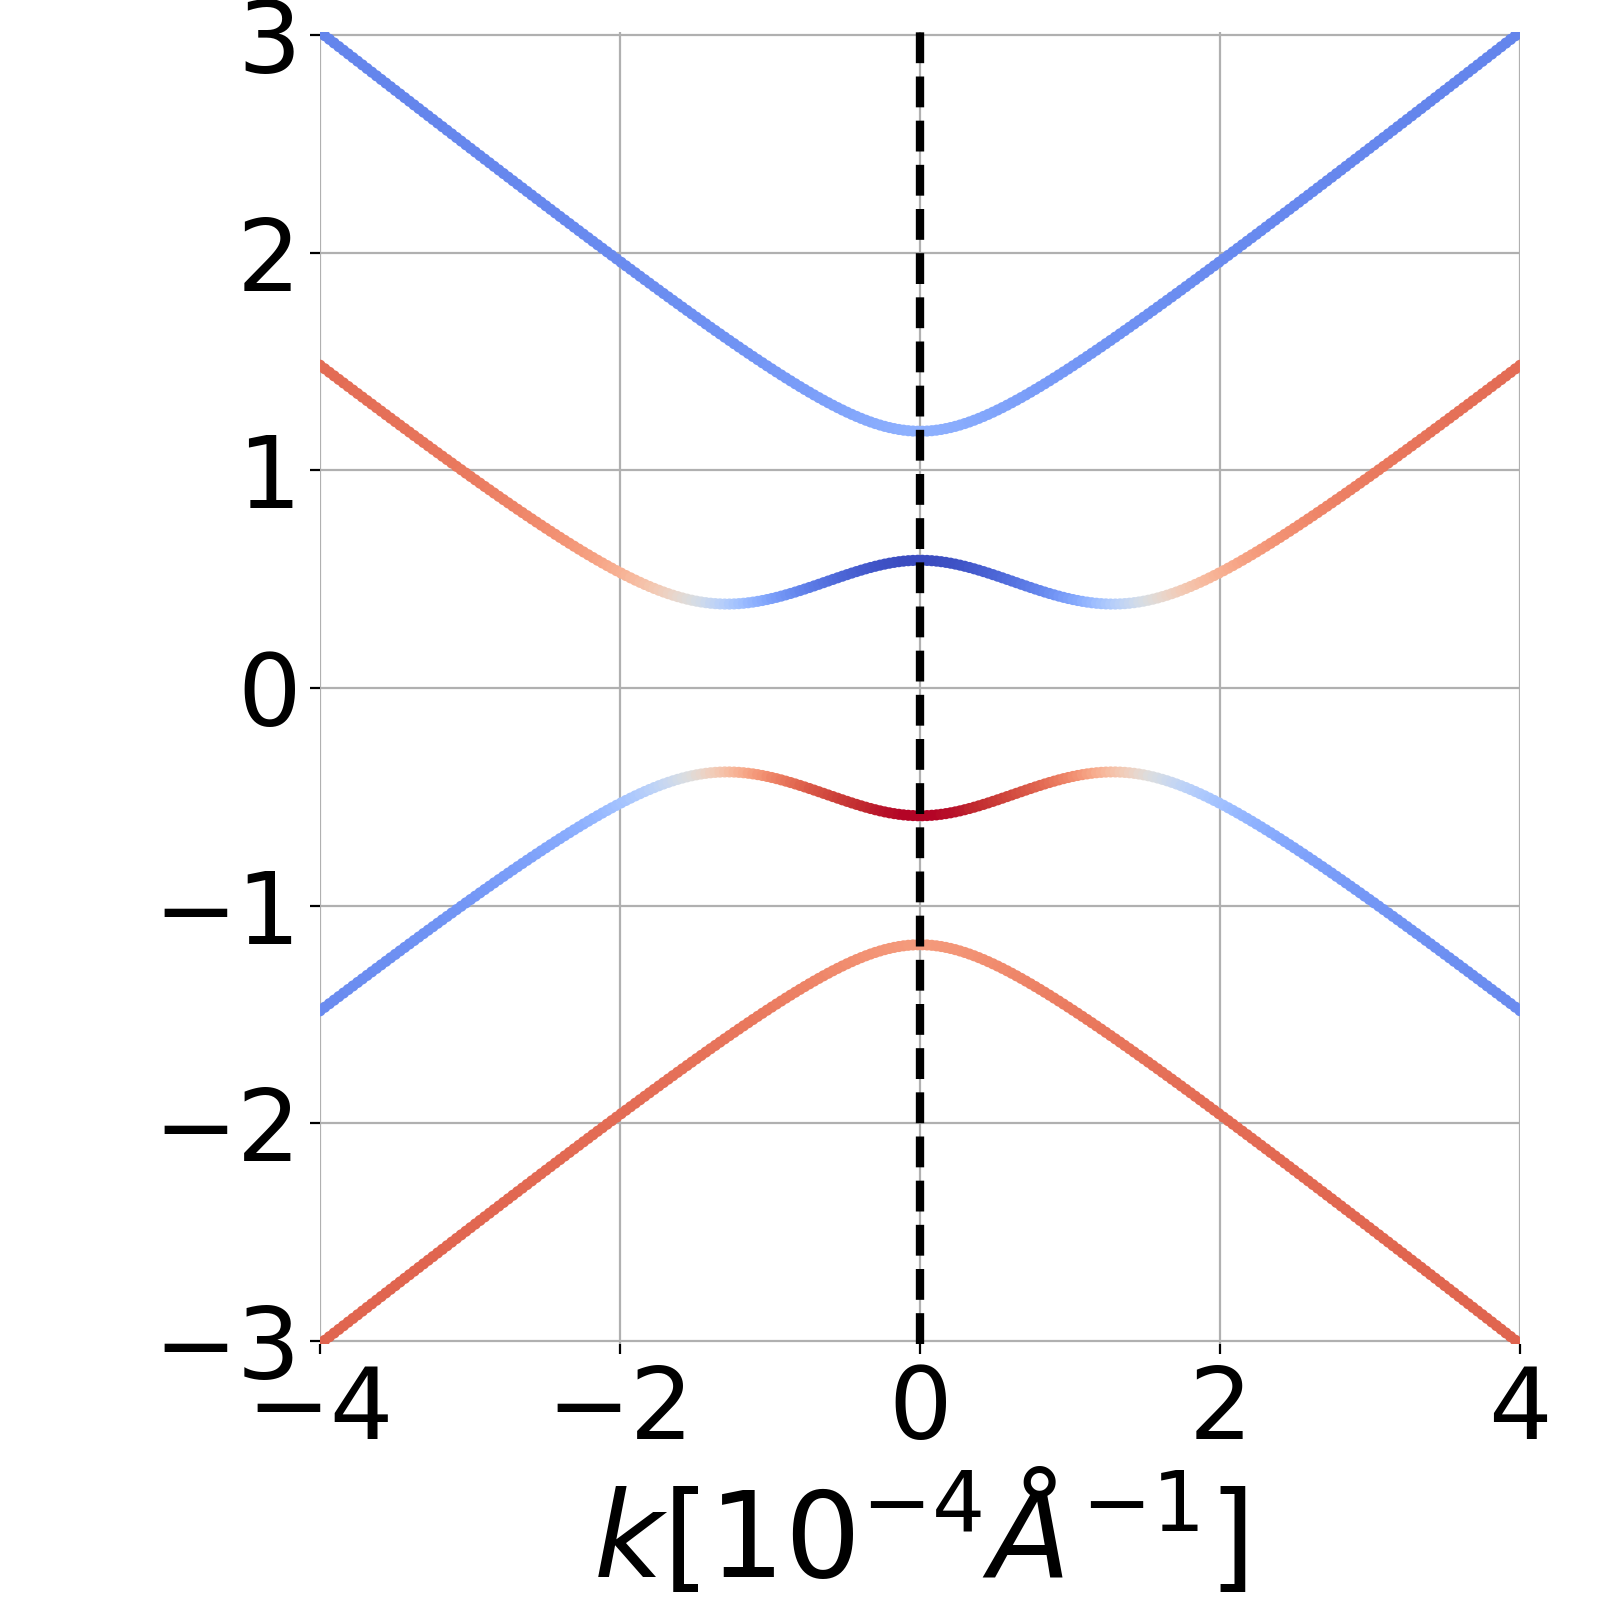

In [138]:
tmp = adjust(
    -d_cs / np.log(0.2), -d_moc / np.log(0.2), d_cs, d_moc, 'MoSe2-0.2-0.2-1.94-2.059',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]),
    pSign=1. * np.array([-1, 1, 1, -1, 1, 1]),
    latticeConstant=[at, ag],
    angle = 15, cutoffRadius=3., plotRadius=0.0004, onsiteEnergy=0.9, mode='load', 
    axConfig=[0.20, 0.16, 0.75, 0.82], fontsize=36, plot='2d', filename='MoSe2-15.pdf')

a_t: 3.32
a_g: 2.46
d: 3.41
w:  3.34
V_pppi0:  -1.6071729195451168
V_ppsigma0:  5.66337124030184
V_pdpi0:  1.5541670761982123
V_pdsigma0:  -2.691896339426075
d_CX:  1.94
d_CM:  2.06
r_0:  1.2053897730456469
r_0m:  1.2799499651928004
1.417431830550519e-17
258


<IPython.core.display.Javascript object>


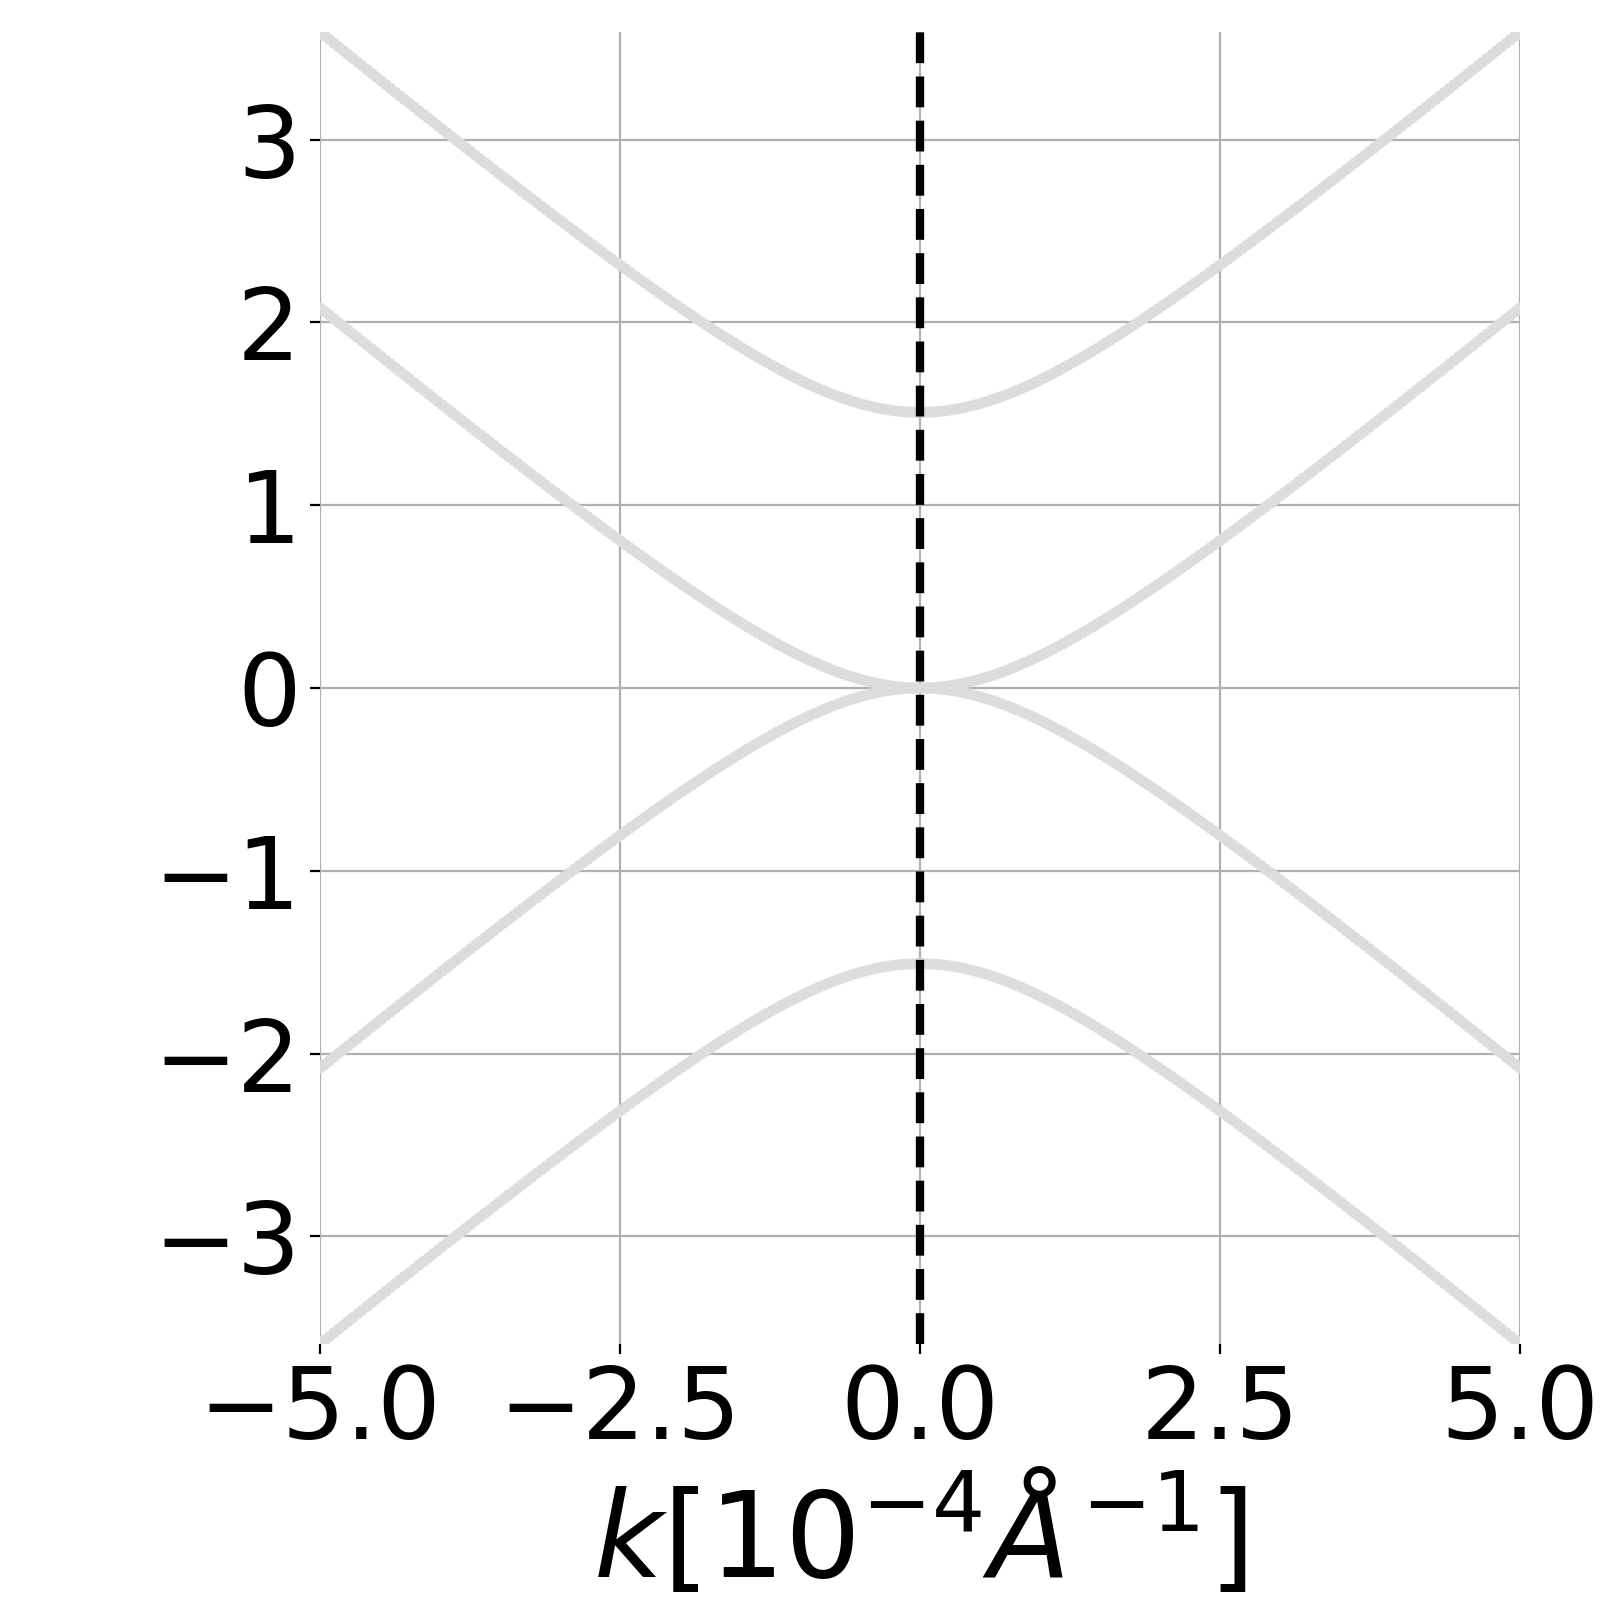

In [139]:
tmp = adjust(
    -d_cs / np.log(0.2), -d_moc / np.log(0.2), d_cs, d_moc, 'MoSe2-0.2-0.2-1.94-2.059',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]),
    pSign=1. * np.array([-1, 1, 1, -1, 1, 1]),
    latticeConstant=[at, ag],
    angle = 30, cutoffRadius=3., plotRadius=0.0005, onsiteEnergy=0.9, mode='load', 
    axConfig=[0.20, 0.16, 0.75, 0.82], fontsize=36, plot='2d', filename='MoSe2-30.pdf')

# WSe$_2$

a_t: 3.32
a_g: 2.46
d: 3.42
w:  3.3499999999999996
V_pppi0:  -1.6071729195451168
V_ppsigma0:  5.66337124030184
V_pdpi0:  1.1947467635223203
V_pdsigma0:  -2.069362096599138
d_CX:  1.94
d_CM:  2.2
r_0:  1.2053897730456469
r_0m:  1.3669368560311461


<IPython.core.display.Javascript object>


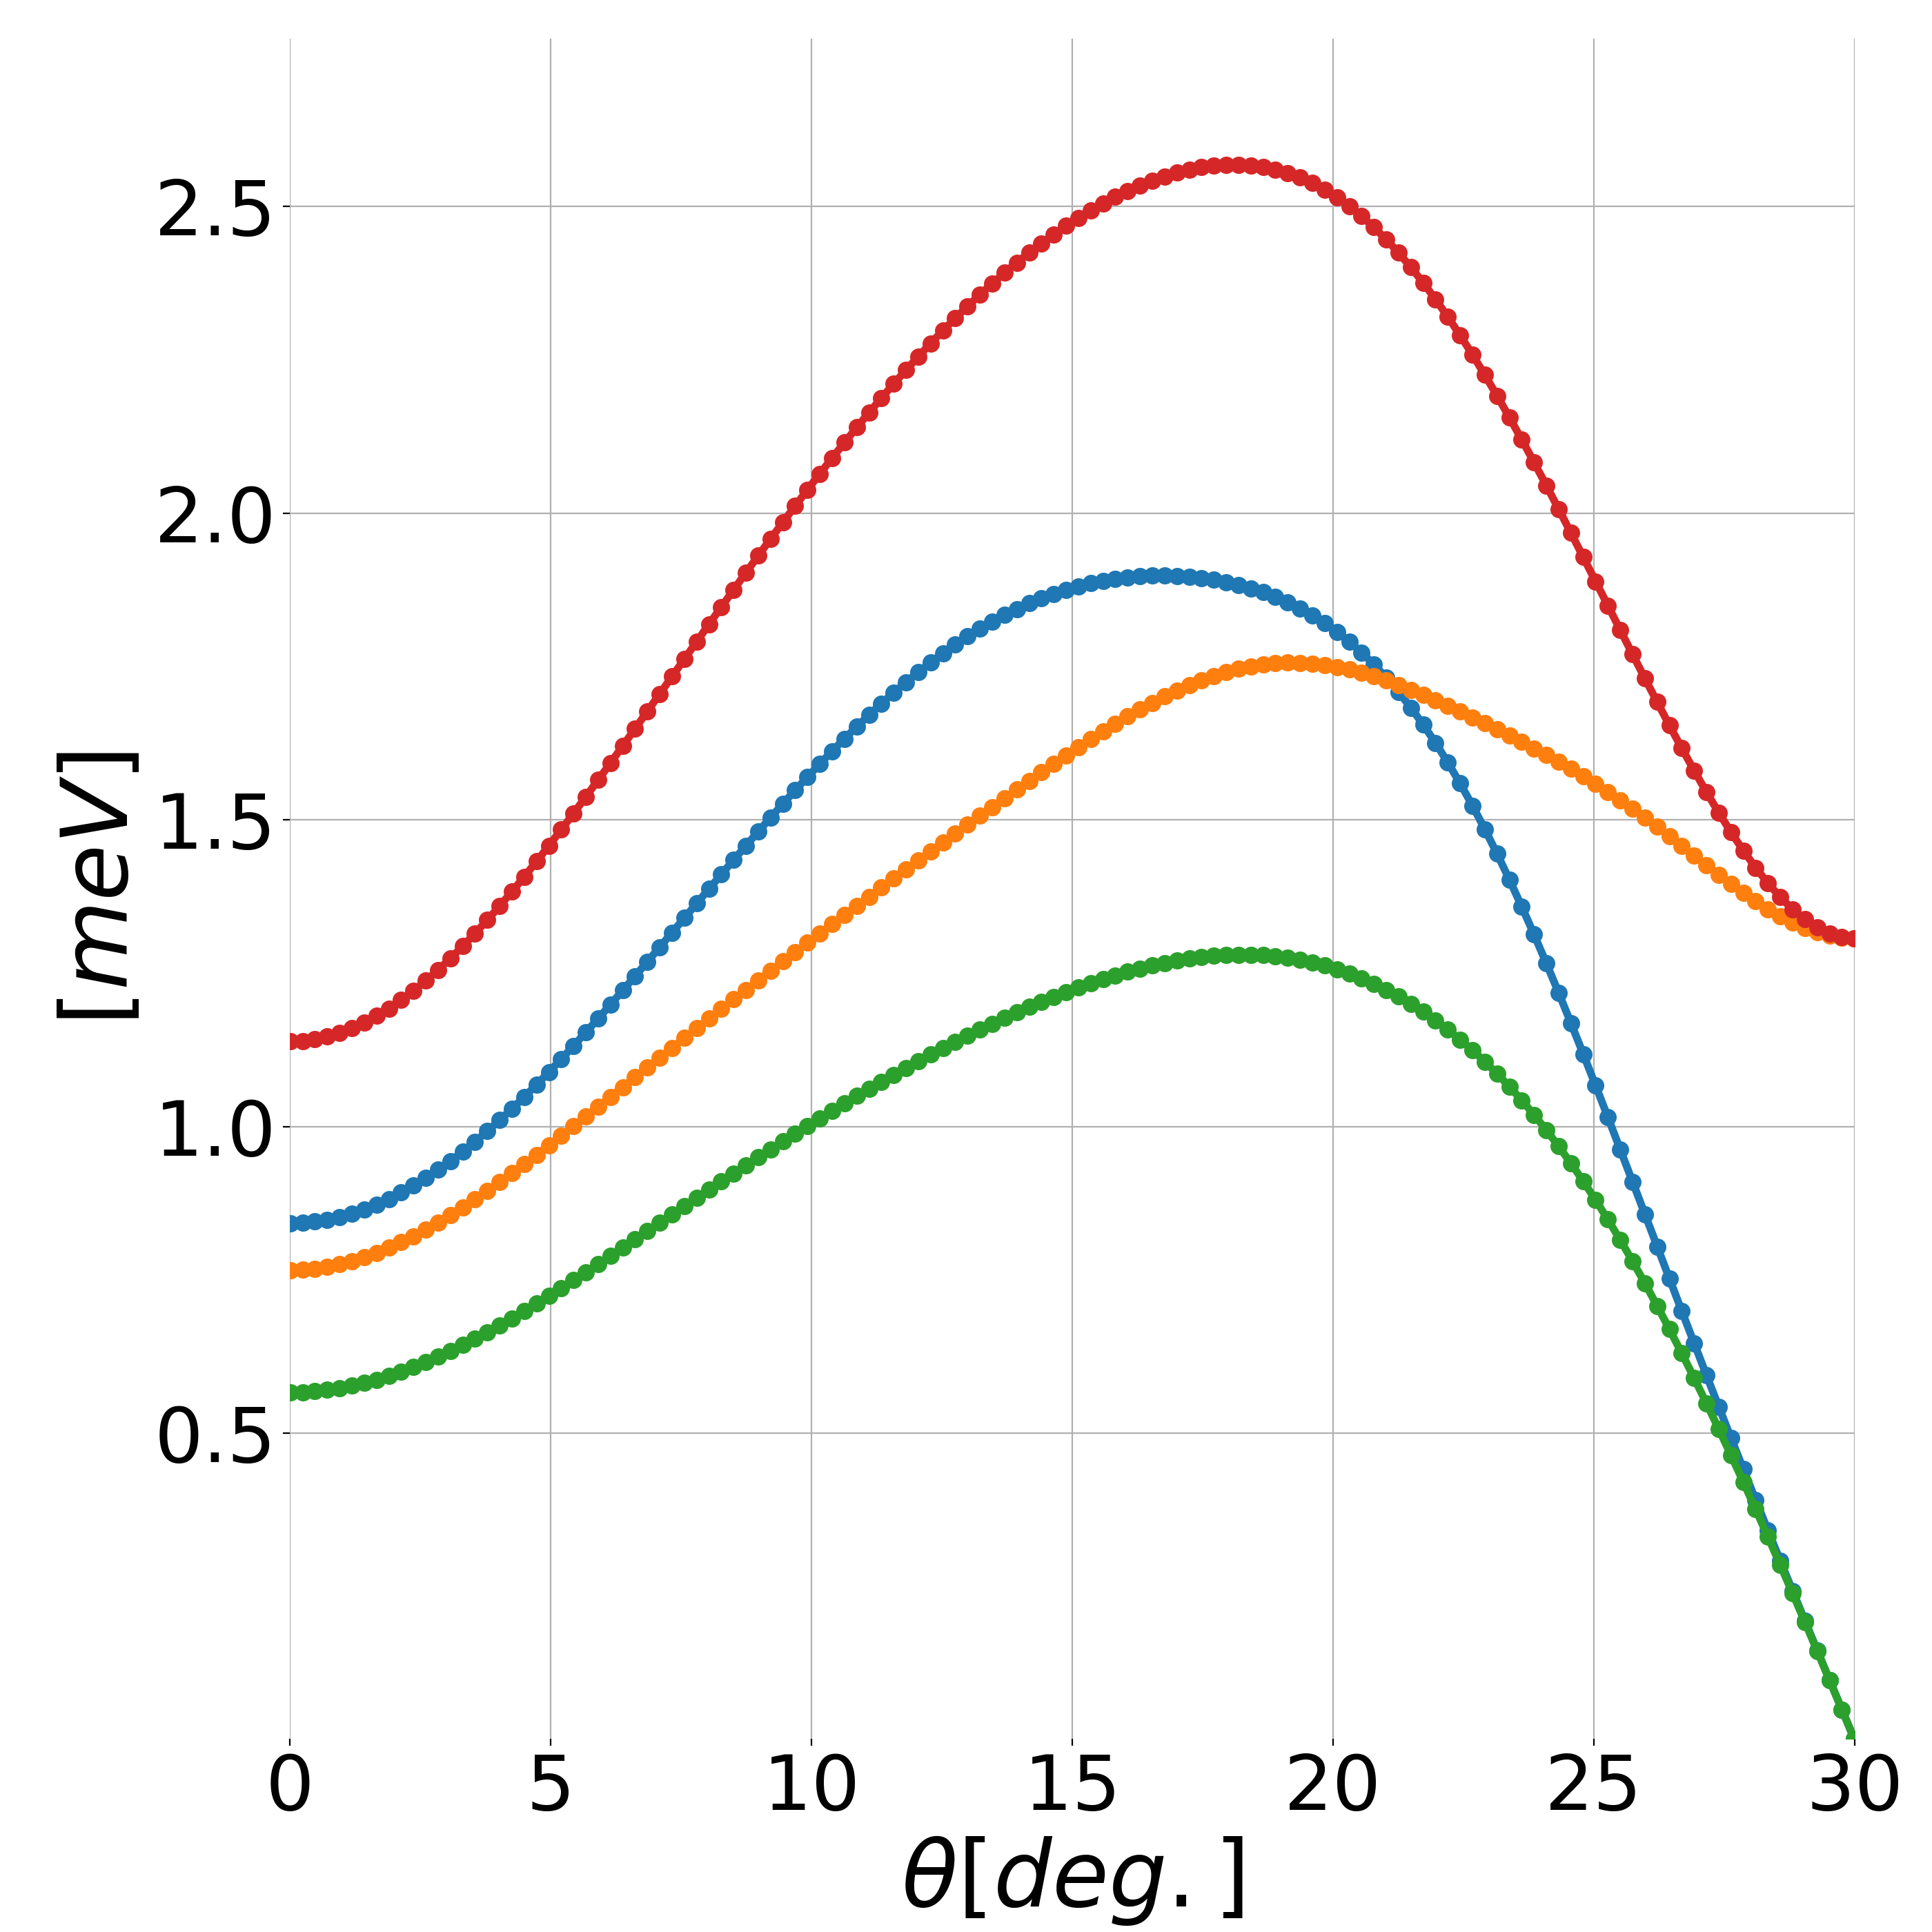

In [182]:
tmp = adjust(
    -d_cs / np.log(0.2), -d_moc / np.log(0.2), d_cs, d_moc, 'WSe2-0.2-0.2-1.94-2.2',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]),
    pSign=1. * np.array([-1, 1, 1, -1, 1, 1]),
    angle = 0.01, cutoffRadius=3., plotRadius=0.0002, onsiteEnergy=.6, mode='load', 
    axConfig=[0.15, 0.1, 0.81, 0.88], plot='angle', filename='WSe2-angle.pdf')

a_t: 3.32
a_g: 2.46
d: 3.42
w:  3.3499999999999996
V_pppi0:  -1.6071729195451168
V_ppsigma0:  5.66337124030184
V_pdpi0:  1.1947467635223203
V_pdsigma0:  -2.069362096599138
d_CX:  1.94
d_CM:  2.2
r_0:  1.2053897730456469
r_0m:  1.3669368560311461
0.0006319718132007032
258


<IPython.core.display.Javascript object>


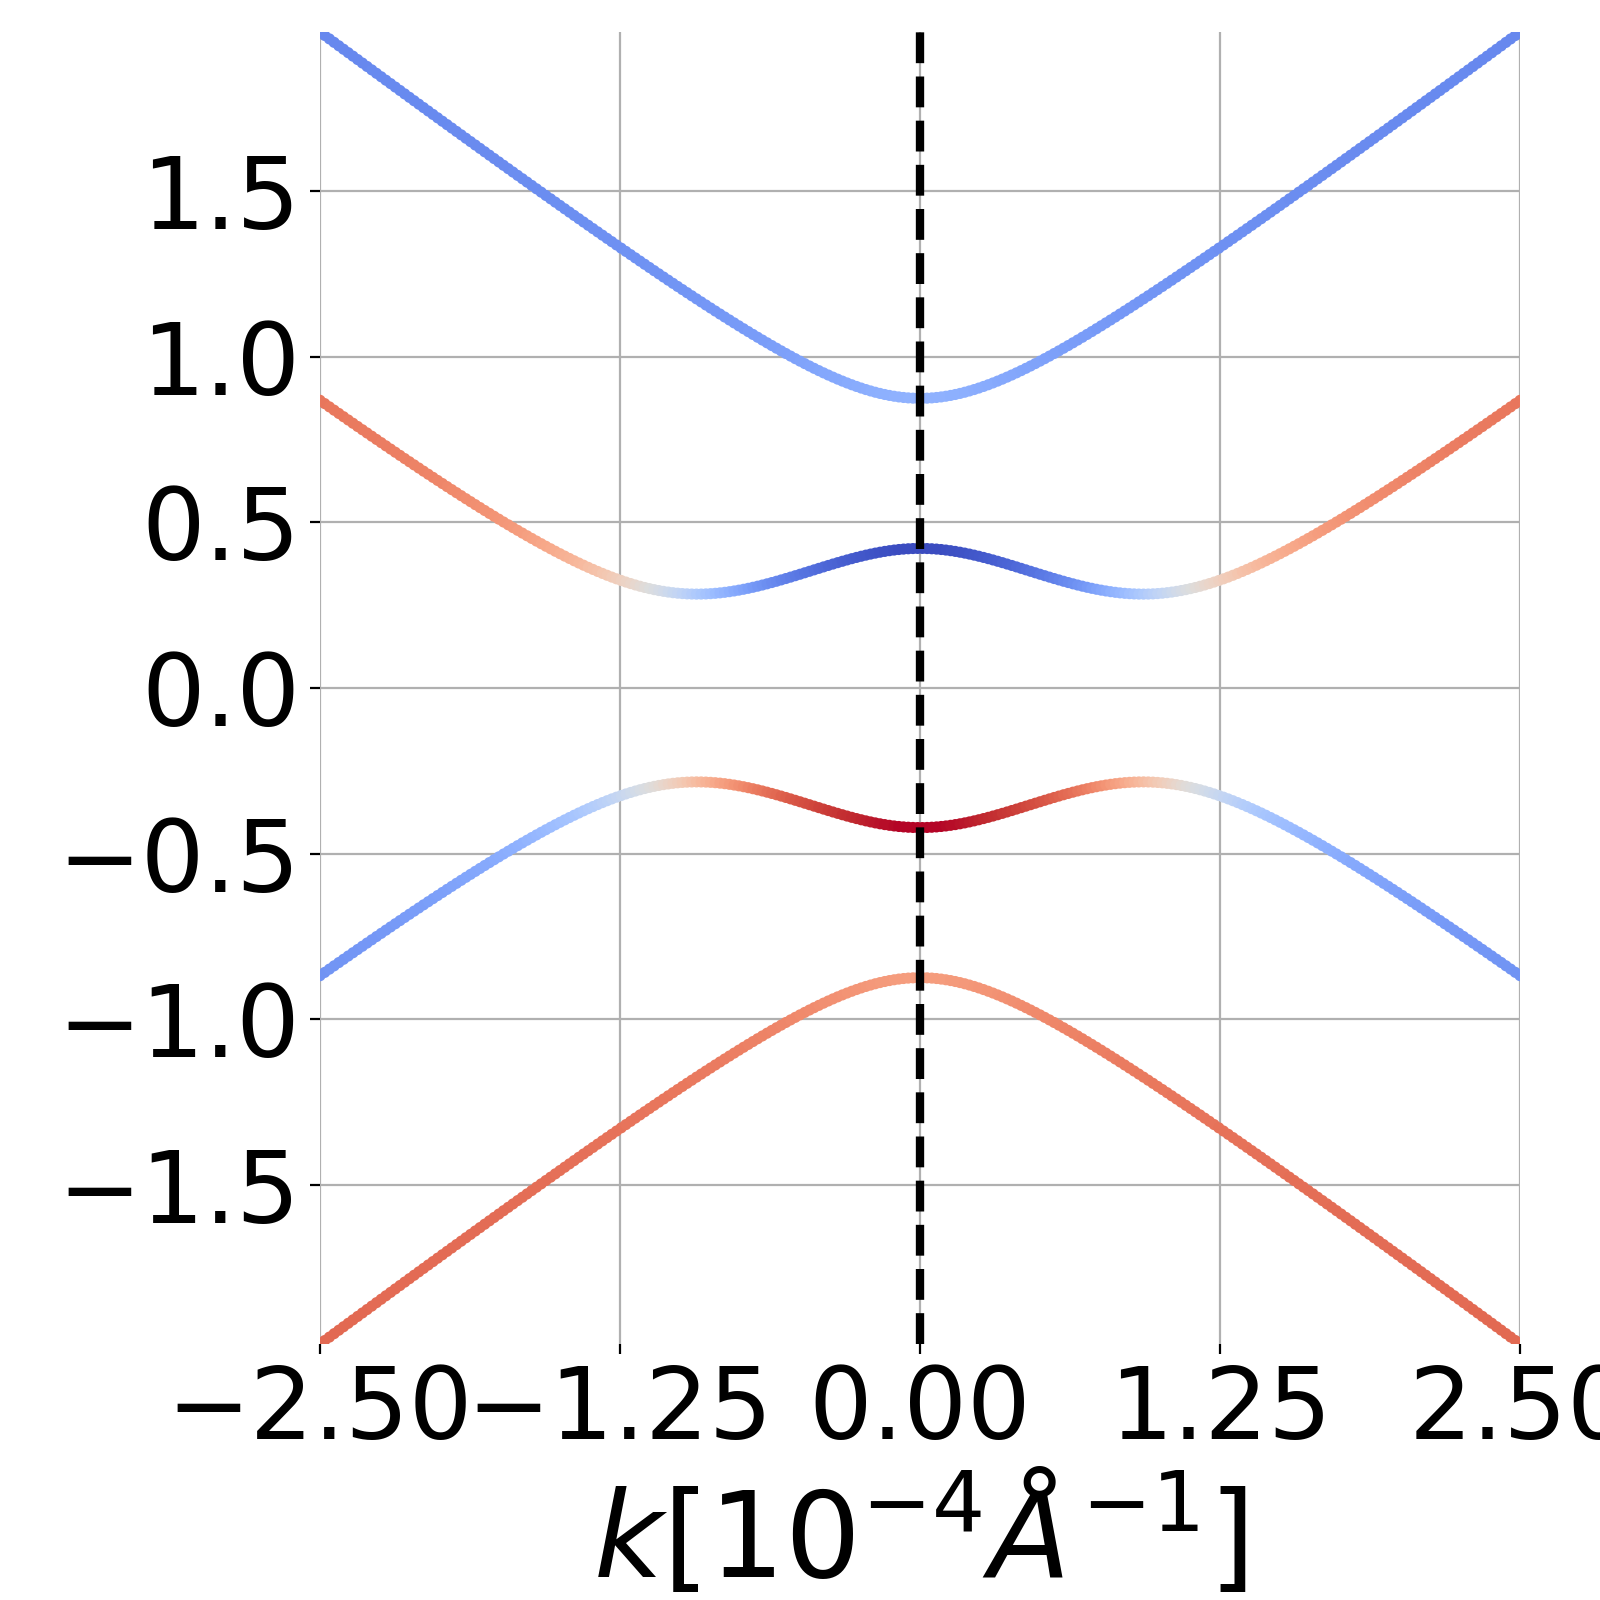

In [146]:
tmp = adjust(
    -d_cs / np.log(0.2), -d_moc / np.log(0.2), d_cs, d_moc, 'WSe2-0.2-0.2-1.94-2.2',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]),
    pSign=1. * np.array([-1, 1, 1, -1, 1, 1]),
    angle = 0.01, cutoffRadius=3., plotRadius=0.00025, onsiteEnergy=.6, mode='load', 
    axConfig=[0.20, 0.16, 0.75, 0.82], fontsize=36, plot='2d', filename='WSe2-0.pdf')

a_t: 3.32
a_g: 2.46
d: 3.42
w:  3.3499999999999996
V_pppi0:  -1.6071729195451168
V_ppsigma0:  5.66337124030184
V_pdpi0:  1.1947467635223203
V_pdsigma0:  -2.069362096599138
d_CX:  1.94
d_CM:  2.2
r_0:  1.2053897730456469
r_0m:  1.3669368560311461
0.0014085794260685451
258


<IPython.core.display.Javascript object>


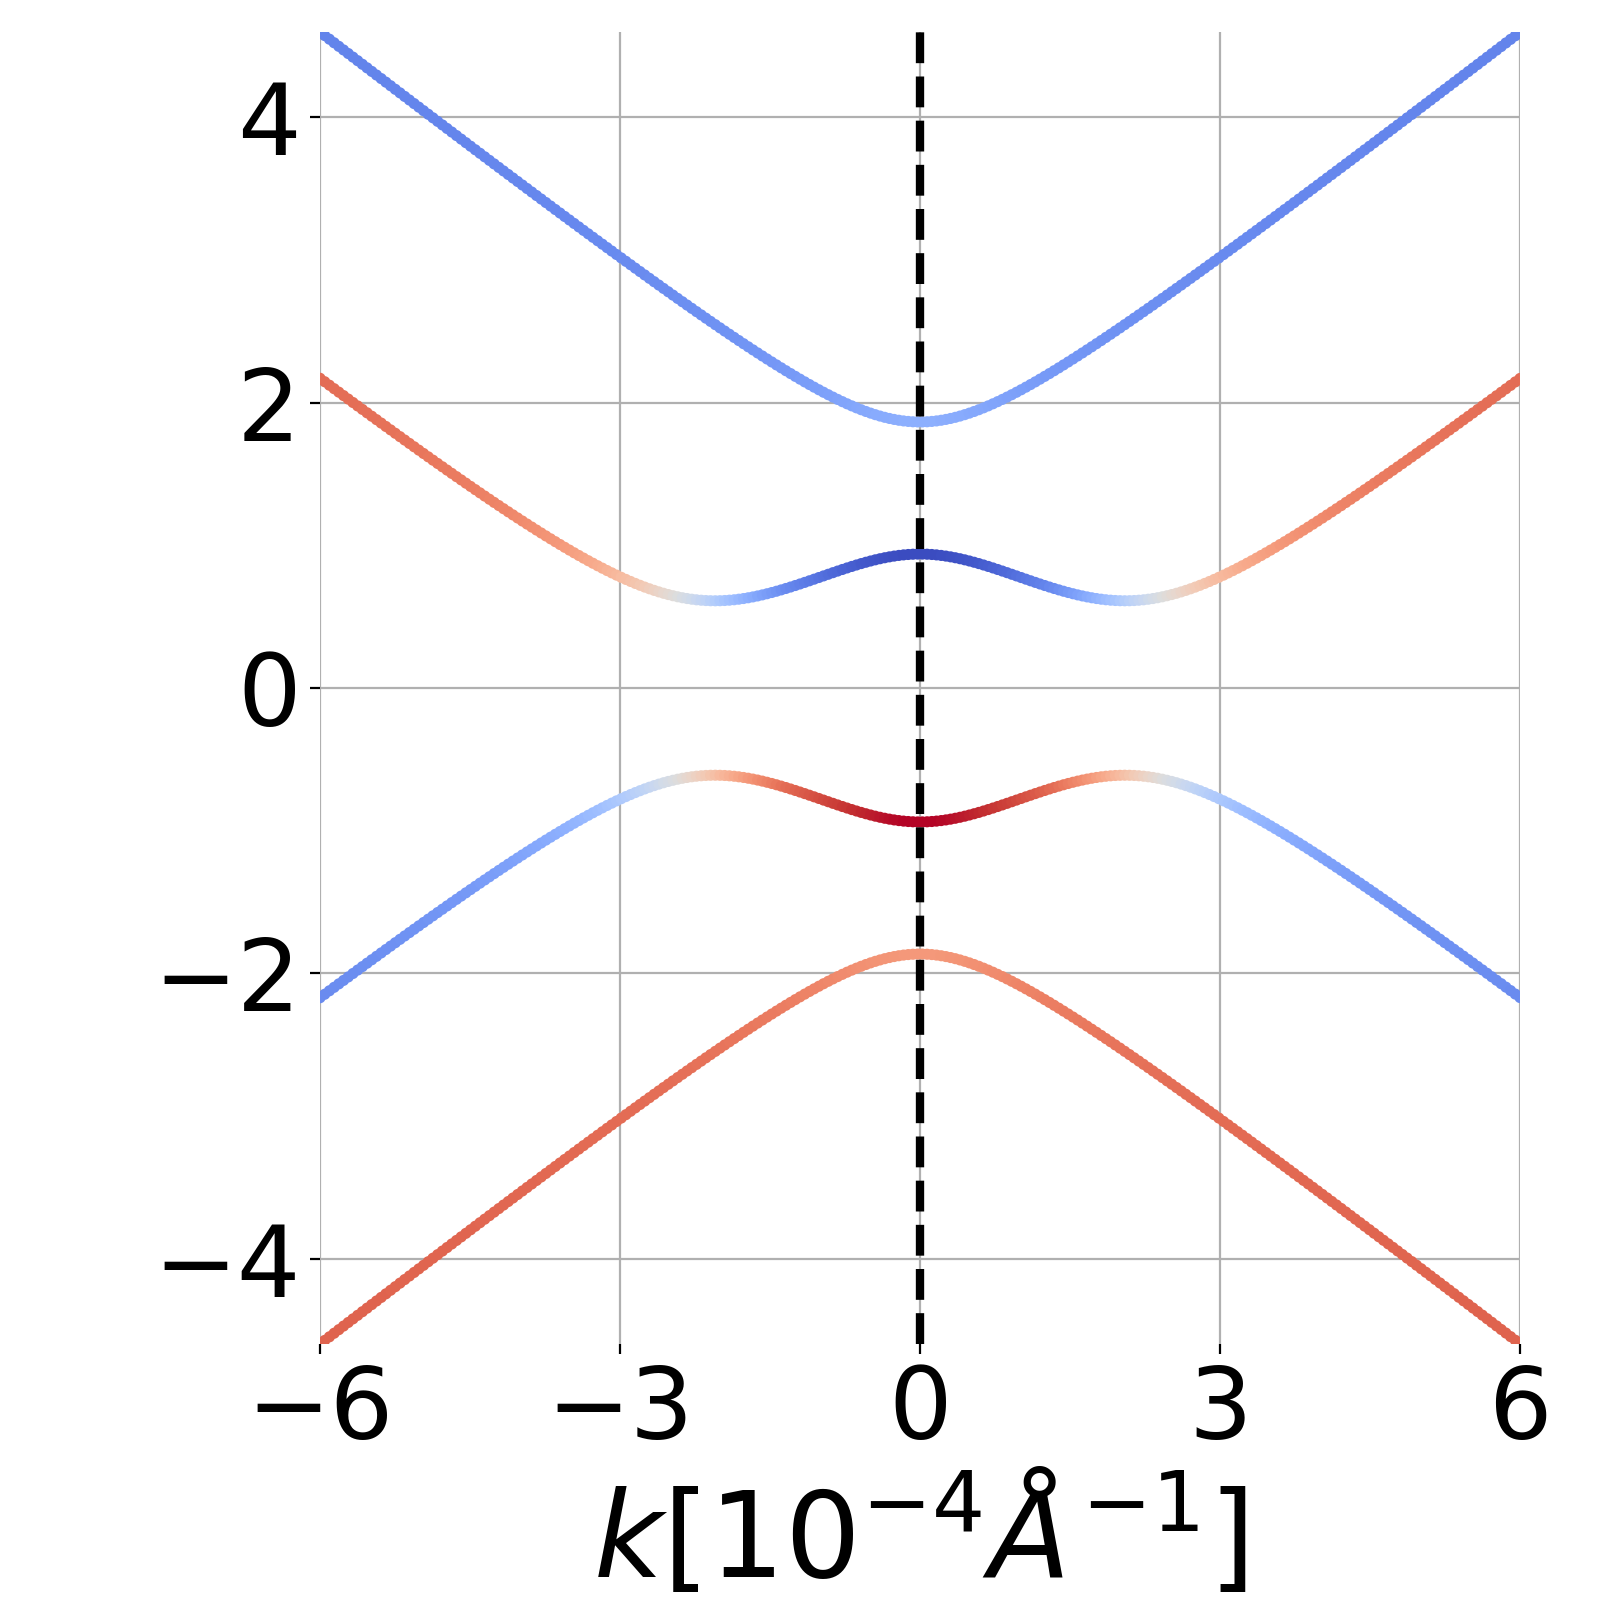

In [147]:
tmp = adjust(
    -d_cs / np.log(0.2), -d_moc / np.log(0.2), d_cs, d_moc, 'WSe2-0.2-0.2-1.94-2.2',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]),
    pSign=1. * np.array([-1, 1, 1, -1, 1, 1]),
    angle = 15, cutoffRadius=3., plotRadius=0.0006, onsiteEnergy=.6, mode='load', 
    axConfig=[0.20, 0.16, 0.75, 0.82], fontsize=36, plot='2d', filename='WSe2-15.pdf')

a_t: 3.32
a_g: 2.46
d: 3.42
w:  3.3499999999999996
V_pppi0:  -1.6071729195451168
V_ppsigma0:  5.66337124030184
V_pdpi0:  1.1947467635223203
V_pdsigma0:  -2.069362096599138
d_CX:  1.94
d_CM:  2.2
r_0:  1.2053897730456469
r_0m:  1.3669368560311461
6.963892592860031e-18
258


<IPython.core.display.Javascript object>


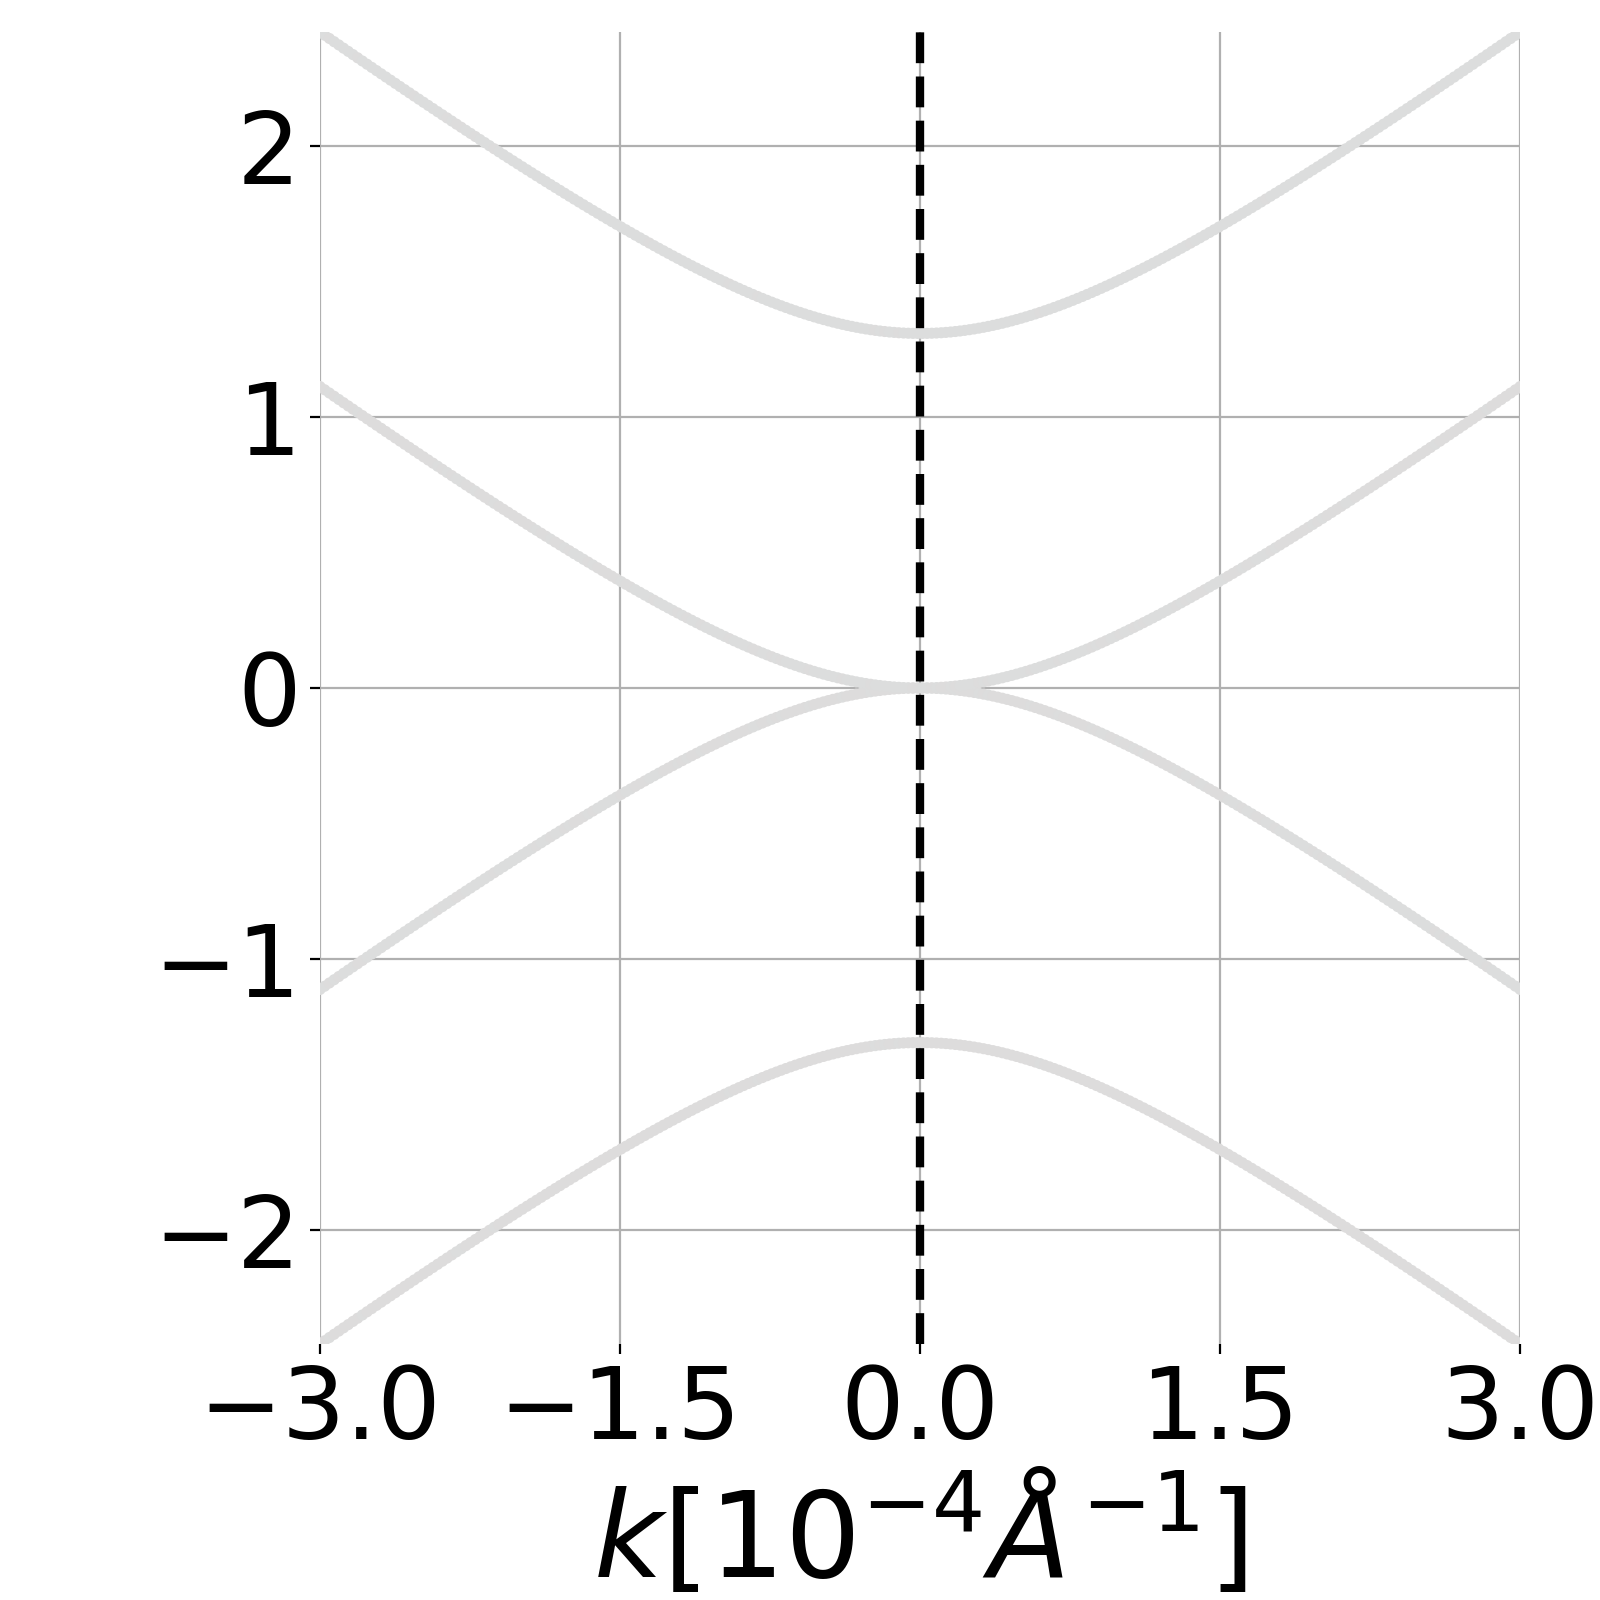

In [148]:
tmp = adjust(
    -d_cs / np.log(0.2), -d_moc / np.log(0.2), d_cs, d_moc, 'WSe2-0.2-0.2-1.94-2.2',  
    amplifyer=1., dSign=1. * np.array([-1, -1, 1, 1, 1]),
    pSign=1. * np.array([-1, 1, 1, -1, 1, 1]),
    angle = 30, cutoffRadius=3., plotRadius=0.0003, onsiteEnergy=.6, mode='load', 
    axConfig=[0.20, 0.16, 0.75, 0.82], fontsize=36, plot='2d', filename='WSe2-30.pdf')

In [ ]:
board = [[".",".","9","7","4","8",".",".","."],["7",".",".",".",".",".",".",".","."],[".","2",".","1",".","9",".",".","."],[".",".","7",".",".",".","2","4","."],[".","6","4",".","1",".","5","9","."],[".","9","8",".",".",".","3",".","."],[".",".",".","8",".","3",".","2","."],[".",".",".",".",".",".",".",".","6"],[".",".",".","2","7","5","9",".","."]]

class sudoku:
    def __init__(self, board = None, parent = None):
        if parent:
            self.rowOccur = copy.deepcopy(parent.rowOccur)
            self.colOccur = copy.deepcopy(parent.colOccur)
            self.boxOccur = copy.deepcopy(parent.boxOccur)
            self.unfilled = copy.deepcopy(parent.unfilled)
            self.filled = copy.deepcopy(parent.filled)
            self.parent = parent
        else:
            self.rowOccur = dict(enumerate([set() for i in range(9)]))
            self.colOccur = dict(enumerate([set() for i in range(9)]))
            self.boxOccur = dict(enumerate([set() for i in range(9)]))
            self.unfilled = deque([])
            self.filled = []
            self.parent = None
        self.children = []

        if board:
            for row in range(9):
                for col in range(9):
                    digit = board[row][col]
                    if digit == '.':
                        self.unfilled.append((row, col))
                    else:
                        self.addDigit(row, col, digit)

    def addDigit(self, row, col, digit):
        self.rowOccur[row].add(digit)
        self.colOccur[col].add(digit)
        self.boxOccur[row // 3 * 3 + col // 3].add(digit)
        self.filled.append((row, col, digit))

    def possibleDigit(self, row, col):
        res = set(['1', '2', '3', '4', '5', '6', '7', '8', '9'])
        return res - self.rowOccur[row] - self.colOccur[col] - self.boxOccur[row // 3 * 3 + col // 3]

    def branch(self, row, col, digitList):
        for digit in digitList:
            possibility = sudoku(parent=self)
            possibility.addDigit(row, col, digit)
            self.children.append(possibility)
    
    def solve(self, board):
        isOnePossibility = True
        while isOnePossibility:
            isOnePossibility = False
            guessNum = 9
            guessPos = None
            guessRange = None
            remains = len(self.unfilled)
            for i in range(remains):
                row, col = self.unfilled[0]
                digitList = self.possibleDigit(row, col)
                l = len(digitList)
                if l == 1:
                    isOnePossibility = True
                    for i in digitList:
                        digit = i
                        break
                    board[row][col] = digit
                    self.addDigit(row, col, digit)
                    self.unfilled.popleft()
                elif l == 0:
                    return False
                elif l < guessNum:
                    guessNum = l
                    guessPos = (row, col)
                    guessRange = digitList
                    self.unfilled.rotate(-1)
                else:
                    self.unfilled.rotate(-1)
            
            print(isOnePossibility, guessNum)
            
            if remains == 0:
                for row, col, val in self.filled:
                    board[row][col] = val
                return True
        
        self.branch(guessPos[0], guessPos[1], guessRange)
        for child in self.children:
            if child.solve(board):
                return True
            
s = sudoku(board=board)
s.solve(board)

In [ ]:
s.children